# ÏöîÏïΩ

In [2]:
# Colab ÌôòÍ≤ΩÏö© ÌïúÍµ≠Ïñ¥ ÌÖçÏä§Ìä∏ ÏöîÏïΩ Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏä§ÌÖú
# KoBART vs ko-t5 ÏÑ±Îä• ÎπÑÍµê Î∞è Ï¢ÖÌï© ÌèâÍ∞Ä

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò (ColabÏóêÏÑú Ïã§Ìñâ)
import subprocess
import sys

def install_requirements():
    """ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò"""
    packages = [
        'transformers',
        #'datasets',
        'rouge-score',
        'bert-score',
        'sentence-transformers',
        'scipy',
        'plotly'
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"‚úì {package} ÏÑ§Ïπò ÏôÑÎ£å")
        except:
            print(f"‚úó {package} ÏÑ§Ïπò Ïã§Ìå®")

# ÏÑ§Ïπò Ïã§Ìñâ
print("ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ï§ë...")
install_requirements()

ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ï§ë...
‚úì transformers ÏÑ§Ïπò ÏôÑÎ£å
‚úì rouge-score ÏÑ§Ïπò ÏôÑÎ£å
‚úì bert-score ÏÑ§Ïπò ÏôÑÎ£å
‚úì sentence-transformers ÏÑ§Ïπò ÏôÑÎ£å
‚úì scipy ÏÑ§Ïπò ÏôÑÎ£å
‚úì plotly ÏÑ§Ïπò ÏôÑÎ£å


In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from transformers import (
    AutoTokenizer, AutoModelForSeq2SeqLM,
    PreTrainedTokenizerFast, BartForConditionalGeneration
)
from datasets import load_dataset
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from sentence_transformers import SentenceTransformer
from scipy import stats
from tqdm import tqdm
import re
import random
from collections import Counter

class TextSummarizationEvaluator:
    """ÌÖçÏä§Ìä∏ ÏöîÏïΩ Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÌÅ¥ÎûòÏä§"""

    def __init__(self, num_samples=100, random_seed=42):
        self.num_samples = num_samples
        self.random_seed = random_seed
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        # Í≤∞Í≥º Ï†ÄÏû•Ïö©
        self.results = {}
        self.predictions = {}
        self.references = []

        # ÌèâÍ∞Ä ÏßÄÌëú Ï¥àÍ∏∞Ìôî
        self.rouge_scorer = rouge_scorer.RougeScorer(
            ['rouge1', 'rouge2', 'rougeL'], use_stemmer=False
        )

        print(f"üöÄ ÌèâÍ∞Ä ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî ÏôÑÎ£å (Device: {self.device})")

    def load_models(self):
        """KoBARTÏôÄ ko-t5 Î™®Îç∏ Î°úÎìú"""
        print("\nüì• Î™®Îç∏ Î°úÎî© Ï§ë...")

        # KoBART Î™®Îç∏ Î°úÎìú
        print("  - KoBART Î°úÎî©...")
        self.kobart_tokenizer = PreTrainedTokenizerFast.from_pretrained(
            'digit82/kobart-summarization'
        )
        self.kobart_model = BartForConditionalGeneration.from_pretrained(
            'digit82/kobart-summarization'
        ).to(self.device)

        # ko-t5 Î™®Îç∏ Î°úÎìú
        print("  - ko-t5 Î°úÎî©...")
        self.kot5_tokenizer = AutoTokenizer.from_pretrained(
            'lcw99/t5-base-korean-text-summary'
        )
        self.kot5_model = AutoModelForSeq2SeqLM.from_pretrained(
            'lcw99/t5-base-korean-text-summary'
        ).to(self.device)

        # Sentence-BERT Î™®Îç∏ Î°úÎìú (ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÏÑ±Ïö©)
        print("  - Sentence-BERT Î°úÎî©...")
        self.sbert_model = SentenceTransformer('klue/bert-base')

        print("‚úÖ Î™®Îì† Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!")

    def 
    
    
    (self):
        """Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Î∞è ÏÉòÌîåÎßÅ"""
        print(f"\nüìä Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...")

        dataset = load_dataset("Laplace04/KoreanSummarizeAiHub")
        test_data = dataset['test']

        # ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
        random.seed(self.random_seed)
        np.random.seed(self.random_seed)

        # ÏÉòÌîåÎßÅ
        if len(test_data) > self.num_samples:
            indices = random.sample(range(len(test_data)), self.num_samples)
            self.test_samples = [test_data[i] for i in indices]
        else:
            self.test_samples = list(test_data)

        print(f"‚úÖ {len(self.test_samples)}Í∞ú ÏÉòÌîå Ï§ÄÎπÑ ÏôÑÎ£å")

    def generate_summary(self, text, model, tokenizer, model_name):
        """Îã®Ïùº ÌÖçÏä§Ìä∏ ÏöîÏïΩ ÏÉùÏÑ±"""
        try:
            # Í≥µÌÜµ ÌååÎùºÎØ∏ÌÑ∞
            max_input_length = 1024
            max_output_length = 150
            min_output_length = 80

            # ÏûÖÎ†• ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï
            if model_name == "ko-t5":
                # T5Îäî prefixÍ∞Ä ÌïÑÏöîÌï† Ïàò ÏûàÏùå
                input_text = f"summarize: {text}"
            else:
                input_text = text

            input_ids = tokenizer.encode(
                input_text,
                return_tensors="pt",
                truncation=True,
                max_length=max_input_length
            ).to(self.device)

            # ÏÉùÏÑ± ÌååÎùºÎØ∏ÌÑ∞ (Î™®Îç∏Î≥Ñ Ï°∞Ï†ï)
            generation_kwargs = {
                'num_beams': 6,
                'max_length': max_output_length,
                'min_length': min_output_length,
                'length_penalty': 0.8,
                'early_stopping': True,
                'no_repeat_ngram_size': 4
            }

            # KoBARTÎßå repetition_penalty ÏßÄÏõê
            if model_name == "kobart":
                generation_kwargs['repetition_penalty'] = 3.0

            # ÏöîÏïΩ ÏÉùÏÑ±
            with torch.no_grad():
                summary_ids = model.generate(input_ids, **generation_kwargs)

            # ÎîîÏΩîÎî©
            summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

            # T5Ïùò Í≤ΩÏö∞ ÏûÖÎ†• prefix Ï†úÍ±∞
            if model_name == "ko-t5" and summary.startswith("summarize:"):
                summary = summary.replace("summarize:", "").strip()

            return summary

        except Exception as e:
            print(f"‚ö†Ô∏è ÏöîÏïΩ ÏÉùÏÑ± Ïò§Î•ò ({model_name}): {e}")
            return ""

    def evaluate_models(self):
        """Îëê Î™®Îç∏Î°ú ÏöîÏïΩ ÏÉùÏÑ± Î∞è ÌèâÍ∞Ä"""
        print(f"\nüîÑ Î™®Îç∏ ÌèâÍ∞Ä ÏãúÏûë ({self.num_samples}Í∞ú ÏÉòÌîå)...")

        kobart_predictions = []
        kot5_predictions = []
        references = []

        # Î∞∞Ïπò Ï≤òÎ¶¨Î•º ÏúÑÌïú ÏßÑÌñâÎ∞î
        for i, sample in enumerate(tqdm(self.test_samples, desc="ÏöîÏïΩ ÏÉùÏÑ±")):
            try:
                passage = sample['passage']
                reference = sample['summary']

                # KoBART ÏöîÏïΩ
                kobart_pred = self.generate_summary(
                    passage, self.kobart_model, self.kobart_tokenizer, "kobart"
                )

                # ko-t5 ÏöîÏïΩ
                kot5_pred = self.generate_summary(
                    passage, self.kot5_model, self.kot5_tokenizer, "ko-t5"
                )

                kobart_predictions.append(kobart_pred)
                kot5_predictions.append(kot5_pred)
                references.append(reference)

                # Î©îÎ™®Î¶¨ Ï†ïÎ¶¨ (Colab ÌôòÍ≤Ω Í≥†Î†§)
                if i % 20 == 0:
                    torch.cuda.empty_cache()

            except Exception as e:
                print(f"‚ö†Ô∏è ÏÉòÌîå {i} Ï≤òÎ¶¨ Ïò§Î•ò: {e}")
                continue

        # Í≤∞Í≥º Ï†ÄÏû•
        self.predictions['kobart'] = kobart_predictions
        self.predictions['kot5'] = kot5_predictions
        self.references = references

        print(f"‚úÖ ÏöîÏïΩ ÏÉùÏÑ± ÏôÑÎ£å! (KoBART: {len(kobart_predictions)}, ko-t5: {len(kot5_predictions)})")

    def calculate_rouge_scores(self, predictions, references):
        """ROUGE Ï†êÏàò Í≥ÑÏÇ∞"""
        rouge1_scores = []
        rouge2_scores = []
        rougeL_scores = []

        for pred, ref in zip(predictions, references):
            pred_clean = re.sub(r'\s+', ' ', pred.strip())
            ref_clean = re.sub(r'\s+', ' ', ref.strip())

            scores = self.rouge_scorer.score(ref_clean, pred_clean)
            rouge1_scores.append(scores['rouge1'].fmeasure)
            rouge2_scores.append(scores['rouge2'].fmeasure)
            rougeL_scores.append(scores['rougeL'].fmeasure)

        return {
            'rouge1': rouge1_scores,
            'rouge2': rouge2_scores,
            'rougeL': rougeL_scores
        }

    def calculate_bleu_scores(self, predictions, references):
        """BLEU Ï†êÏàò Í≥ÑÏÇ∞"""
        from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

        # NLTK Îã§Ïö¥Î°úÎìú
        try:
            import nltk
            nltk.download('punkt', quiet=True)
        except:
            pass

        bleu_scores = []
        smoothie = SmoothingFunction().method4

        for pred, ref in zip(predictions, references):
            # ÌïúÍµ≠Ïñ¥Îäî Í≥µÎ∞± Í∏∞Ï§ÄÏúºÎ°ú ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï
            pred_tokens = pred.split()
            ref_tokens = [ref.split()]  # BLEUÎäî referenceÍ∞Ä Î¶¨Ïä§Ìä∏Ïùò Î¶¨Ïä§Ìä∏

            try:
                bleu = sentence_bleu(ref_tokens, pred_tokens, smoothing_function=smoothie)
                bleu_scores.append(bleu)
            except:
                bleu_scores.append(0.0)

        return bleu_scores

    def calculate_bert_scores(self, predictions, references):
        """BERTScore Í≥ÑÏÇ∞"""
        try:
            P, R, F1 = bert_score(predictions, references, lang='ko', verbose=False)
            return F1.numpy().tolist()
        except Exception as e:
            print(f"‚ö†Ô∏è BERTScore Í≥ÑÏÇ∞ Ïò§Î•ò: {e}")
            return [0.0] * len(predictions)

    def calculate_semantic_similarity(self, predictions, references):
        """ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÏÑ± Í≥ÑÏÇ∞ (ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ)"""
        try:
            pred_embeddings = self.sbert_model.encode(predictions)
            ref_embeddings = self.sbert_model.encode(references)

            # ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
            similarities = []
            for pred_emb, ref_emb in zip(pred_embeddings, ref_embeddings):
                similarity = np.dot(pred_emb, ref_emb) / (
                    np.linalg.norm(pred_emb) * np.linalg.norm(ref_emb)
                )
                similarities.append(similarity)

            return similarities
        except Exception as e:
            print(f"‚ö†Ô∏è ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÏÑ± Í≥ÑÏÇ∞ Ïò§Î•ò: {e}")
            return [0.0] * len(predictions)

    def calculate_novel_ngram_rate(self, predictions, references, n=2):
        """Novel N-gram Rate Í≥ÑÏÇ∞"""
        novel_rates = []

        for pred, ref in zip(predictions, references):
            pred_tokens = pred.split()
            ref_tokens = ref.split()

            if len(pred_tokens) < n:
                novel_rates.append(0.0)
                continue

            # n-gram ÏÉùÏÑ±
            pred_ngrams = set()
            ref_ngrams = set()

            for i in range(len(pred_tokens) - n + 1):
                pred_ngrams.add(tuple(pred_tokens[i:i+n]))

            for i in range(len(ref_tokens) - n + 1):
                ref_ngrams.add(tuple(ref_tokens[i:i+n]))

            # Novel n-gram Í≥ÑÏÇ∞
            if len(pred_ngrams) == 0:
                novel_rate = 0.0
            else:
                novel_ngrams = pred_ngrams - ref_ngrams
                novel_rate = len(novel_ngrams) / len(pred_ngrams)

            novel_rates.append(novel_rate)

        return novel_rates

    def calculate_all_metrics(self):
        """Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞"""
        print("\nüìä ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ Ï§ë...")

        models = ['kobart', 'kot5']
        self.results = {}

        for model_name in models:
            print(f"  - {model_name.upper()} ÌèâÍ∞Ä Ï§ë...")
            predictions = self.predictions[model_name]

            # ROUGE Ï†êÏàò
            rouge_scores = self.calculate_rouge_scores(predictions, self.references)

            # BLEU Ï†êÏàò
            bleu_scores = self.calculate_bleu_scores(predictions, self.references)

            # BERTScore
            bert_scores = self.calculate_bert_scores(predictions, self.references)

            # ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÏÑ±
            semantic_scores = self.calculate_semantic_similarity(predictions, self.references)

            # Novel N-gram Rate (2-gram)
            novel_scores = self.calculate_novel_ngram_rate(predictions, self.references, n=2)

            # Í≤∞Í≥º Ï†ÄÏû•
            self.results[model_name] = {
                'rouge1': rouge_scores['rouge1'],
                'rouge2': rouge_scores['rouge2'],
                'rougeL': rouge_scores['rougeL'],
                'bleu': bleu_scores,
                'bertscore': bert_scores,
                'semantic_similarity': semantic_scores,
                'novel_ngram_rate': novel_scores
            }

        print("‚úÖ Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å!")

    def statistical_analysis(self):
        """ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï"""
        print("\nüìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï Ï§ë...")

        metrics = ['rouge1', 'rouge2', 'rougeL', 'bleu', 'bertscore',
                  'semantic_similarity', 'novel_ngram_rate']

        self.stat_results = {}

        for metric in metrics:
            kobart_scores = self.results['kobart'][metric]
            kot5_scores = self.results['kot5'][metric]

            # Paired t-test
            t_stat, t_pvalue = stats.ttest_rel(kobart_scores, kot5_scores)

            # Wilcoxon signed-rank test
            w_stat, w_pvalue = stats.wilcoxon(kobart_scores, kot5_scores)

            # Ìö®Í≥º ÌÅ¨Í∏∞ (Cohen's d)
            pooled_std = np.sqrt((np.var(kobart_scores) + np.var(kot5_scores)) / 2)
            cohens_d = (np.mean(kobart_scores) - np.mean(kot5_scores)) / pooled_std

            self.stat_results[metric] = {
                't_statistic': t_stat,
                't_pvalue': t_pvalue,
                'wilcoxon_statistic': w_stat,
                'wilcoxon_pvalue': w_pvalue,
                'cohens_d': cohens_d,
                'kobart_mean': np.mean(kobart_scores),
                'kot5_mean': np.mean(kot5_scores),
                'kobart_std': np.std(kobart_scores),
                'kot5_std': np.std(kot5_scores)
            }

        print("‚úÖ ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù ÏôÑÎ£å!")

    def create_visualizations(self):
        """Í≤∞Í≥º ÏãúÍ∞ÅÌôî"""
        print("\nüé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")

        # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

        # 1. Î∞ïÏä§ÌîåÎ°Ø - Î∂ÑÌè¨ ÎπÑÍµê
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle('Model Performance Distribution Comparison', fontsize=16, fontweight='bold')

        metrics = ['rouge1', 'rouge2', 'rougeL', 'bleu', 'bertscore',
                  'semantic_similarity', 'novel_ngram_rate']

        for i, metric in enumerate(metrics):
            row = i // 4
            col = i % 4

            if i < len(metrics):
                data_to_plot = [
                    self.results['kobart'][metric],
                    self.results['kot5'][metric]
                ]

                axes[row, col].boxplot(data_to_plot, labels=['KoBART', 'ko-t5'])
                axes[row, col].set_title(f'{metric.upper()}')
                axes[row, col].grid(True, alpha=0.3)
            else:
                axes[row, col].axis('off')

        plt.tight_layout()
        plt.savefig('model_comparison_boxplot.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 2. Î∞î Ï∞®Ìä∏ - ÌèâÍ∑† ÏÑ±Îä• ÎπÑÍµê
        fig, ax = plt.subplots(figsize=(15, 8))

        x = np.arange(len(metrics))
        width = 0.35

        kobart_means = [self.stat_results[m]['kobart_mean'] for m in metrics]
        kot5_means = [self.stat_results[m]['kot5_mean'] for m in metrics]
        kobart_stds = [self.stat_results[m]['kobart_std'] for m in metrics]
        kot5_stds = [self.stat_results[m]['kot5_std'] for m in metrics]

        bars1 = ax.bar(x - width/2, kobart_means, width, yerr=kobart_stds,
                      label='KoBART', alpha=0.8, capsize=5)
        bars2 = ax.bar(x + width/2, kot5_means, width, yerr=kot5_stds,
                      label='ko-t5', alpha=0.8, capsize=5)

        ax.set_xlabel('Metrics')
        ax.set_ylabel('Scores')
        ax.set_title('Average Performance Comparison with Standard Deviation')
        ax.set_xticks(x)
        ax.set_xticklabels([m.upper() for m in metrics], rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('model_comparison_barplot.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 3. ÌûàÌä∏Îßµ - Ï¢ÖÌï© ÎπÑÍµê
        heatmap_data = []
        for model in ['kobart', 'kot5']:
            row = []
            for metric in metrics:
                row.append(self.stat_results[metric][f'{model}_mean'])
            heatmap_data.append(row)

        fig, ax = plt.subplots(figsize=(12, 6))
        sns.heatmap(heatmap_data,
                   xticklabels=[m.upper() for m in metrics],
                   yticklabels=['KoBART', 'ko-t5'],
                   annot=True, fmt='.4f', cmap='YlOrRd',
                   ax=ax)
        ax.set_title('Performance Heatmap')
        plt.tight_layout()
        plt.savefig('model_comparison_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 4. Î†àÏù¥Îçî Ï∞®Ìä∏ - Î™®Îç∏Î≥Ñ Í∞ïÏ†ê/ÏïΩÏ†ê
        try:
            import plotly.graph_objects as go
            from plotly.subplots import make_subplots

            # Ï†ïÍ∑úÌôîÎêú Ï†êÏàò (0-1 Î≤îÏúÑ)
            normalized_kobart = []
            normalized_kot5 = []

            for metric in metrics:
                kobart_score = self.stat_results[metric]['kobart_mean']
                kot5_score = self.stat_results[metric]['kot5_mean']
                max_score = max(kobart_score, kot5_score)

                if max_score > 0:
                    normalized_kobart.append(kobart_score / max_score)
                    normalized_kot5.append(kot5_score / max_score)
                else:
                    normalized_kobart.append(0)
                    normalized_kot5.append(0)

            fig = go.Figure()

            fig.add_trace(go.Scatterpolar(
                r=normalized_kobart + [normalized_kobart[0]],
                theta=[m.upper() for m in metrics] + [metrics[0].upper()],
                fill='toself',
                name='KoBART',
                line_color='blue'
            ))

            fig.add_trace(go.Scatterpolar(
                r=normalized_kot5 + [normalized_kot5[0]],
                theta=[m.upper() for m in metrics] + [metrics[0].upper()],
                fill='toself',
                name='ko-t5',
                line_color='red'
            ))

            fig.update_layout(
                polar=dict(
                    radialaxis=dict(
                        visible=True,
                        range=[0, 1]
                    )),
                showlegend=True,
                title="Model Performance Radar Chart (Normalized)"
            )

            fig.write_html('model_comparison_radar.html')
            fig.show()

        except Exception as e:
            print(f"‚ö†Ô∏è Î†àÏù¥Îçî Ï∞®Ìä∏ ÏÉùÏÑ± Ïò§Î•ò: {e}")

        print("‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!")

    def save_results(self):
        """Í≤∞Í≥º Ï†ÄÏû• (NumPy ÌÉÄÏûÖ Î≥ÄÌôò Ìè¨Ìï®)"""
        print("\nüíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...")

        def convert_numpy_types(obj):
            """NumPy ÌÉÄÏûÖÏùÑ Python Í∏∞Î≥∏ ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò"""
            if isinstance(obj, np.floating):
                return float(obj)
            elif isinstance(obj, np.integer):
                return int(obj)
            elif isinstance(obj, np.ndarray):
                return obj.tolist()
            elif isinstance(obj, dict):
                return {key: convert_numpy_types(value) for key, value in obj.items()}
            elif isinstance(obj, list):
                return [convert_numpy_types(item) for item in obj]
            else:
                return obj

        # CSV ÌòïÌÉúÎ°ú ÏÉÅÏÑ∏ Í≤∞Í≥º Ï†ÄÏû•
        detailed_results = []
        for i in range(len(self.references)):
            row = {
                'sample_id': i,
                'reference': self.references[i],
                'kobart_prediction': self.predictions['kobart'][i],
                'kot5_prediction': self.predictions['kot5'][i]
            }

            # Í∞Å ÏßÄÌëúÎ≥Ñ Ï†êÏàò Ï∂îÍ∞Ä (NumPy ÌÉÄÏûÖ Î≥ÄÌôò)
            for metric in ['rouge1', 'rouge2', 'rougeL', 'bleu', 'bertscore',
                          'semantic_similarity', 'novel_ngram_rate']:
                row[f'kobart_{metric}'] = float(self.results['kobart'][metric][i])
                row[f'kot5_{metric}'] = float(self.results['kot5'][metric][i])

            detailed_results.append(row)

        df = pd.DataFrame(detailed_results)
        df.to_csv('detailed_evaluation_results.csv', index=False, encoding='utf-8-sig')

        # ÌÜµÍ≥Ñ ÏöîÏïΩ Ï†ÄÏû• (NumPy ÌÉÄÏûÖ Î≥ÄÌôò Ï†ÅÏö©)
        summary_data = {
            'evaluation_info': {
                'num_samples': self.num_samples,
                'random_seed': self.random_seed,
                'evaluation_date': datetime.now().isoformat(),
                'device': self.device
            },
            'statistical_results': convert_numpy_types(self.stat_results),
            'model_predictions_sample': {
                'kobart': self.predictions['kobart'][:3],
                'kot5': self.predictions['kot5'][:3],
                'references': self.references[:3]
            }
        }

        # JSON Ï†ÄÏû• (Ïù¥Ï†ú Ïò§Î•ò ÏóÜÏù¥ Ï†ÄÏû•Îê®)
        with open('evaluation_summary.json', 'w', encoding='utf-8') as f:
            json.dump(summary_data, f, ensure_ascii=False, indent=2)

        print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!")
        print("  - detailed_evaluation_results.csv: ÏÉÅÏÑ∏ Í≤∞Í≥º")
        print("  - evaluation_summary.json: ÌÜµÍ≥Ñ ÏöîÏïΩ")

    def generate_report(self):
        """ÏûêÎèô Î≥¥Í≥†ÏÑú ÏÉùÏÑ±"""
        print("\nüìã Î≥¥Í≥†ÏÑú ÏÉùÏÑ± Ï§ë...")

        report = []
        report.append("=" * 80)
        report.append("ÌïúÍµ≠Ïñ¥ ÌÖçÏä§Ìä∏ ÏöîÏïΩ Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä Î≥¥Í≥†ÏÑú")
        report.append("KoBART vs ko-t5")
        report.append("=" * 80)
        report.append(f"ÌèâÍ∞Ä ÏùºÏãú: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"ÌèâÍ∞Ä ÏÉòÌîå Ïàò: {self.num_samples}")
        report.append(f"ÏÇ¨Ïö© Ïû•ÎπÑ: {self.device}")
        report.append("")

        # ÏÑ±Îä• ÏöîÏïΩ
        report.append("üìä ÏÑ±Îä• ÏöîÏïΩ")
        report.append("-" * 40)

        metrics = ['rouge1', 'rouge2', 'rougeL', 'bleu', 'bertscore',
                  'semantic_similarity', 'novel_ngram_rate']

        for metric in metrics:
            kobart_mean = self.stat_results[metric]['kobart_mean']
            kot5_mean = self.stat_results[metric]['kot5_mean']
            t_pvalue = self.stat_results[metric]['t_pvalue']

            winner = "KoBART" if kobart_mean > kot5_mean else "ko-t5"
            significance = "***" if t_pvalue < 0.001 else "**" if t_pvalue < 0.01 else "*" if t_pvalue < 0.05 else ""

            report.append(f"{metric.upper():>20}: KoBART {kobart_mean:.4f} vs ko-t5 {kot5_mean:.4f} ‚Üí {winner} {significance}")

        report.append("")

        # ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±
        report.append("üìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï")
        report.append("-" * 40)

        significant_metrics = []
        for metric in metrics:
            t_pvalue = self.stat_results[metric]['t_pvalue']
            if t_pvalue < 0.05:
                significant_metrics.append(metric)

        if significant_metrics:
            report.append(f"Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥Ïù∏ ÏßÄÌëú: {', '.join([m.upper() for m in significant_metrics])}")
        else:
            report.append("ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥Ïù∏ ÏßÄÌëúÍ∞Ä ÏóÜÏäµÎãàÎã§.")

        report.append("")

        # Í≤∞Î°† Î∞è Í∂åÏû•ÏÇ¨Ìï≠
        report.append("üéØ Í≤∞Î°† Î∞è Í∂åÏû•ÏÇ¨Ìï≠")
        report.append("-" * 40)

        # Í∞Å Î™®Îç∏Ïùò Í∞ïÏ†ê Î∂ÑÏÑù
        kobart_wins = sum(1 for m in metrics if self.stat_results[m]['kobart_mean'] > self.stat_results[m]['kot5_mean'])
        kot5_wins = len(metrics) - kobart_wins

        if kobart_wins > kot5_wins:
            report.append("‚Ä¢ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú KoBARTÍ∞Ä Ïö∞ÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ")
        elif kot5_wins > kobart_wins:
            report.append("‚Ä¢ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ko-t5Í∞Ä Ïö∞ÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ")
        else:
            report.append("‚Ä¢ Îëê Î™®Îç∏Ïù¥ ÎπÑÏä∑Ìïú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ")

        # ÌäπÏ†ï ÏßÄÌëúÎ≥Ñ Í∞ïÏ†ê
        kobart_best = max(metrics, key=lambda m: self.stat_results[m]['kobart_mean'] - self.stat_results[m]['kot5_mean'])
        kot5_best = max(metrics, key=lambda m: self.stat_results[m]['kot5_mean'] - self.stat_results[m]['kobart_mean'])

        report.append(f"‚Ä¢ KoBARTÏùò ÏµúÎåÄ Í∞ïÏ†ê: {kobart_best.upper()}")
        report.append(f"‚Ä¢ ko-t5Ïùò ÏµúÎåÄ Í∞ïÏ†ê: {kot5_best.upper()}")

        report.append("")
        report.append("=" * 80)

        # Î≥¥Í≥†ÏÑú Ï†ÄÏû•
        with open('evaluation_report.txt', 'w', encoding='utf-8') as f:
            f.write('\n'.join(report))

        # ÏΩòÏÜî Ï∂úÎ†•
        for line in report:
            print(line)

        print("\n‚úÖ Î≥¥Í≥†ÏÑú ÏÉùÏÑ± ÏôÑÎ£å! (evaluation_report.txt)")

    def run_full_evaluation(self):
        """Ï†ÑÏ≤¥ ÌèâÍ∞Ä ÌîÑÎ°úÏÑ∏Ïä§ Ïã§Ìñâ"""
        print("üöÄ ÌïúÍµ≠Ïñ¥ ÌÖçÏä§Ìä∏ ÏöîÏïΩ Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏûë!")
        print("=" * 60)

        try:
            # 1. Î™®Îç∏ Î°úÎìú
            self.load_models()

            # 2. Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
            self.load_dataset()

            # 3. Î™®Îç∏ ÌèâÍ∞Ä
            self.evaluate_models()

            # 4. ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
            self.calculate_all_metrics()

            # 5. ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù
            self.statistical_analysis()

            # 6. ÏãúÍ∞ÅÌôî
            self.create_visualizations()

            # 7. Í≤∞Í≥º Ï†ÄÏû•
            self.save_results()

            # 8. Î≥¥Í≥†ÏÑú ÏÉùÏÑ±
            self.generate_report()

            print("\nüéâ Î™®Îì† ÌèâÍ∞Ä ÏôÑÎ£å!")
            print("ÏÉùÏÑ±Îêú ÌååÏùºÎì§:")
            print("  - detailed_evaluation_results.csv")
            print("  - evaluation_summary.json")
            print("  - evaluation_report.txt")
            print("  - model_comparison_*.png")
            print("  - model_comparison_radar.html")

        except Exception as e:
            print(f"‚ùå ÌèâÍ∞Ä Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
            import traceback
            traceback.print_exc()



In [5]:
pip install -U datasets huggingface_hub fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


üöÄ ÌèâÍ∞Ä ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî ÏôÑÎ£å (Device: cuda)
üöÄ ÌïúÍµ≠Ïñ¥ ÌÖçÏä§Ìä∏ ÏöîÏïΩ Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏûë!

üì• Î™®Îç∏ Î°úÎî© Ï§ë...
  - KoBART Î°úÎî©...


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels will be overwritten to 2.


  - ko-t5 Î°úÎî©...


  - Sentence-BERT Î°úÎî©...
‚úÖ Î™®Îì† Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!

üìä Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...
‚úÖ 100Í∞ú ÏÉòÌîå Ï§ÄÎπÑ ÏôÑÎ£å

üîÑ Î™®Îç∏ ÌèâÍ∞Ä ÏãúÏûë (100Í∞ú ÏÉòÌîå)...


ÏöîÏïΩ ÏÉùÏÑ±: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [06:07<00:00,  3.68s/it]


‚úÖ ÏöîÏïΩ ÏÉùÏÑ± ÏôÑÎ£å! (KoBART: 100, ko-t5: 100)

üìä ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ Ï§ë...
  - KOBART ÌèâÍ∞Ä Ï§ë...
  - KOT5 ÌèâÍ∞Ä Ï§ë...
‚úÖ Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å!

üìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï Ï§ë...
‚úÖ ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù ÏôÑÎ£å!

üé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...


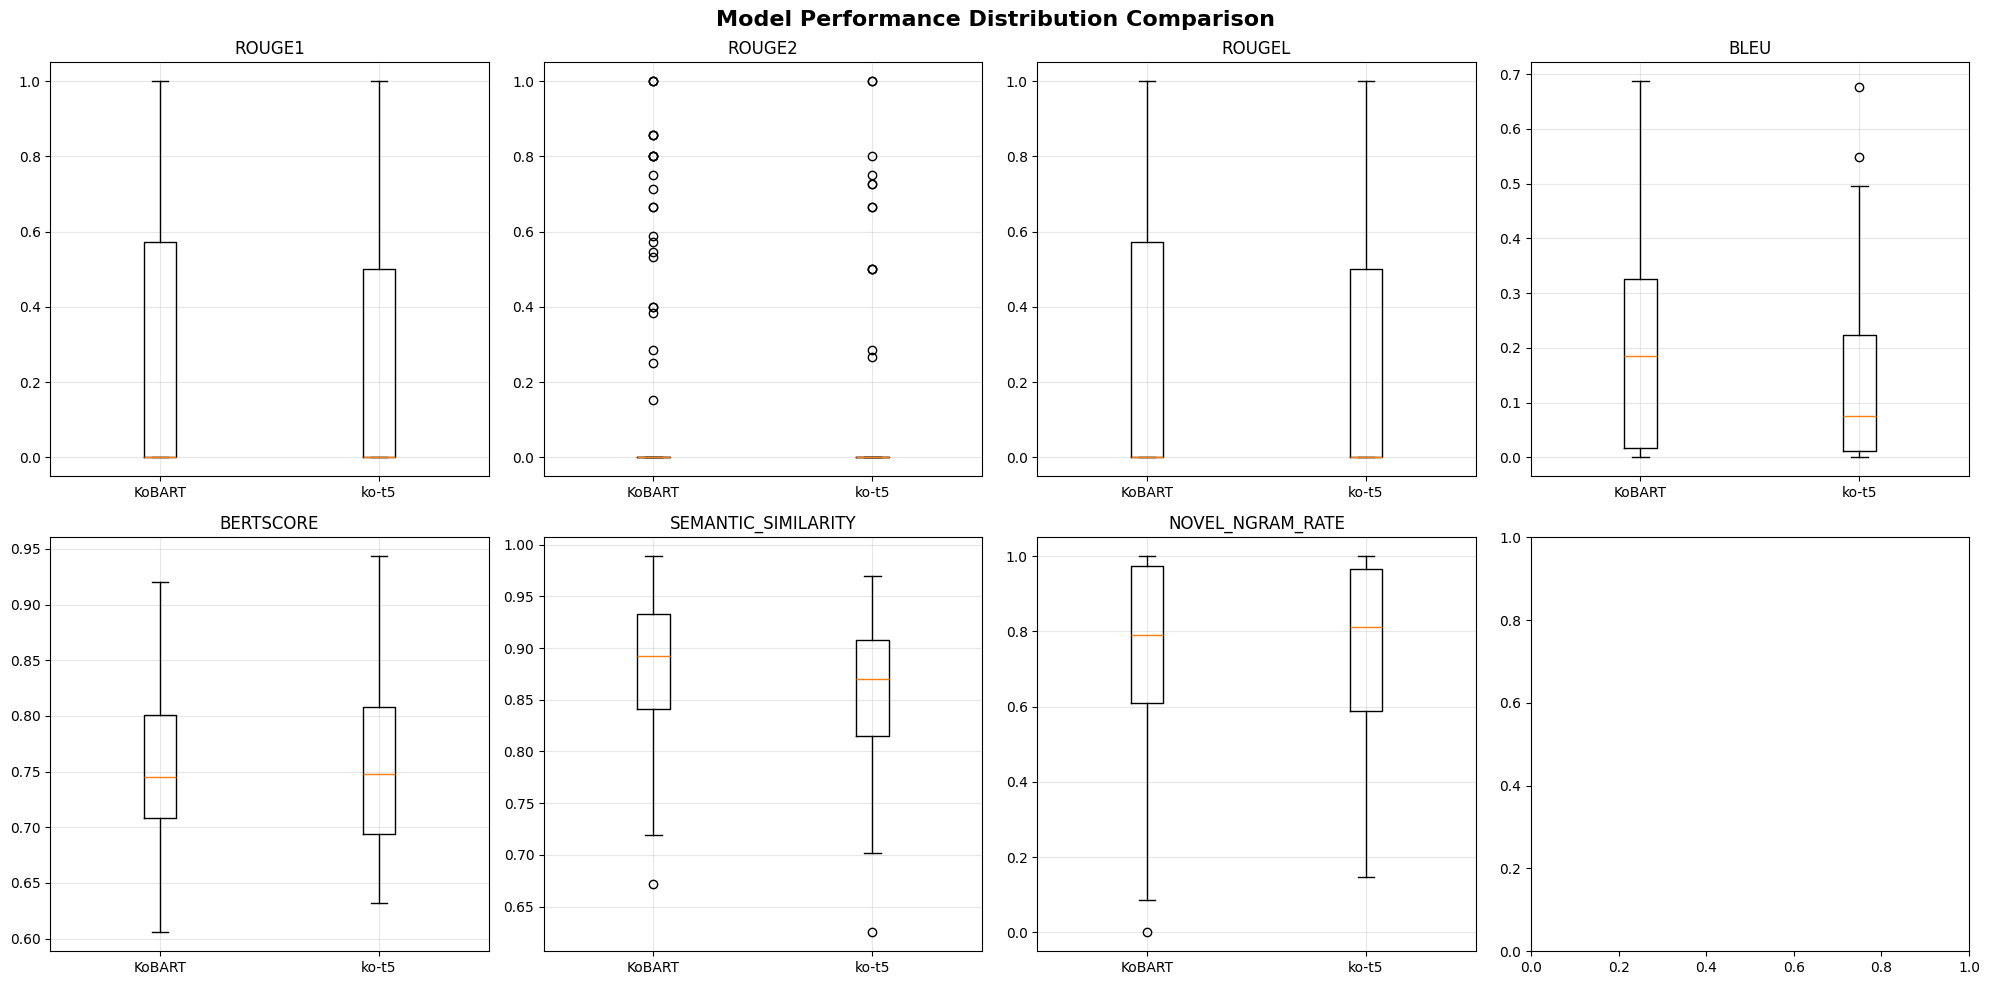

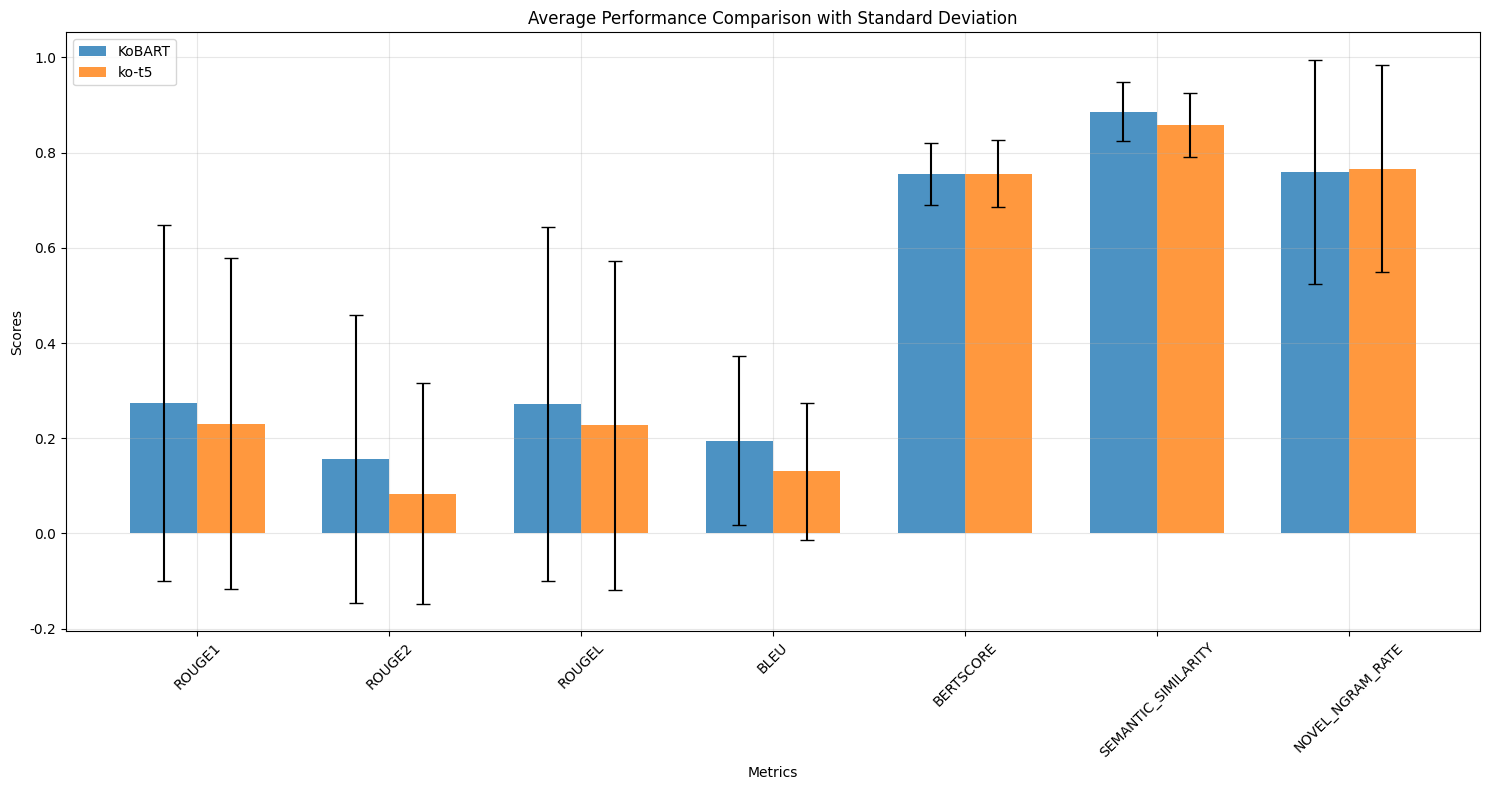

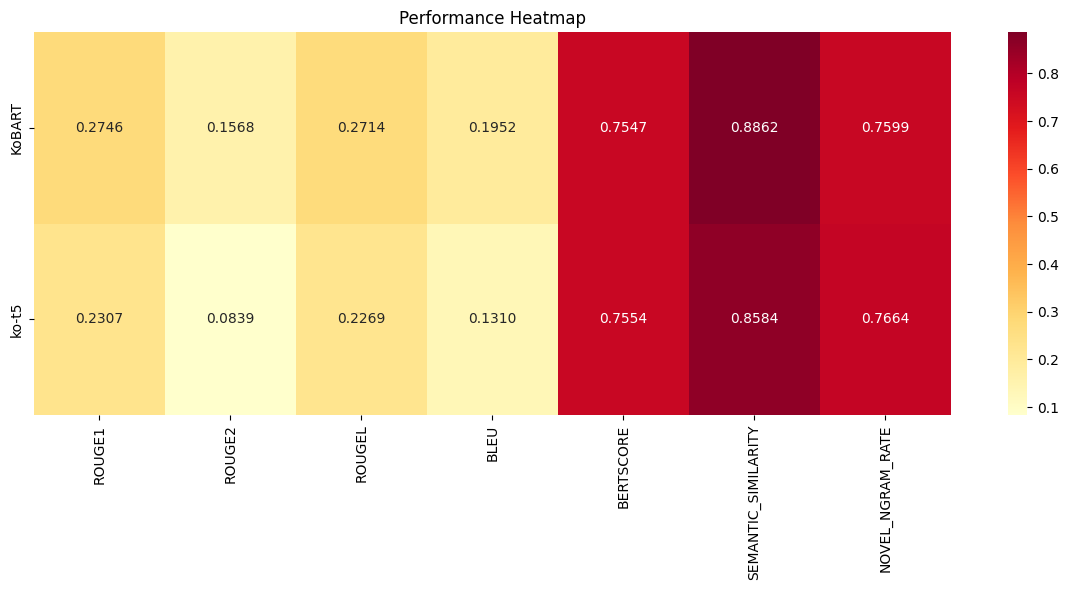

‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!

üíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...
‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!
  - detailed_evaluation_results.csv: ÏÉÅÏÑ∏ Í≤∞Í≥º
  - evaluation_summary.json: ÌÜµÍ≥Ñ ÏöîÏïΩ

üìã Î≥¥Í≥†ÏÑú ÏÉùÏÑ± Ï§ë...
ÌïúÍµ≠Ïñ¥ ÌÖçÏä§Ìä∏ ÏöîÏïΩ Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä Î≥¥Í≥†ÏÑú
KoBART vs ko-t5
ÌèâÍ∞Ä ÏùºÏãú: 2025-05-25 18:41:12
ÌèâÍ∞Ä ÏÉòÌîå Ïàò: 100
ÏÇ¨Ïö© Ïû•ÎπÑ: cuda

üìä ÏÑ±Îä• ÏöîÏïΩ
----------------------------------------
              ROUGE1: KoBART 0.2746 vs ko-t5 0.2307 ‚Üí KoBART 
              ROUGE2: KoBART 0.1568 vs ko-t5 0.0839 ‚Üí KoBART *
              ROUGEL: KoBART 0.2714 vs ko-t5 0.2269 ‚Üí KoBART 
                BLEU: KoBART 0.1952 vs ko-t5 0.1310 ‚Üí KoBART ***
           BERTSCORE: KoBART 0.7547 vs ko-t5 0.7554 ‚Üí ko-t5 
 SEMANTIC_SIMILARITY: KoBART 0.8862 vs ko-t5 0.8584 ‚Üí KoBART ***
    NOVEL_NGRAM_RATE: KoBART 0.7599 vs ko-t5 0.7664 ‚Üí ko-t5 

üìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï
----------------------------------------
Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥Ïù∏ ÏßÄÌëú: ROUGE2, BLEU, SEMANTIC_

In [34]:
evaluator = TextSummarizationEvaluator(num_samples=100, random_seed=42)
evaluator.run_full_evaluation()

# ÌÇ§ÏõåÎìú Ï∂îÏ∂ú

In [6]:
# Í≥µÏ†ïÌïú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏä§ÌÖú
# Zero-shot Ï°∞Í±¥ÏóêÏÑú KeyBERT, TF-IDF, TextRank ÏÑ±Îä• ÎπÑÍµê

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
import random
import re
from collections import Counter
from tqdm import tqdm
import subprocess
import sys

warnings.filterwarnings('ignore')

def install_requirements():
    """ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò (Colab ÌôòÍ≤Ω)"""
    packages = [
        #'datasets',
        'keybert',
        'sentence-transformers',
        'konlpy',
        'networkx',
        'scikit-learn',
        'nltk',
        'scipy'
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"‚úì {package} ÏÑ§Ïπò ÏôÑÎ£å")
        except:
            print(f"‚úó {package} ÏÑ§Ïπò Ïã§Ìå®")

# Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
print("ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ï§ë...")
install_requirements()

ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ï§ë...
‚úì keybert ÏÑ§Ïπò ÏôÑÎ£å
‚úì sentence-transformers ÏÑ§Ïπò ÏôÑÎ£å
‚úì konlpy ÏÑ§Ïπò ÏôÑÎ£å
‚úì networkx ÏÑ§Ïπò ÏôÑÎ£å
‚úì scikit-learn ÏÑ§Ïπò ÏôÑÎ£å
‚úì nltk ÏÑ§Ïπò ÏôÑÎ£å
‚úì scipy ÏÑ§Ïπò ÏôÑÎ£å


In [7]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
import networkx as nx
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from scipy import stats

# NLTK Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
except:
    pass

class FairKeywordExtractorComparison:
    """Í≥µÏ†ïÌïú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÌèâÍ∞Ä ÌÅ¥ÎûòÏä§"""

    def __init__(self, num_samples=100, random_seed=42):
        self.num_samples = num_samples
        self.random_seed = random_seed

        # ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
        random.seed(random_seed)
        np.random.seed(random_seed)

        # Í≤∞Í≥º Ï†ÄÏû•Ïö©
        self.results = {}
        self.predictions = {}
        self.references = []
        self.test_texts = []

        print(f"üöÄ Í≥µÏ†ïÌïú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî (ÏãúÎìú: {random_seed})")

    def load_models(self):
        """Î™®Îì† Î™®Îç∏ Î°úÎìú (Í≥µÏ†ïÌïú Ï°∞Í±¥)"""
        print("\nüì• Î™®Îç∏ Î°úÎî© Ï§ë...")

        # KeyBERT (ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏ Í∑∏ÎåÄÎ°ú)
        print("  - KeyBERT Î°úÎî©...")
        self.keybert = KeyBERT('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

        # ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞Ïö© (KeyBERTÏôÄ ÎèôÏùºÌïú Î™®Îç∏)
        print("  - Sentence-BERT Î°úÎî©...")
        self.semantic_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

        # TF-IDFÎäî ÎÇòÏ§ëÏóê ÏùºÎ∞ò ÏΩîÌçºÏä§Î°ú ÌïôÏäµ
        self.tfidf_vectorizer = None

        # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ (Îã§Íµ≠Ïñ¥ ÎåÄÏùë)
        try:
            self.english_stopwords = set(stopwords.words('english'))
        except:
            self.english_stopwords = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at'])

        print("‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!")

    def _detect_language(self, text):
        """Ïñ∏Ïñ¥ Í∞êÏßÄ"""
        korean_chars = re.findall(r'[Í∞Ä-Ìû£]', text)
        return 'korean' if len(korean_chars) > 10 else 'english'

    def _multilingual_tokenizer(self, text):
        """Îã§Íµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä (Í≥µÏ†ïÌïú Ï†ÑÏ≤òÎ¶¨)"""
        if not text:
            return []

        language = self._detect_language(text)

        if language == 'korean':
            # ÌïúÍµ≠Ïñ¥: Í∞ÑÎã®Ìïú Î™ÖÏÇ¨ Ï∂îÏ∂ú (KoNLPy ÏóÜÏù¥)
            words = re.findall(r'[Í∞Ä-Ìû£]{2,}', text)
            return [w for w in words if len(w) >= 2]
        else:
            # ÏòÅÏñ¥: Í∏∞Î≥∏Ï†ÅÏù∏ Îã®Ïñ¥ Ï∂îÏ∂ú
            words = re.findall(r'\b[a-zA-Z]{2,}\b', text.lower())
            return [w for w in words if w not in self.english_stopwords]

    def _preprocess_text(self, text):
        """ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ (Î™®Îì† Î∞©Î≤ïÏóê Í≥µÌÜµ Ï†ÅÏö©)"""
        if not text:
            return ""
        text = re.sub(r'[^\w\sÍ∞Ä-Ìû£]', ' ', text)  # ÌïúÍµ≠Ïñ¥ Ìè¨Ìï®
        text = re.sub(r'\s+', ' ', text)
        return text.strip()

    def _post_process_keywords(self, keywords, top_k=10):
        """ÌÇ§ÏõåÎìú ÌõÑÏ≤òÎ¶¨ (Î™®Îì† Î∞©Î≤ïÏóê ÎèôÏùº Ï†ÅÏö©)"""
        if not keywords:
            return []

        # 1. Í∏∞Î≥∏ ÌïÑÌÑ∞ÎßÅ
        filtered = []
        for kw in keywords:
            if isinstance(kw, tuple):
                kw = kw[0]  # KeyBERT Í≤∞Í≥º Ï≤òÎ¶¨
            if 2 <= len(str(kw)) <= 15 and not str(kw).isdigit():
                filtered.append(str(kw))

        # 2. Ï§ëÎ≥µ Ï†úÍ±∞ (ÎåÄÏÜåÎ¨∏Ïûê Íµ¨Î∂Ñ ÏóÜÏù¥)
        seen = set()
        unique_keywords = []
        for kw in filtered:
            kw_lower = kw.lower()
            if kw_lower not in seen:
                seen.add(kw_lower)
                unique_keywords.append(kw)

        return unique_keywords[:top_k]

    def load_dataset(self):
        """Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Î∞è Î∂ÑÌï†"""
        print(f"\nüìä Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...")

        try:
            dataset = load_dataset("taln-ls2n/kptimes")
            test_data = dataset['test']

            # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉòÌîåÎßÅ
            if len(test_data) > self.num_samples:
                indices = random.sample(range(len(test_data)), self.num_samples)
                sampled_data = [test_data[i] for i in indices]
            else:
                sampled_data = list(test_data)

            # Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
            processed_data = []
            for item in sampled_data:
                title = item.get('title', '')
                abstract = item.get('abstract', '')
                full_text = f"{title} {abstract}".strip()

                keyphrases = item.get('keyphrases', [])
                if isinstance(keyphrases, str):
                    keyphrases = [kp.strip() for kp in keyphrases.split(',') if kp.strip()]
                elif not isinstance(keyphrases, list):
                    keyphrases = []

                if full_text and keyphrases:
                    processed_data.append({
                        'text': full_text,
                        'keywords': keyphrases
                    })

            self.test_data = processed_data
            self.test_texts = [item['text'] for item in processed_data]
            self.references = [item['keywords'] for item in processed_data]

            print(f"‚úÖ Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞: {len(processed_data)}Í∞ú")

        except Exception as e:
            print(f"‚ùå Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïò§Î•ò: {e}")
            self.test_data = []

    def prepare_fair_tfidf(self):
        """Í≥µÏ†ïÌïú TF-IDF Ï§ÄÎπÑ (ÏùºÎ∞ò ÏΩîÌçºÏä§ ÏÇ¨Ïö©)"""
        print("\n‚öñÔ∏è Í≥µÏ†ïÌïú TF-IDF Ï§ÄÎπÑ Ï§ë...")

        try:
            # ÏúÑÌÇ§ÌîºÎîîÏïÑ ÏÉòÌîå ÌÖçÏä§Ìä∏Î°ú ÎåÄÏ≤¥ (Ïã§Ï†úÎ°úÎäî Î≥ÑÎèÑ ÏΩîÌçºÏä§ ÏÇ¨Ïö©)
            # Ïó¨Í∏∞ÏÑúÎäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Îã§Î•∏ Ìå®ÌÑ¥Ïùò ÏùºÎ∞òÏ†ÅÏù∏ ÌÖçÏä§Ìä∏ ÏÉùÏÑ±
            general_corpus = [
                "artificial intelligence machine learning deep learning neural networks",
                "computer science technology innovation research development",
                "data analysis statistics mathematics algorithms programming",
                "business management strategy marketing finance economics",
                "science research experiment hypothesis theory methodology",
                "education learning teaching knowledge skills training",
                "health medicine medical treatment diagnosis therapy",
                "environment climate change sustainability renewable energy",
                "politics government policy law regulation legislation",
                "culture society social community human behavior"
            ] * 10  # Î∞òÎ≥µÌïòÏó¨ ÏΩîÌçºÏä§ ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä

            self.tfidf_vectorizer = TfidfVectorizer(
                tokenizer=self._multilingual_tokenizer,
                ngram_range=(1, 2),
                max_features=5000,
                min_df=1,
                max_df=0.95,
                lowercase=True
            )

            # ÏùºÎ∞ò ÏΩîÌçºÏä§Î°ú ÌïôÏäµ (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö© ÏïàÌï®)
            self.tfidf_vectorizer.fit(general_corpus)
            print("‚úÖ TF-IDF ÏùºÎ∞ò ÏΩîÌçºÏä§ ÌïôÏäµ ÏôÑÎ£å!")

        except Exception as e:
            print(f"‚ö†Ô∏è TF-IDF Ï§ÄÎπÑ Ïò§Î•ò: {e}")
            # Í∏∞Î≥∏ Î≤°ÌÑ∞ÎùºÏù¥Ï†ÄÎ°ú ÎåÄÏ≤¥
            self.tfidf_vectorizer = TfidfVectorizer(
                ngram_range=(1, 1),
                max_features=1000,
                min_df=1
            )
            self.tfidf_vectorizer.fit(["sample text for basic vectorizer"])

    def extract_keybert_keywords(self, text, top_k=10):
        """KeyBERT ÌÇ§ÏõåÎìú Ï∂îÏ∂ú"""
        try:
            if not text.strip():
                return []

            keywords = self.keybert.extract_keywords(
                text,
                keyphrase_ngram_range=(1, 2),
                stop_words=None,
                top_n=top_k * 2,
                use_mmr=True,
                diversity=0.7
            )

            keyword_list = [kw[0] for kw in keywords]
            return self._post_process_keywords(keyword_list, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è KeyBERT Ïò§Î•ò: {e}")
            return []

    def extract_tfidf_keywords(self, text, top_k=10):
        """TF-IDF ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (Í≥µÏ†ïÌïú Ï°∞Í±¥)"""
        try:
            if not text.strip() or self.tfidf_vectorizer is None:
                return []

            tfidf_vector = self.tfidf_vectorizer.transform([text])
            feature_names = self.tfidf_vectorizer.get_feature_names_out()
            scores = tfidf_vector.toarray()[0]

            # ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            top_indices = scores.argsort()[-(top_k * 2):][::-1]
            keywords = [feature_names[i] for i in top_indices if scores[i] > 0]

            return self._post_process_keywords(keywords, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è TF-IDF Ïò§Î•ò: {e}")
            return []

    def extract_textrank_keywords(self, text, top_k=10):
        """TextRank ÌÇ§ÏõåÎìú Ï∂îÏ∂ú"""
        try:
            if not text.strip():
                return []

            tokens = self._multilingual_tokenizer(text)

            if len(tokens) < 3:
                return tokens[:top_k]

            # Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
            graph = nx.Graph()
            window_size = 4

            for i in range(len(tokens) - window_size + 1):
                window = tokens[i:i + window_size]
                for j in range(len(window)):
                    for k in range(j + 1, len(window)):
                        if window[j] != window[k]:
                            if graph.has_edge(window[j], window[k]):
                                graph[window[j]][window[k]]['weight'] += 1
                            else:
                                graph.add_edge(window[j], window[k], weight=1)

            if len(graph.nodes()) == 0:
                return tokens[:top_k]

            pagerank_scores = nx.pagerank(graph, weight='weight')
            sorted_keywords = sorted(pagerank_scores.items(),
                                   key=lambda x: x[1], reverse=True)

            keywords = [kw[0] for kw in sorted_keywords]
            return self._post_process_keywords(keywords, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è TextRank Ïò§Î•ò: {e}")
            return []

    def extract_all_keywords(self):
        """Î™®Îì† Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú"""
        print(f"\nüîÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏãúÏûë ({len(self.test_data)}Í∞ú ÏÉòÌîå)...")

        keybert_predictions = []
        tfidf_predictions = []
        textrank_predictions = []

        for i, item in enumerate(tqdm(self.test_data, desc="ÌÇ§ÏõåÎìú Ï∂îÏ∂ú")):
            text = self._preprocess_text(item['text'])

            # Í∞Å Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            keybert_kw = self.extract_keybert_keywords(text, top_k=10)
            tfidf_kw = self.extract_tfidf_keywords(text, top_k=10)
            textrank_kw = self.extract_textrank_keywords(text, top_k=10)

            keybert_predictions.append(keybert_kw)
            tfidf_predictions.append(tfidf_kw)
            textrank_predictions.append(textrank_kw)

        # Í≤∞Í≥º Ï†ÄÏû•
        self.predictions = {
            'keybert': keybert_predictions,
            'tfidf': tfidf_predictions,
            'textrank': textrank_predictions
        }

        print("‚úÖ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏôÑÎ£å!")

    def calculate_precision_recall_f1(self, predicted, true, k=5):
        """Precision@K, Recall@K, F1@K Í≥ÑÏÇ∞"""
        pred_k = set([kw.lower().strip() for kw in predicted[:k] if kw])
        true_set = set([kw.lower().strip() for kw in true if kw])

        if len(true_set) == 0 or len(pred_k) == 0:
            return {"precision": 0, "recall": 0, "f1": 0}

        intersection = pred_k.intersection(true_set)

        precision = len(intersection) / len(pred_k) if len(pred_k) > 0 else 0
        recall = len(intersection) / len(true_set)
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        return {"precision": precision, "recall": recall, "f1": f1}

    def calculate_map_score(self, predicted, true, k=10):
        """Mean Average Precision Í≥ÑÏÇ∞"""
        true_set = set([kw.lower().strip() for kw in true if kw])

        if len(true_set) == 0:
            return 0

        score = 0
        num_hits = 0

        for i, pred in enumerate(predicted[:k]):
            if pred.lower().strip() in true_set:
                num_hits += 1
                score += num_hits / (i + 1)

        return score / len(true_set) if len(true_set) > 0 else 0

    def calculate_ndcg_score(self, predicted, true, k=5):
        """NDCG@K Í≥ÑÏÇ∞"""
        true_set = set([kw.lower().strip() for kw in true if kw])

        if len(true_set) == 0:
            return 0

        # DCG Í≥ÑÏÇ∞
        dcg = 0
        for i, pred in enumerate(predicted[:k]):
            if pred.lower().strip() in true_set:
                dcg += 1 / np.log2(i + 2)  # i+2 because log2(1) = 0

        # IDCG Í≥ÑÏÇ∞ (Ïù¥ÏÉÅÏ†ÅÏù∏ ÏàúÏÑú)
        idcg = sum(1 / np.log2(i + 2) for i in range(min(len(true_set), k)))

        return dcg / idcg if idcg > 0 else 0

    def calculate_semantic_similarity(self, predicted, true, k=5):
        """ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞"""
        pred_k = [kw for kw in predicted[:k] if kw.strip()]
        true_list = [kw for kw in true if kw.strip()]

        if len(true_list) == 0 or len(pred_k) == 0:
            return 0

        try:
            pred_embeddings = self.semantic_model.encode(pred_k)
            true_embeddings = self.semantic_model.encode(true_list)

            similarities = cosine_similarity(pred_embeddings, true_embeddings)
            max_similarities = np.max(similarities, axis=1)

            return np.mean(max_similarities)

        except:
            return 0

    def calculate_all_metrics(self):
        """Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞"""
        print("\nüìä ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank']
        metrics = ['precision', 'recall', 'f1', 'map', 'ndcg', 'semantic_sim']

        self.results = {}

        for method in methods:
            print(f"  - {method.upper()} ÌèâÍ∞Ä Ï§ë...")

            self.results[method] = {metric: [] for metric in metrics}

            predictions = self.predictions[method]

            for pred, true in zip(predictions, self.references):
                # Í∏∞Î≥∏ ÏßÄÌëú
                basic_metrics = self.calculate_precision_recall_f1(pred, true, k=5)
                self.results[method]['precision'].append(basic_metrics['precision'])
                self.results[method]['recall'].append(basic_metrics['recall'])
                self.results[method]['f1'].append(basic_metrics['f1'])

                # MAP
                map_score = self.calculate_map_score(pred, true, k=10)
                self.results[method]['map'].append(map_score)

                # NDCG
                ndcg_score = self.calculate_ndcg_score(pred, true, k=5)
                self.results[method]['ndcg'].append(ndcg_score)

                # ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ
                sem_sim = self.calculate_semantic_similarity(pred, true, k=5)
                self.results[method]['semantic_sim'].append(sem_sim)

        print("‚úÖ Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å!")

    def statistical_analysis(self):
        """ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï"""
        print("\nüìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank']
        metrics = ['precision', 'recall', 'f1', 'map', 'ndcg', 'semantic_sim']

        self.stat_results = {}

        # Î™®Îì† Î∞©Î≤ï ÏåçÏóê ÎåÄÌï¥ Í≤ÄÏ†ï
        for i, method1 in enumerate(methods):
            for j, method2 in enumerate(methods):
                if i < j:  # Ï§ëÎ≥µ Î∞©ÏßÄ
                    pair_name = f"{method1}_vs_{method2}"
                    self.stat_results[pair_name] = {}

                    for metric in metrics:
                        scores1 = self.results[method1][metric]
                        scores2 = self.results[method2][metric]

                        # Paired t-test
                        t_stat, t_pvalue = stats.ttest_rel(scores1, scores2)

                        # Wilcoxon signed-rank test
                        try:
                            w_stat, w_pvalue = stats.wilcoxon(scores1, scores2)
                        except:
                            w_stat, w_pvalue = 0, 1

                        # Ìö®Í≥º ÌÅ¨Í∏∞ (Cohen's d)
                        pooled_std = np.sqrt((np.var(scores1) + np.var(scores2)) / 2)
                        cohens_d = (np.mean(scores1) - np.mean(scores2)) / pooled_std if pooled_std > 0 else 0

                        self.stat_results[pair_name][metric] = {
                            't_statistic': t_stat,
                            't_pvalue': t_pvalue,
                            'wilcoxon_statistic': w_stat,
                            'wilcoxon_pvalue': w_pvalue,
                            'cohens_d': cohens_d,
                            'mean_diff': np.mean(scores1) - np.mean(scores2)
                        }

        print("‚úÖ ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù ÏôÑÎ£å!")

    def create_visualizations(self):
        """Í≤∞Í≥º ÏãúÍ∞ÅÌôî"""
        print("\nüé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")

        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

        methods = ['keybert', 'tfidf', 'textrank']
        metrics = ['precision', 'recall', 'f1', 'map', 'ndcg', 'semantic_sim']

        # 1. Î∞ïÏä§ÌîåÎ°Ø
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Keyword Extraction Performance Distribution', fontsize=16, fontweight='bold')

        for i, metric in enumerate(metrics):
            row = i // 3
            col = i % 3

            data_to_plot = [self.results[method][metric] for method in methods]

            axes[row, col].boxplot(data_to_plot, labels=['KeyBERT', 'TF-IDF', 'TextRank'])
            axes[row, col].set_title(f'{metric.upper()}@5')
            axes[row, col].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('keyword_extraction_boxplot.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 2. ÌèâÍ∑† ÏÑ±Îä• ÎπÑÍµê
        fig, ax = plt.subplots(figsize=(15, 8))

        x = np.arange(len(metrics))
        width = 0.25

        for i, method in enumerate(methods):
            means = [np.mean(self.results[method][metric]) for metric in metrics]
            stds = [np.std(self.results[method][metric]) for metric in metrics]

            ax.bar(x + i*width, means, width, yerr=stds,
                   label=method.upper(), alpha=0.8, capsize=5)

        ax.set_xlabel('Metrics')
        ax.set_ylabel('Scores')
        ax.set_title('Average Performance Comparison')
        ax.set_xticks(x + width)
        ax.set_xticklabels([m.upper() for m in metrics])
        ax.legend()
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('keyword_extraction_barplot.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 3. ÌûàÌä∏Îßµ
        heatmap_data = []
        for method in methods:
            row = [np.mean(self.results[method][metric]) for metric in metrics]
            heatmap_data.append(row)

        fig, ax = plt.subplots(figsize=(12, 6))
        sns.heatmap(heatmap_data,
                   xticklabels=[m.upper() for m in metrics],
                   yticklabels=[m.upper() for m in methods],
                   annot=True, fmt='.3f', cmap='YlOrRd',
                   ax=ax)
        ax.set_title('Performance Heatmap')
        plt.tight_layout()
        plt.savefig('keyword_extraction_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!")

    def save_results(self):
        """Í≤∞Í≥º Ï†ÄÏû•"""
        print("\nüíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...")

        # ÏÉÅÏÑ∏ Í≤∞Í≥º CSV
        detailed_results = []
        for i in range(len(self.references)):
            row = {
                'sample_id': i,
                'text': self.test_texts[i][:200] + "..." if len(self.test_texts[i]) > 200 else self.test_texts[i],
                'true_keywords': '; '.join(self.references[i][:10])
            }

            for method in ['keybert', 'tfidf', 'textrank']:
                row[f'{method}_keywords'] = '; '.join(self.predictions[method][i][:5])

                for metric in ['precision', 'recall', 'f1', 'map', 'ndcg', 'semantic_sim']:
                    row[f'{method}_{metric}'] = self.results[method][metric][i]

            detailed_results.append(row)

        df = pd.DataFrame(detailed_results)
        df.to_csv('fair_keyword_extraction_results.csv', index=False, encoding='utf-8-sig')

        # ÏöîÏïΩ Í≤∞Í≥º JSON
        summary_data = {
            'experiment_info': {
                'num_samples': self.num_samples,
                'random_seed': self.random_seed,
                'evaluation_date': datetime.now().isoformat(),
                'methods': ['KeyBERT', 'TF-IDF', 'TextRank'],
                'metrics': ['Precision@5', 'Recall@5', 'F1@5', 'MAP@10', 'NDCG@5', 'Semantic_Similarity']
            },
            'performance_summary': {},
            'statistical_results': self.stat_results,
            'sample_predictions': {
                'keybert': self.predictions['keybert'][:3],
                'tfidf': self.predictions['tfidf'][:3],
                'textrank': self.predictions['textrank'][:3],
                'references': self.references[:3]
            }
        }

        # ÏÑ±Îä• ÏöîÏïΩ Í≥ÑÏÇ∞
        for method in ['keybert', 'tfidf', 'textrank']:
            summary_data['performance_summary'][method] = {}
            for metric in ['precision', 'recall', 'f1', 'map', 'ndcg', 'semantic_sim']:
                scores = self.results[method][metric]
                summary_data['performance_summary'][method][metric] = {
                    'mean': float(np.mean(scores)),
                    'std': float(np.std(scores)),
                    'median': float(np.median(scores))
                }

        with open('fair_keyword_extraction_summary.json', 'w', encoding='utf-8') as f:
            json.dump(summary_data, f, ensure_ascii=False, indent=2)

        print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!")
        print("  - fair_keyword_extraction_results.csv: ÏÉÅÏÑ∏ Í≤∞Í≥º")
        print("  - fair_keyword_extraction_summary.json: ÌÜµÍ≥Ñ ÏöîÏïΩ")

    def generate_report(self):
        """Ï¢ÖÌï© Î≥¥Í≥†ÏÑú ÏÉùÏÑ±"""
        print("\nüìã Ï¢ÖÌï© Î≥¥Í≥†ÏÑú ÏÉùÏÑ± Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank']
        metrics = ['precision', 'recall', 'f1', 'map', 'ndcg', 'semantic_sim']

        report = []
        report.append("=" * 80)
        report.append("Í≥µÏ†ïÌïú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä Î≥¥Í≥†ÏÑú")
        report.append("KeyBERT vs TF-IDF vs TextRank (Zero-shot Ï°∞Í±¥)")
        report.append("=" * 80)
        report.append(f"ÌèâÍ∞Ä ÏùºÏãú: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"ÌèâÍ∞Ä ÏÉòÌîå Ïàò: {self.num_samples}")
        report.append(f"ÎûúÎç§ ÏãúÎìú: {self.random_seed}")
        report.append("")

        # ÏÑ±Îä• ÏöîÏïΩ
        report.append("üìä ÏÑ±Îä• ÏöîÏïΩ (ÌèâÍ∑† ¬± ÌëúÏ§ÄÌé∏Ï∞®)")
        report.append("-" * 60)

        for metric in metrics:
            report.append(f"\n{metric.upper()}:")
            for method in methods:
                mean_score = np.mean(self.results[method][metric])
                std_score = np.std(self.results[method][metric])
                report.append(f"  {method.upper():>10}: {mean_score:.4f} ¬± {std_score:.4f}")

        report.append("")

        # ÏµúÍ≥† ÏÑ±Îä• Î∞©Î≤ï
        report.append("üèÜ ÏµúÍ≥† ÏÑ±Îä• Î∞©Î≤ï")
        report.append("-" * 40)

        for metric in metrics:
            best_method = max(methods, key=lambda m: np.mean(self.results[m][metric]))
            best_score = np.mean(self.results[best_method][metric])
            report.append(f"{metric.upper():>15}: {best_method.upper()} ({best_score:.4f})")

        report.append("")

        # ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±
        report.append("üìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± (p < 0.05)")
        report.append("-" * 40)

        significant_pairs = []
        for pair_name, pair_results in self.stat_results.items():
            for metric, stats in pair_results.items():
                if stats['t_pvalue'] < 0.05:
                    significant_pairs.append(f"{pair_name} ({metric}): p={stats['t_pvalue']:.3f}")

        if significant_pairs:
            for pair in significant_pairs[:10]:  # ÏÉÅÏúÑ 10Í∞úÎßå ÌëúÏãú
                report.append(f"  {pair}")
        else:
            report.append("  ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Î∞úÍ≤¨ÎêòÏßÄ ÏïäÏùå")

        report.append("")

        # Í≤∞Î°†
        report.append("üéØ Í≤∞Î°† Î∞è Í∂åÏû•ÏÇ¨Ìï≠")
        report.append("-" * 40)

        # Í∞Å Î∞©Î≤ïÏùò ÏäπÏàò Í≥ÑÏÇ∞
        wins = {method: 0 for method in methods}
        for metric in metrics:
            best_method = max(methods, key=lambda m: np.mean(self.results[m][metric]))
            wins[best_method] += 1

        best_overall = max(wins, key=wins.get)
        report.append(f"‚Ä¢ Ï†ÑÎ∞òÏ†Å ÏµúÍ≥† ÏÑ±Îä•: {best_overall.upper()} ({wins[best_overall]}/{len(metrics)} ÏßÄÌëúÏóêÏÑú 1ÏúÑ)")

        # ÌäπÌôî ÏòÅÏó≠
        semantic_best = max(methods, key=lambda m: np.mean(self.results[m]['semantic_sim']))
        precision_best = max(methods, key=lambda m: np.mean(self.results[m]['precision']))

        report.append(f"‚Ä¢ ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÏÑ± ÏµúÍ≥†: {semantic_best.upper()}")
        report.append(f"‚Ä¢ Ï†ïÌôïÎèÑ ÏµúÍ≥†: {precision_best.upper()}")

        report.append("")
        report.append("=" * 80)

        # Î≥¥Í≥†ÏÑú Ï†ÄÏû• Î∞è Ï∂úÎ†•
        with open('fair_keyword_extraction_report.txt', 'w', encoding='utf-8') as f:
            f.write('\n'.join(report))

        for line in report:
            print(line)

        print("\n‚úÖ Î≥¥Í≥†ÏÑú ÏÉùÏÑ± ÏôÑÎ£å! (fair_keyword_extraction_report.txt)")

    def run_fair_evaluation(self):
        """Í≥µÏ†ïÌïú ÌèâÍ∞Ä Ï†ÑÏ≤¥ ÌîÑÎ°úÏÑ∏Ïä§ Ïã§Ìñâ"""
        print("üöÄ Í≥µÏ†ïÌïú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏûë!")
        print("=" * 60)

        try:
            # 1. Î™®Îç∏ Î°úÎìú
            self.load_models()

            # 2. Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
            self.load_dataset()

            # 3. Í≥µÏ†ïÌïú TF-IDF Ï§ÄÎπÑ
            self.prepare_fair_tfidf()

            # 4. ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            self.extract_all_keywords()

            # 5. ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
            self.calculate_all_metrics()

            # 6. ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù
            self.statistical_analysis()

            # 7. ÏãúÍ∞ÅÌôî
            self.create_visualizations()

            # 8. Í≤∞Í≥º Ï†ÄÏû•
            self.save_results()

            # 9. Î≥¥Í≥†ÏÑú ÏÉùÏÑ±
            self.generate_report()

            print("\nüéâ Í≥µÏ†ïÌïú ÌèâÍ∞Ä ÏôÑÎ£å!")
            print("ÏÉùÏÑ±Îêú ÌååÏùºÎì§:")
            print("  - fair_keyword_extraction_results.csv")
            print("  - fair_keyword_extraction_summary.json")
            print("  - fair_keyword_extraction_report.txt")
            print("  - keyword_extraction_*.png")

        except Exception as e:
            print(f"‚ùå ÌèâÍ∞Ä Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
            import traceback
            traceback.print_exc()



üöÄ Í≥µÏ†ïÌïú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî (ÏãúÎìú: 42)
üöÄ Í≥µÏ†ïÌïú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏûë!

üì• Î™®Îç∏ Î°úÎî© Ï§ë...
  - KeyBERT Î°úÎî©...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  - Sentence-BERT Î°úÎî©...
‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!

üìä Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...


README.md:   0%|          | 0.00/3.37k [00:00<?, ?B/s]

kptimes.py:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

The repository for taln-ls2n/kptimes contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/taln-ls2n/kptimes.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


test.jsonl:   0%|          | 0.00/84.7M [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/1.32G [00:00<?, ?B/s]

dev.jsonl:   0%|          | 0.00/50.9M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

‚úÖ Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞: 100Í∞ú

‚öñÔ∏è Í≥µÏ†ïÌïú TF-IDF Ï§ÄÎπÑ Ï§ë...
‚úÖ TF-IDF ÏùºÎ∞ò ÏΩîÌçºÏä§ ÌïôÏäµ ÏôÑÎ£å!

üîÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏãúÏûë (100Í∞ú ÏÉòÌîå)...


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:47<00:00,  2.12it/s]


‚úÖ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏôÑÎ£å!

üìä ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ Ï§ë...
  - KEYBERT ÌèâÍ∞Ä Ï§ë...
  - TFIDF ÌèâÍ∞Ä Ï§ë...
  - TEXTRANK ÌèâÍ∞Ä Ï§ë...
‚úÖ Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å!

üìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï Ï§ë...
‚úÖ ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù ÏôÑÎ£å!

üé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...


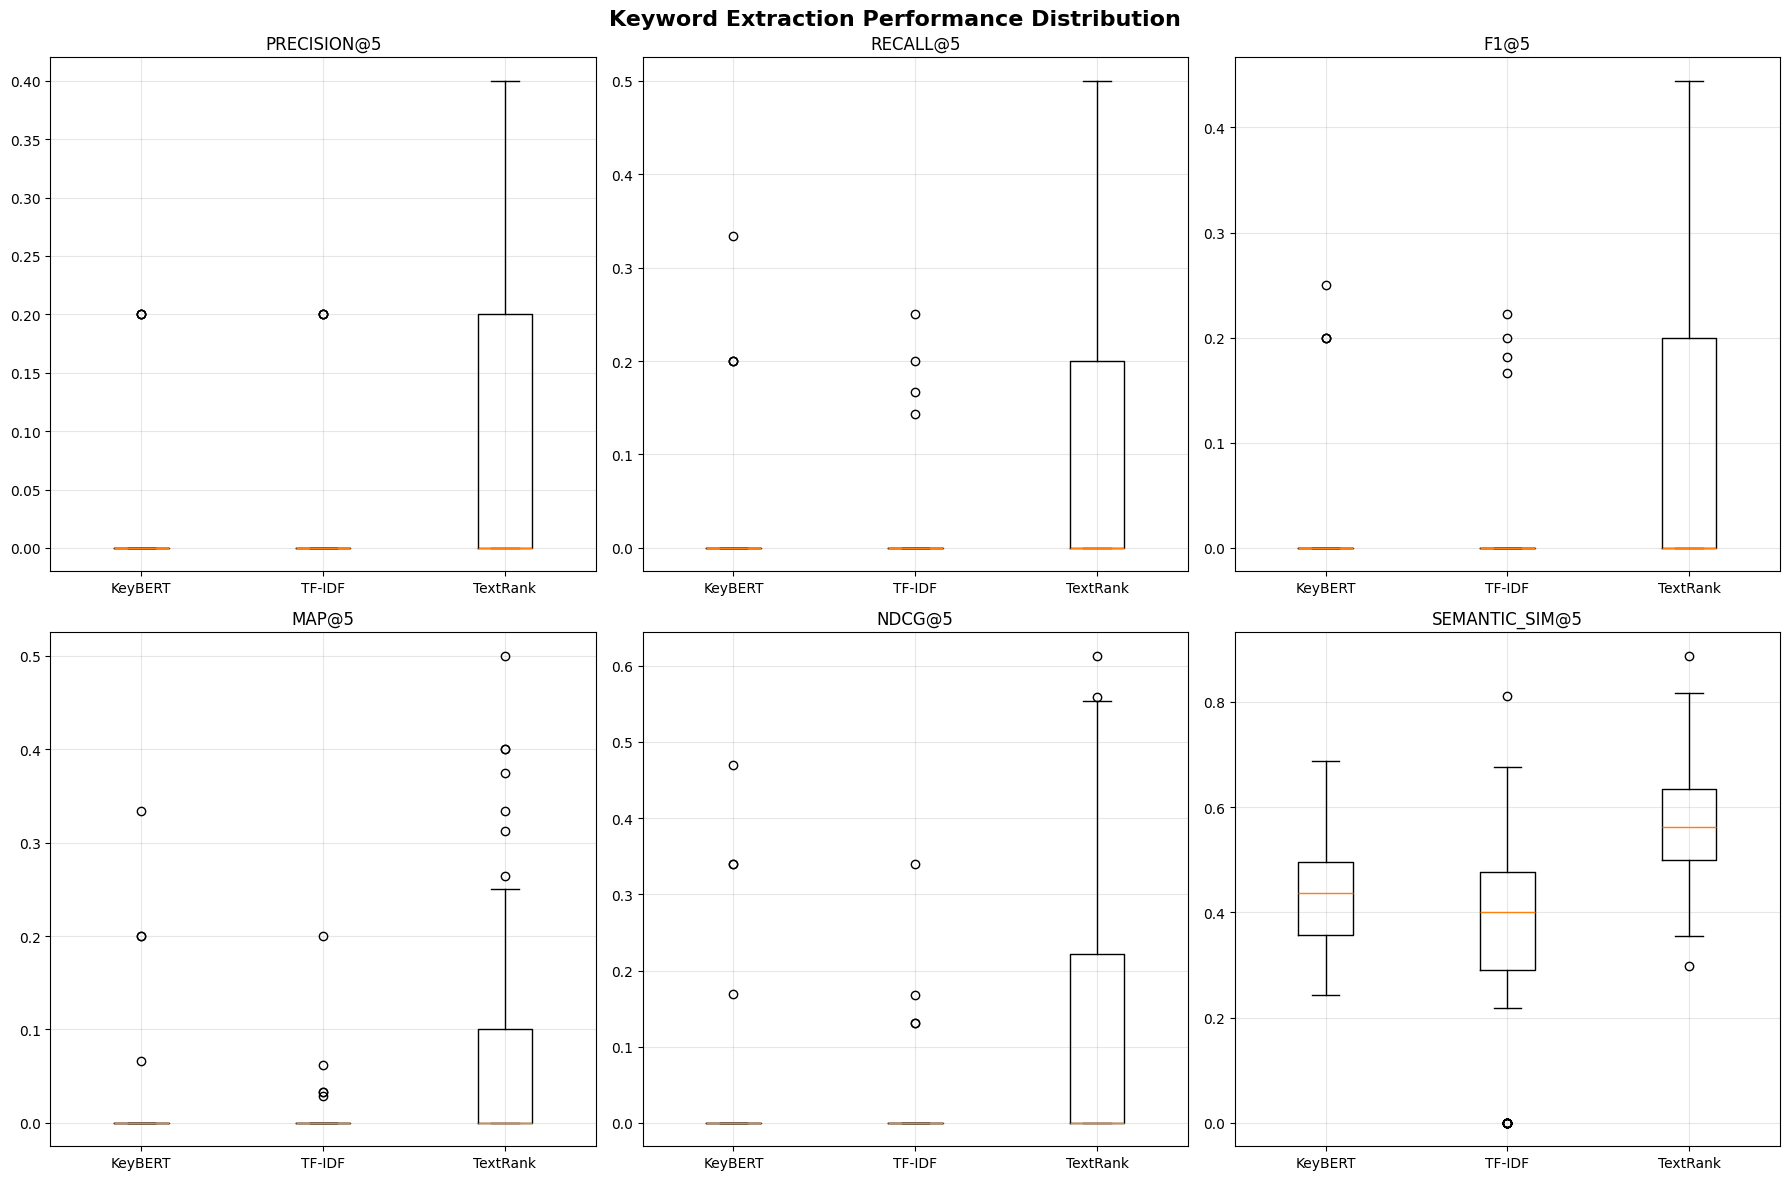

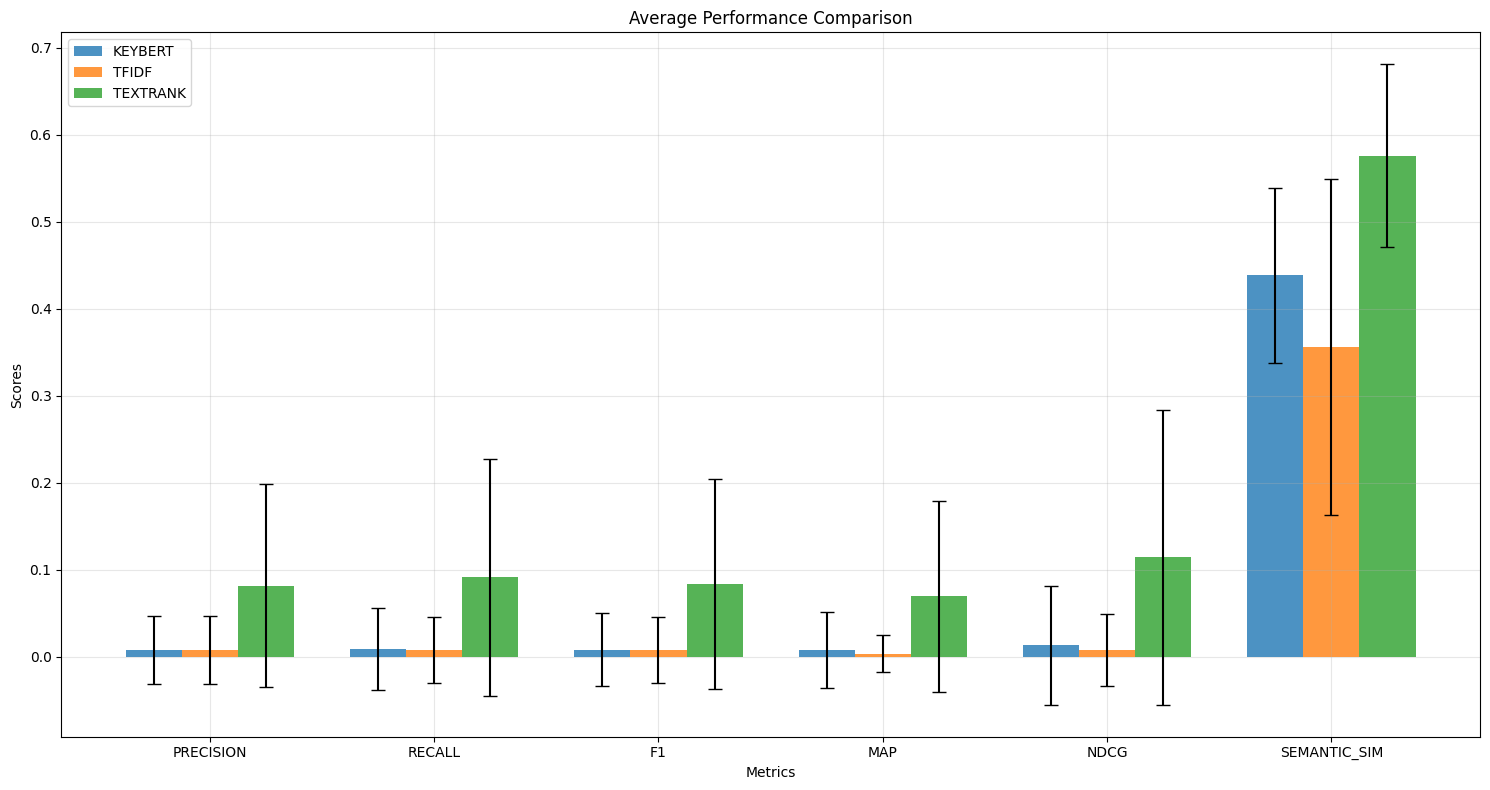

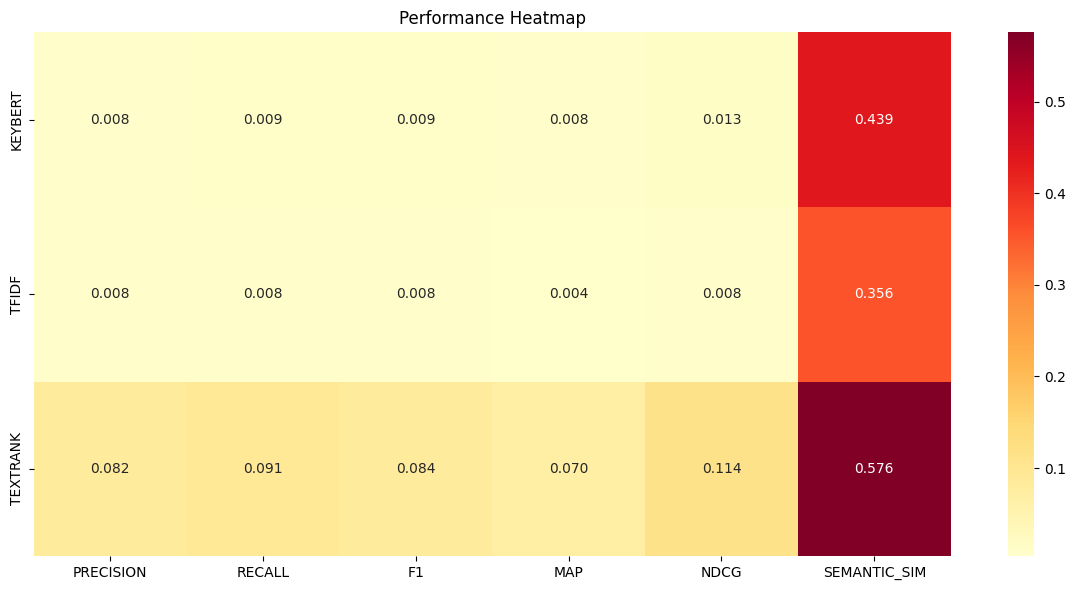

‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!

üíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...
‚ùå ÌèâÍ∞Ä Ï§ë Ïò§Î•ò Î∞úÏÉù: Object of type float32 is not JSON serializable


Traceback (most recent call last):
  File "<ipython-input-7-f769a6913adc>", line 718, in run_fair_evaluation
    self.save_results()
  File "<ipython-input-7-f769a6913adc>", line 593, in save_results
    json.dump(summary_data, f, ensure_ascii=False, indent=2)
  File "/usr/lib/python3.11/json/__init__.py", line 179, in dump
    for chunk in iterable:
  File "/usr/lib/python3.11/json/encoder.py", line 432, in _iterencode
    yield from _iterencode_dict(o, _current_indent_level)
  File "/usr/lib/python3.11/json/encoder.py", line 406, in _iterencode_dict
    yield from chunks
  File "/usr/lib/python3.11/json/encoder.py", line 406, in _iterencode_dict
    yield from chunks
  File "/usr/lib/python3.11/json/encoder.py", line 406, in _iterencode_dict
    yield from chunks
  [Previous line repeated 1 more time]
  File "/usr/lib/python3.11/json/encoder.py", line 439, in _iterencode
    o = _default(o)
        ^^^^^^^^^^^
  File "/usr/lib/python3.11/json/encoder.py", line 180, in default
    rai

In [8]:
evaluator = FairKeywordExtractorComparison(num_samples=100, random_seed=42)
evaluator.run_fair_evaluation()

# ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ver2

In [9]:
# Í∞úÏÑ†Îêú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏä§ÌÖú (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)
# KeyBERT, TF-IDF, TextRank, Hybrid 4Í∞ÄÏßÄ Î∞©Î≤ï ÎπÑÍµê

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
import random
import re
from collections import Counter
from tqdm import tqdm
import subprocess
import sys

warnings.filterwarnings('ignore')

def install_requirements():
    """ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)"""
    packages = [
        #'datasets',
        'keybert',
        'sentence-transformers',
        'konlpy',
        'networkx',
        'scikit-learn',
        'nltk',
        'scipy',
        'jpype1'  # KoNLPy ÏùòÏ°¥ÏÑ±
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"‚úì {package} ÏÑ§Ïπò ÏôÑÎ£å")
        except:
            print(f"‚úó {package} ÏÑ§Ïπò Ïã§Ìå®")

# Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
print("ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ï§ë...")
install_requirements()

ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ï§ë...
‚úì keybert ÏÑ§Ïπò ÏôÑÎ£å
‚úì sentence-transformers ÏÑ§Ïπò ÏôÑÎ£å
‚úì konlpy ÏÑ§Ïπò ÏôÑÎ£å
‚úì networkx ÏÑ§Ïπò ÏôÑÎ£å
‚úì scikit-learn ÏÑ§Ïπò ÏôÑÎ£å
‚úì nltk ÏÑ§Ïπò ÏôÑÎ£å
‚úì scipy ÏÑ§Ïπò ÏôÑÎ£å
‚úì jpype1 ÏÑ§Ïπò ÏôÑÎ£å


In [10]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
import networkx as nx
import nltk
from nltk.corpus import stopwords
from scipy import stats

# KoNLPy ÏûÑÌè¨Ìä∏ (ÏóêÎü¨ Ï≤òÎ¶¨ Ìè¨Ìï®)
try:
    from konlpy.tag import Okt, Komoran
    KONLPY_AVAILABLE = True
    print("‚úì KoNLPy ÏÇ¨Ïö© Í∞ÄÎä•")
except:
    KONLPY_AVAILABLE = False
    print("‚ö†Ô∏è KoNLPy ÏÇ¨Ïö© Î∂àÍ∞Ä - Í∏∞Î≥∏ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÏÇ¨Ïö©")

# NLTK Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
except:
    pass

class ImprovedKeywordExtractorComparison:
    """Í∞úÏÑ†Îêú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÌèâÍ∞Ä ÌÅ¥ÎûòÏä§ (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)"""

    def __init__(self, num_samples=100, random_seed=42):
        self.num_samples = num_samples
        self.random_seed = random_seed

        # ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
        random.seed(random_seed)
        np.random.seed(random_seed)

        # Í≤∞Í≥º Ï†ÄÏû•Ïö©
        self.results = {}
        self.predictions = {}
        self.references = []
        self.test_texts = []

        # ÌïúÍµ≠Ïñ¥ ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
        if KONLPY_AVAILABLE:
            try:
                self.okt = Okt()
                self.komoran = Komoran()
                self.use_advanced_tokenizer = True
                print("‚úì Í≥†Í∏â ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÏÇ¨Ïö©")
            except:
                self.use_advanced_tokenizer = False
                print("‚ö†Ô∏è Í∏∞Î≥∏ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÎåÄÏ≤¥")
        else:
            self.use_advanced_tokenizer = False

        print(f"üöÄ Í∞úÏÑ†Îêú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî (ÏãúÎìú: {random_seed})")

    def load_models(self):
        """Î™®Îì† Î™®Îç∏ Î°úÎìú (Í∞úÏÑ†Îêú ÏÑ§Ï†ï)"""
        print("\nüì• Î™®Îç∏ Î°úÎî© Ï§ë...")

        # KeyBERT (ÌïúÍµ≠Ïñ¥ ÌäπÌôî Î™®Îç∏)
        print("  - KeyBERT Î°úÎî©...")
        try:
            # ÌïúÍµ≠Ïñ¥ ÌäπÌôî Î™®Îç∏ ÏãúÎèÑ
            self.keybert = KeyBERT('klue/bert-base')
            print("    ‚úì KLUE BERT Î™®Îç∏ ÏÇ¨Ïö©")
        except:
            # ÎåÄÏ≤¥ Î™®Îç∏
            self.keybert = KeyBERT('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
            print("    ‚úì Multilingual Î™®Îç∏ ÏÇ¨Ïö©")

        # ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞Ïö©
        print("  - Sentence-BERT Î°úÎî©...")
        try:
            self.semantic_model = SentenceTransformer('klue/bert-base')
        except:
            self.semantic_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

        # TF-IDFÎäî ÎÇòÏ§ëÏóê ÌïúÍµ≠Ïñ¥ Îâ¥Ïä§ ÏΩîÌçºÏä§Î°ú ÌïôÏäµ
        self.tfidf_vectorizer = None

        # ÌïúÍµ≠Ïñ¥ Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏
        self.korean_stopwords = set([
            'Ïù¥', 'Í∑∏', 'Ï†Ä', 'Í≤É', 'Ïàò', 'Îì±', 'Îì§', 'Î∞è', 'ÎòêÌïú', 'ÌïòÏßÄÎßå', 'Í∑∏Îü¨ÎÇò',
            'Îî∞ÎùºÏÑú', 'Í∑∏ÎûòÏÑú', 'ÎòêÎäî', 'Í∑∏Î¶¨Í≥†', 'ÌïòÎäî', 'ÎêòÎäî', 'ÏûàÎäî', 'ÏóÜÎäî',
            'Ïù¥Îü∞', 'Í∑∏Îü∞', 'Ï†ÄÎü∞', 'Í∞ôÏùÄ', 'Îã§Î•∏', 'ÏÉàÎ°úÏö¥', 'ÎßéÏùÄ', 'Ï†ÅÏùÄ'
        ])

        print("‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!")

    def _detect_language(self, text):
        """Ïñ∏Ïñ¥ Í∞êÏßÄ (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)"""
        korean_chars = re.findall(r'[Í∞Ä-Ìû£]', text)
        english_chars = re.findall(r'[a-zA-Z]', text)

        if len(korean_chars) > len(english_chars):
            return 'korean'
        else:
            return 'english'

    def _advanced_korean_tokenizer(self, text):
        """Í≥†Í∏â ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä (KoNLPy ÏÇ¨Ïö©)"""
        try:
            # OktÎ°ú ÌíàÏÇ¨ ÌÉúÍπÖ
            pos_tags = self.okt.pos(text, stem=True)

            # Î™ÖÏÇ¨, ÌòïÏö©ÏÇ¨, ÎèôÏÇ¨Îßå Ï∂îÏ∂ú
            keywords = []
            for word, pos in pos_tags:
                if pos in ['Noun', 'Adjective', 'Verb'] and len(word) >= 2:
                    if word not in self.korean_stopwords:
                        keywords.append(word)

            return keywords

        except Exception as e:
            print(f"‚ö†Ô∏è Í≥†Í∏â ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ïò§Î•ò: {e}")
            return self._basic_korean_tokenizer(text)

    def _basic_korean_tokenizer(self, text):
        """Í∏∞Î≥∏ ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä"""
        words = re.findall(r'[Í∞Ä-Ìû£]{2,}', text)
        return [w for w in words if w not in self.korean_stopwords and len(w) >= 2]

    def _english_tokenizer(self, text):
        """ÏòÅÏñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä"""
        try:
            from nltk.tokenize import word_tokenize
            from nltk.tag import pos_tag

            tokens = word_tokenize(text.lower())
            pos_tags = pos_tag(tokens)

            keywords = []
            for word, pos in pos_tags:
                if (pos.startswith('NN') or pos.startswith('JJ') or pos.startswith('VB')) and len(word) >= 2:
                    if word.isalpha():
                        keywords.append(word)

            return keywords

        except:
            # Í∏∞Î≥∏ Î∞©Î≤ï
            words = re.findall(r'\b[a-zA-Z]{2,}\b', text.lower())
            return [w for w in words if len(w) >= 2]

    def _multilingual_tokenizer(self, text):
        """Í∞úÏÑ†Îêú Îã§Íµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä"""
        if not text:
            return []

        language = self._detect_language(text)

        if language == 'korean':
            if self.use_advanced_tokenizer:
                return self._advanced_korean_tokenizer(text)
            else:
                return self._basic_korean_tokenizer(text)
        else:
            return self._english_tokenizer(text)

    def _preprocess_text(self, text):
        """ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)"""
        if not text:
            return ""

        # ÌäπÏàòÎ¨∏Ïûê Ï†ïÎ¶¨ (ÌïúÍµ≠Ïñ¥ Î≥¥Ï°¥)
        text = re.sub(r'[^\w\sÍ∞Ä-Ìû£]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()

        # ÎÑàÎ¨¥ ÏßßÏùÄ ÌÖçÏä§Ìä∏ ÌïÑÌÑ∞ÎßÅ
        if len(text) < 10:
            return ""

        return text

    def _post_process_keywords(self, keywords, top_k=10):
        """ÌÇ§ÏõåÎìú ÌõÑÏ≤òÎ¶¨ (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)"""
        if not keywords:
            return []

        # 1. ÌäúÌîåÏóêÏÑú ÌÇ§ÏõåÎìúÎßå Ï∂îÏ∂ú (KeyBERT Í≤∞Í≥º Ï≤òÎ¶¨)
        processed = []
        for kw in keywords:
            if isinstance(kw, tuple):
                processed.append(str(kw[0]))
            else:
                processed.append(str(kw))

        # 2. Í∏∞Î≥∏ ÌïÑÌÑ∞ÎßÅ
        filtered = []
        for kw in processed:
            kw = kw.strip()
            if 2 <= len(kw) <= 20 and not kw.isdigit():
                # ÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî ÌÇ§ÏõåÎìú Ï†úÍ±∞
                if re.search(r'[Í∞Ä-Ìû£a-zA-Z]', kw):
                    filtered.append(kw)

        # 3. Ï§ëÎ≥µ Ï†úÍ±∞ (ÎåÄÏÜåÎ¨∏Ïûê Íµ¨Î∂Ñ ÏóÜÏù¥)
        seen = set()
        unique_keywords = []
        for kw in filtered:
            kw_lower = kw.lower()
            if kw_lower not in seen:
                seen.add(kw_lower)
                unique_keywords.append(kw)

        # 4. ÌíàÏßà Í∏∞Î∞ò Ï†ïÎ†¨ (Í∏∏Ïù¥ÏôÄ Î≥µÏû°ÏÑ± Í≥†Î†§)
        def keyword_quality_score(kw):
            score = 0
            score += len(kw) * 0.1  # Í∏∏Ïù¥ Î≥¥ÎÑàÏä§
            score += len(re.findall(r'[Í∞Ä-Ìû£]', kw)) * 0.2  # ÌïúÍµ≠Ïñ¥ Î≥¥ÎÑàÏä§
            if len(kw) >= 3:
                score += 0.5  # 3Í∏ÄÏûê Ïù¥ÏÉÅ Î≥¥ÎÑàÏä§
            return score

        unique_keywords.sort(key=keyword_quality_score, reverse=True)

        return unique_keywords[:top_k]

    def load_dataset(self):
        """Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Î∞è Î∂ÑÌï†"""
        print(f"\nüìä Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...")

        try:
            dataset = load_dataset("taln-ls2n/kptimes")
            test_data = dataset['test']

            # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉòÌîåÎßÅ
            if len(test_data) > self.num_samples:
                indices = random.sample(range(len(test_data)), self.num_samples)
                sampled_data = [test_data[i] for i in indices]
            else:
                sampled_data = list(test_data)

            # Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
            processed_data = []
            for item in sampled_data:
                title = item.get('title', '')
                abstract = item.get('abstract', '')
                full_text = f"{title} {abstract}".strip()

                keyphrases = item.get('keyphrases', [])
                if isinstance(keyphrases, str):
                    keyphrases = [kp.strip() for kp in keyphrases.split(',') if kp.strip()]
                elif not isinstance(keyphrases, list):
                    keyphrases = []

                # ÌÖçÏä§Ìä∏ ÌíàÏßà ÌôïÏù∏
                clean_text = self._preprocess_text(full_text)
                if clean_text and keyphrases and len(clean_text) > 50:
                    processed_data.append({
                        'text': clean_text,
                        'keywords': keyphrases
                    })

            self.test_data = processed_data
            self.test_texts = [item['text'] for item in processed_data]
            self.references = [item['keywords'] for item in processed_data]

            print(f"‚úÖ Ï≤òÎ¶¨Îêú Í≥†ÌíàÏßà Îç∞Ïù¥ÌÑ∞: {len(processed_data)}Í∞ú")

        except Exception as e:
            print(f"‚ùå Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïò§Î•ò: {e}")
            self.test_data = []

    def prepare_improved_tfidf(self):
        """Í∞úÏÑ†Îêú TF-IDF Ï§ÄÎπÑ (ÌïúÍµ≠Ïñ¥ Îâ¥Ïä§ ÏΩîÌçºÏä§ ÏÇ¨Ïö©)"""
        print("\n‚öñÔ∏è Í∞úÏÑ†Îêú TF-IDF Ï§ÄÎπÑ Ï§ë...")

        try:
            # ÌïúÍµ≠Ïñ¥ Îâ¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú ÏãúÎèÑ
            try:
                print("  - KLUE YNAT Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© ÏãúÎèÑ...")
                klue_dataset = load_dataset("klue", "ynat")
                train_texts = [item['title'] for item in klue_dataset['train'][:1000]]
                print(f"  ‚úì KLUE Îç∞Ïù¥ÌÑ∞ {len(train_texts)}Í∞ú Î°úÎìú")
            except:
                print("  - KLUE Î°úÎìú Ïã§Ìå®, ÎåÄÏ≤¥ ÏΩîÌçºÏä§ ÏÉùÏÑ±...")
                # ÌïúÍµ≠Ïñ¥ Îâ¥Ïä§ Ïä§ÌÉÄÏùº ÎåÄÏ≤¥ ÏΩîÌçºÏä§
                train_texts = [
                    "Ï†ïÎ∂ÄÍ∞Ä ÏÉàÎ°úÏö¥ Ï†ïÏ±ÖÏùÑ Î∞úÌëúÌñàÎã§Í≥† Î∞ùÌòîÏäµÎãàÎã§",
                    "Í≤ΩÏ†ú ÏÑ±Ïû•Î•†Ïù¥ ÏòàÏÉÅÎ≥¥Îã§ ÎÜíÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§",
                    "Í∏∞Ïà† ÌòÅÏã†ÏùÑ ÌÜµÌïú ÏÇ∞ÏóÖ Î∞úÏ†ÑÏù¥ Í∏∞ÎåÄÎê©ÎãàÎã§",
                    "ÍµêÏú° Ï†úÎèÑ Í∞úÏÑ† Î∞©ÏïàÏù¥ ÎÖºÏùòÎêòÍ≥† ÏûàÏäµÎãàÎã§",
                    "ÌôòÍ≤Ω Î≥¥Ìò∏Î•º ÏúÑÌïú ÏÉàÎ°úÏö¥ Í∑úÏ†úÍ∞Ä ÏãúÌñâÎê©ÎãàÎã§",
                    "ÏùòÎ£å ÏÑúÎπÑÏä§ ÌíàÏßà Ìñ•ÏÉÅÏù¥ Ï∂îÏßÑÎêòÍ≥† ÏûàÏäµÎãàÎã§",
                    "Î¨∏Ìôî ÏòàÏà† Î∂ÑÏïº ÏßÄÏõê Ï†ïÏ±ÖÏù¥ ÌôïÎåÄÎê©ÎãàÎã§",
                    "Í≥ºÌïô Í∏∞Ïà† Ïó∞Íµ¨ Í∞úÎ∞úÏù¥ ÌôúÎ∞úÌûà ÏßÑÌñâÎê©ÎãàÎã§",
                    "ÏÇ¨Ìöå Î≥µÏßÄ Ï†úÎèÑÍ∞Ä Í∞úÏÑ†ÎêòÍ≥† ÏûàÏäµÎãàÎã§",
                    "Íµ≠Ï†ú ÌòëÎ†• Í¥ÄÍ≥ÑÍ∞Ä Í∞ïÌôîÎêòÍ≥† ÏûàÏäµÎãàÎã§"
                ] * 100  # Î∞òÎ≥µÌïòÏó¨ ÏΩîÌçºÏä§ ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä

            # Í∞úÏÑ†Îêú TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä
            self.tfidf_vectorizer = TfidfVectorizer(
                tokenizer=self._multilingual_tokenizer,
                ngram_range=(1, 3),  # ÌôïÏû•Îêú n-gram
                max_features=10000,  # Îçî ÎßéÏùÄ ÌäπÏÑ±
                min_df=2,
                max_df=0.8,
                lowercase=True,
                sublinear_tf=True  # Î°úÍ∑∏ Ïä§ÏºÄÏùºÎßÅ
            )

            # ÌïúÍµ≠Ïñ¥ Îâ¥Ïä§ ÏΩîÌçºÏä§Î°ú ÌïôÏäµ
            self.tfidf_vectorizer.fit(train_texts)
            print("‚úÖ Í∞úÏÑ†Îêú TF-IDF ÌïôÏäµ ÏôÑÎ£å!")

        except Exception as e:
            print(f"‚ö†Ô∏è TF-IDF Ï§ÄÎπÑ Ïò§Î•ò: {e}")
            # ÏµúÏÜåÌïúÏùò Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä
            self.tfidf_vectorizer = TfidfVectorizer(
                ngram_range=(1, 2),
                max_features=5000,
                min_df=1
            )
            basic_corpus = ["ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÌÖåÏä§Ìä∏ Î¨∏ÏÑúÏûÖÎãàÎã§"] * 10
            self.tfidf_vectorizer.fit(basic_corpus)
            print("‚úÖ Í∏∞Î≥∏ TF-IDF ÌïôÏäµ ÏôÑÎ£å!")

    def extract_keybert_keywords(self, text, top_k=10):
        """Í∞úÏÑ†Îêú KeyBERT ÌÇ§ÏõåÎìú Ï∂îÏ∂ú"""
        try:
            if not text.strip():
                return []

            # ÌïúÍµ≠Ïñ¥ ÌäπÌôî ÌååÎùºÎØ∏ÌÑ∞
            keywords = self.keybert.extract_keywords(
                text,
                keyphrase_ngram_range=(1, 3),  # ÌôïÏû•Îêú n-gram
                stop_words=None,  # ÏûêÏ≤¥ Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨
                top_n=top_k * 3,  # Îçî ÎßéÏù¥ Ï∂îÏ∂ú ÌõÑ ÌïÑÌÑ∞ÎßÅ
                use_mmr=True,
                diversity=0.3,  # Îã§ÏñëÏÑ± Í∞êÏÜå, Ï†ïÌôïÏÑ± Ï¶ùÍ∞Ä
                use_maxsum=True,
                nr_candidates=30
            )

            keyword_list = [kw[0] for kw in keywords]
            return self._post_process_keywords(keyword_list, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è KeyBERT Ïò§Î•ò: {e}")
            # ÎåÄÏ≤¥ Î∞©Î≤ï
            tokens = self._multilingual_tokenizer(text)
            token_counts = Counter(tokens)
            fallback_keywords = [word for word, count in token_counts.most_common(top_k * 2)]
            return self._post_process_keywords(fallback_keywords, top_k)

    def extract_tfidf_keywords(self, text, top_k=10):
        """Í∞úÏÑ†Îêú TF-IDF ÌÇ§ÏõåÎìú Ï∂îÏ∂ú"""
        try:
            if not text.strip() or self.tfidf_vectorizer is None:
                return []

            tfidf_vector = self.tfidf_vectorizer.transform([text])
            feature_names = self.tfidf_vectorizer.get_feature_names_out()
            scores = tfidf_vector.toarray()[0]

            # ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (Ï†êÏàò ÏûÑÍ≥ÑÍ∞í Ï†ÅÏö©)
            score_threshold = np.percentile(scores[scores > 0], 50) if len(scores[scores > 0]) > 0 else 0
            top_indices = scores.argsort()[-(top_k * 3):][::-1]

            keywords = []
            for idx in top_indices:
                if scores[idx] > score_threshold:
                    keywords.append(feature_names[idx])

            return self._post_process_keywords(keywords, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è TF-IDF Ïò§Î•ò: {e}")
            return []

    def extract_textrank_keywords(self, text, top_k=10):
        """Í∞úÏÑ†Îêú TextRank ÌÇ§ÏõåÎìú Ï∂îÏ∂ú"""
        try:
            if not text.strip():
                return []

            tokens = self._multilingual_tokenizer(text)

            if len(tokens) < 5:
                return self._post_process_keywords(tokens, top_k)

            # Í∞úÏÑ†Îêú Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
            graph = nx.Graph()

            # Ï†ÅÏùëÏ†Å ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞
            window_size = min(6, max(3, len(tokens) // 10))

            # Í∞ÄÏ§ëÏπòÍ∞Ä ÏûàÎäî Ïó£ÏßÄ ÏÉùÏÑ±
            for i in range(len(tokens) - window_size + 1):
                window = tokens[i:i + window_size]
                for j in range(len(window)):
                    for k in range(j + 1, len(window)):
                        if window[j] != window[k]:
                            # Í±∞Î¶¨ Í∏∞Î∞ò Í∞ÄÏ§ëÏπò
                            distance_weight = 1.0 / (abs(j - k) + 1)

                            if graph.has_edge(window[j], window[k]):
                                graph[window[j]][window[k]]['weight'] += distance_weight
                            else:
                                graph.add_edge(window[j], window[k], weight=distance_weight)

            if len(graph.nodes()) == 0:
                return self._post_process_keywords(tokens, top_k)

            # PageRank Ïã§Ìñâ (Í∞úÏÑ†Îêú ÌååÎùºÎØ∏ÌÑ∞)
            pagerank_scores = nx.pagerank(
                graph,
                weight='weight',
                alpha=0.85,
                max_iter=100,
                tol=1e-6
            )

            sorted_keywords = sorted(pagerank_scores.items(),
                                   key=lambda x: x[1], reverse=True)

            keywords = [kw[0] for kw in sorted_keywords]
            return self._post_process_keywords(keywords, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è TextRank Ïò§Î•ò: {e}")
            return []

    def extract_hybrid_keywords(self, text, top_k=10):
        """ÌïòÏù¥Î∏åÎ¶¨Îìú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (TextRank + KeyBERT)"""
        try:
            if not text.strip():
                return []

            # Í∞Å Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            textrank_keywords = self.extract_textrank_keywords(text, top_k * 2)
            keybert_keywords = self.extract_keybert_keywords(text, top_k * 2)

            # ÌÇ§ÏõåÎìú Ï†êÏàò Í≥ÑÏÇ∞
            keyword_scores = {}

            # TextRank Ï†êÏàò (Íµ¨Ï°∞Ï†Å Ï§ëÏöîÎèÑ)
            for i, kw in enumerate(textrank_keywords):
                score = (len(textrank_keywords) - i) / len(textrank_keywords)
                keyword_scores[kw] = keyword_scores.get(kw, 0) + score * 0.4

            # KeyBERT Ï†êÏàò (ÏùòÎØ∏Ï†Å Ï§ëÏöîÎèÑ)
            for i, kw in enumerate(keybert_keywords):
                score = (len(keybert_keywords) - i) / len(keybert_keywords)
                keyword_scores[kw] = keyword_scores.get(kw, 0) + score * 0.6

            # Ï∂îÍ∞Ä Î≥¥ÎÑàÏä§ (Îëê Î∞©Î≤ï Î™®ÎëêÏóêÏÑú ÎÇòÏò® ÌÇ§ÏõåÎìú)
            common_keywords = set(textrank_keywords) & set(keybert_keywords)
            for kw in common_keywords:
                keyword_scores[kw] = keyword_scores.get(kw, 0) + 0.3

            # Ï†êÏàò Í∏∞Î∞ò Ï†ïÎ†¨
            sorted_keywords = sorted(keyword_scores.items(),
                                   key=lambda x: x[1], reverse=True)

            hybrid_keywords = [kw[0] for kw in sorted_keywords]
            return self._post_process_keywords(hybrid_keywords, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è Hybrid Ïò§Î•ò: {e}")
            # ÎåÄÏ≤¥: KeyBERT Í≤∞Í≥º Î∞òÌôò
            return self.extract_keybert_keywords(text, top_k)

    def extract_all_keywords(self):
        """Î™®Îì† Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)"""
        print(f"\nüîÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏãúÏûë ({len(self.test_data)}Í∞ú ÏÉòÌîå)...")

        keybert_predictions = []
        tfidf_predictions = []
        textrank_predictions = []
        hybrid_predictions = []

        for i, item in enumerate(tqdm(self.test_data, desc="ÌÇ§ÏõåÎìú Ï∂îÏ∂ú")):
            text = item['text']

            # Í∞Å Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            keybert_kw = self.extract_keybert_keywords(text, top_k=10)
            tfidf_kw = self.extract_tfidf_keywords(text, top_k=10)
            textrank_kw = self.extract_textrank_keywords(text, top_k=10)
            hybrid_kw = self.extract_hybrid_keywords(text, top_k=10)

            keybert_predictions.append(keybert_kw)
            tfidf_predictions.append(tfidf_kw)
            textrank_predictions.append(textrank_kw)
            hybrid_predictions.append(hybrid_kw)

            # ÏßÑÌñâÏÉÅÌô© Ï∂úÎ†• (20Í∞úÎßàÎã§)
            if (i + 1) % 20 == 0:
                print(f"\n--- ÏÉòÌîå {i+1} ---")
                print(f"ÌÖçÏä§Ìä∏: {text[:100]}...")
                print(f"KeyBERT: {keybert_kw[:3]}")
                print(f"TF-IDF: {tfidf_kw[:3]}")
                print(f"TextRank: {textrank_kw[:3]}")
                print(f"Hybrid: {hybrid_kw[:3]}")

        # Í≤∞Í≥º Ï†ÄÏû•
        self.predictions = {
            'keybert': keybert_predictions,
            'tfidf': tfidf_predictions,
            'textrank': textrank_predictions,
            'hybrid': hybrid_predictions
        }

        print("‚úÖ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏôÑÎ£å!")

    def calculate_precision_recall_f1(self, predicted, true, k=5):
        """Precision@K, Recall@K, F1@K Í≥ÑÏÇ∞"""
        pred_k = set([kw.lower().strip() for kw in predicted[:k] if kw])
        true_set = set([kw.lower().strip() for kw in true if kw])

        if len(true_set) == 0 or len(pred_k) == 0:
            return {"precision": 0, "recall": 0, "f1": 0}

        intersection = pred_k.intersection(true_set)

        precision = len(intersection) / len(pred_k) if len(pred_k) > 0 else 0
        recall = len(intersection) / len(true_set)
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        return {"precision": precision, "recall": recall, "f1": f1}

    def calculate_partial_match_score(self, predicted, true, k=5):
        """Î∂ÄÎ∂Ñ Îß§Ïπ≠ Ï†êÏàò Í≥ÑÏÇ∞ (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)"""
        pred_k = [kw.lower().strip() for kw in predicted[:k] if kw]
        true_list = [kw.lower().strip() for kw in true if kw]

        if len(true_list) == 0 or len(pred_k) == 0:
            return 0

        matches = 0
        for pred in pred_k:
            for true_kw in true_list:
                # Îã§ÏñëÌïú Îß§Ïπ≠ Î∞©Ïãù
                if (pred == true_kw or  # ÏôÑÏ†Ñ ÏùºÏπò
                    pred in true_kw or  # Ìè¨Ìï® Í¥ÄÍ≥Ñ
                    true_kw in pred or  # Ïó≠Ìè¨Ìï® Í¥ÄÍ≥Ñ
                    self._fuzzy_match(pred, true_kw)):  # Ïú†ÏÇ¨ Îß§Ïπ≠
                    matches += 1
                    break

        return matches / len(pred_k) if len(pred_k) > 0 else 0

    def _fuzzy_match(self, str1, str2, threshold=0.8):
        """Í∞ÑÎã®Ìïú Ïú†ÏÇ¨ Îß§Ïπ≠"""
        if len(str1) < 2 or len(str2) < 2:
            return False

        # ÏûêÏπ¥Îìú Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        set1 = set(str1)
        set2 = set(str2)
        intersection = len(set1 & set2)
        union = len(set1 | set2)

        return (intersection / union) > threshold if union > 0 else False

    def calculate_map_score(self, predicted, true, k=10):
        """Mean Average Precision Í≥ÑÏÇ∞"""
        true_set = set([kw.lower().strip() for kw in true if kw])

        if len(true_set) == 0:
            return 0

        score = 0
        num_hits = 0

        for i, pred in enumerate(predicted[:k]):
            if pred.lower().strip() in true_set:
                num_hits += 1
                score += num_hits / (i + 1)

        return score / len(true_set) if len(true_set) > 0 else 0

    def calculate_ndcg_score(self, predicted, true, k=5):
        """NDCG@K Í≥ÑÏÇ∞"""
        true_set = set([kw.lower().strip() for kw in true if kw])

        if len(true_set) == 0:
            return 0

        # DCG Í≥ÑÏÇ∞
        dcg = 0
        for i, pred in enumerate(predicted[:k]):
            if pred.lower().strip() in true_set:
                dcg += 1 / np.log2(i + 2)

        # IDCG Í≥ÑÏÇ∞
        idcg = sum(1 / np.log2(i + 2) for i in range(min(len(true_set), k)))

        return dcg / idcg if idcg > 0 else 0

    def calculate_semantic_similarity(self, predicted, true, k=5):
        """ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞"""
        pred_k = [kw for kw in predicted[:k] if kw.strip()]
        true_list = [kw for kw in true if kw.strip()]

        if len(true_list) == 0 or len(pred_k) == 0:
            return 0

        try:
            pred_embeddings = self.semantic_model.encode(pred_k)
            true_embeddings = self.semantic_model.encode(true_list)

            similarities = cosine_similarity(pred_embeddings, true_embeddings)
            max_similarities = np.max(similarities, axis=1)

            return np.mean(max_similarities)

        except:
            return 0

    def calculate_all_metrics(self):
        """Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)"""
        print("\nüìä ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'map', 'ndcg', 'semantic_sim']

        self.results = {}

        for method in methods:
            print(f"  - {method.upper()} ÌèâÍ∞Ä Ï§ë...")

            self.results[method] = {metric: [] for metric in metrics}

            predictions = self.predictions[method]

            for pred, true in zip(predictions, self.references):
                # Í∏∞Î≥∏ ÏßÄÌëú
                basic_metrics = self.calculate_precision_recall_f1(pred, true, k=5)
                self.results[method]['precision'].append(basic_metrics['precision'])
                self.results[method]['recall'].append(basic_metrics['recall'])
                self.results[method]['f1'].append(basic_metrics['f1'])

                # Î∂ÄÎ∂Ñ Îß§Ïπ≠
                partial_score = self.calculate_partial_match_score(pred, true, k=5)
                self.results[method]['partial_match'].append(partial_score)

                # MAP
                map_score = self.calculate_map_score(pred, true, k=10)
                self.results[method]['map'].append(map_score)

                # NDCG
                ndcg_score = self.calculate_ndcg_score(pred, true, k=5)
                self.results[method]['ndcg'].append(ndcg_score)

                # ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ
                sem_sim = self.calculate_semantic_similarity(pred, true, k=5)
                self.results[method]['semantic_sim'].append(sem_sim)

        print("‚úÖ Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å!")

    def statistical_analysis(self):
        """ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)"""
        print("\nüìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'map', 'ndcg', 'semantic_sim']

        self.stat_results = {}

        # Î™®Îì† Î∞©Î≤ï ÏåçÏóê ÎåÄÌï¥ Í≤ÄÏ†ï
        for i, method1 in enumerate(methods):
            for j, method2 in enumerate(methods):
                if i < j:
                    pair_name = f"{method1}_vs_{method2}"
                    self.stat_results[pair_name] = {}

                    for metric in metrics:
                        scores1 = self.results[method1][metric]
                        scores2 = self.results[method2][metric]

                        # Paired t-test
                        try:
                            t_stat, t_pvalue = stats.ttest_rel(scores1, scores2)
                        except:
                            t_stat, t_pvalue = 0, 1

                        # Wilcoxon signed-rank test
                        try:
                            w_stat, w_pvalue = stats.wilcoxon(scores1, scores2)
                        except:
                            w_stat, w_pvalue = 0, 1

                        # Ìö®Í≥º ÌÅ¨Í∏∞
                        pooled_std = np.sqrt((np.var(scores1) + np.var(scores2)) / 2)
                        cohens_d = (np.mean(scores1) - np.mean(scores2)) / pooled_std if pooled_std > 0 else 0

                        self.stat_results[pair_name][metric] = {
                            't_statistic': t_stat,
                            't_pvalue': t_pvalue,
                            'wilcoxon_statistic': w_stat,
                            'wilcoxon_pvalue': w_pvalue,
                            'cohens_d': cohens_d,
                            'mean_diff': np.mean(scores1) - np.mean(scores2)
                        }

        print("‚úÖ ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù ÏôÑÎ£å!")

    def create_visualizations(self):
        """Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)"""
        print("\nüé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")

        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'map', 'ndcg', 'semantic_sim']

        # 1. Î∞ïÏä§ÌîåÎ°Ø (2x4 Î†àÏù¥ÏïÑÏõÉ)
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle('Improved Keyword Extraction Performance Distribution', fontsize=16, fontweight='bold')

        for i, metric in enumerate(metrics):
            row = i // 4
            col = i % 4

            if i < len(metrics):
                data_to_plot = [self.results[method][metric] for method in methods]

                axes[row, col].boxplot(data_to_plot, labels=['KeyBERT', 'TF-IDF', 'TextRank', 'Hybrid'])
                axes[row, col].set_title(f'{metric.upper()}@5')
                axes[row, col].grid(True, alpha=0.3)
                axes[row, col].tick_params(axis='x', rotation=45)
            else:
                axes[row, col].axis('off')

        plt.tight_layout()
        plt.savefig('improved_keyword_extraction_boxplot.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 2. ÌèâÍ∑† ÏÑ±Îä• ÎπÑÍµê
        fig, ax = plt.subplots(figsize=(16, 8))

        x = np.arange(len(metrics))
        width = 0.2

        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

        for i, method in enumerate(methods):
            means = [np.mean(self.results[method][metric]) for metric in metrics]
            stds = [np.std(self.results[method][metric]) for metric in metrics]

            ax.bar(x + i*width, means, width, yerr=stds,
                   label=method.upper(), alpha=0.8, capsize=5, color=colors[i])

        ax.set_xlabel('Metrics')
        ax.set_ylabel('Scores')
        ax.set_title('Improved Average Performance Comparison (with Hybrid)')
        ax.set_xticks(x + width * 1.5)
        ax.set_xticklabels([m.upper() for m in metrics], rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('improved_keyword_extraction_barplot.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 3. ÌûàÌä∏Îßµ
        heatmap_data = []
        for method in methods:
            row = [np.mean(self.results[method][metric]) for metric in metrics]
            heatmap_data.append(row)

        fig, ax = plt.subplots(figsize=(14, 8))
        sns.heatmap(heatmap_data,
                   xticklabels=[m.upper() for m in metrics],
                   yticklabels=[m.upper() for m in methods],
                   annot=True, fmt='.3f', cmap='YlOrRd',
                   ax=ax)
        ax.set_title('Improved Performance Heatmap (with Hybrid)')
        plt.tight_layout()
        plt.savefig('improved_keyword_extraction_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 4. ÌïòÏù¥Î∏åÎ¶¨Îìú vs Í∞úÎ≥Ñ Î∞©Î≤ï ÎπÑÍµê
        fig, ax = plt.subplots(figsize=(12, 8))

        hybrid_means = [np.mean(self.results['hybrid'][metric]) for metric in metrics]
        best_individual_means = []

        for metric in metrics:
            individual_scores = [np.mean(self.results[method][metric])
                               for method in ['keybert', 'tfidf', 'textrank']]
            best_individual_means.append(max(individual_scores))

        x = np.arange(len(metrics))
        width = 0.35

        ax.bar(x - width/2, best_individual_means, width,
               label='Best Individual Method', alpha=0.8, color='lightblue')
        ax.bar(x + width/2, hybrid_means, width,
               label='Hybrid Method', alpha=0.8, color='darkred')

        ax.set_xlabel('Metrics')
        ax.set_ylabel('Scores')
        ax.set_title('Hybrid vs Best Individual Method Performance')
        ax.set_xticks(x)
        ax.set_xticklabels([m.upper() for m in metrics], rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('hybrid_vs_individual_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!")

    def save_results(self):
        """Í≤∞Í≥º Ï†ÄÏû• (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)"""
        print("\nüíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...")

        # ÏÉÅÏÑ∏ Í≤∞Í≥º CSV
        detailed_results = []
        for i in range(len(self.references)):
            row = {
                'sample_id': i,
                'text': self.test_texts[i][:200] + "..." if len(self.test_texts[i]) > 200 else self.test_texts[i],
                'true_keywords': '; '.join(self.references[i][:10])
            }

            for method in ['keybert', 'tfidf', 'textrank', 'hybrid']:
                row[f'{method}_keywords'] = '; '.join(self.predictions[method][i][:5])

                for metric in ['precision', 'recall', 'f1', 'partial_match', 'map', 'ndcg', 'semantic_sim']:
                    row[f'{method}_{metric}'] = self.results[method][metric][i]

            detailed_results.append(row)

        df = pd.DataFrame(detailed_results)
        df.to_csv('improved_keyword_extraction_results.csv', index=False, encoding='utf-8-sig')

        # ÏöîÏïΩ Í≤∞Í≥º JSON
        summary_data = {
            'experiment_info': {
                'num_samples': self.num_samples,
                'random_seed': self.random_seed,
                'evaluation_date': datetime.now().isoformat(),
                'methods': ['KeyBERT', 'TF-IDF', 'TextRank', 'Hybrid'],
                'improvements': [
                    'Advanced Korean tokenizer (KoNLPy)',
                    'Korean news corpus for TF-IDF',
                    'Optimized KeyBERT parameters',
                    'Improved TextRank with distance weighting',
                    'Hybrid method combining TextRank and KeyBERT'
                ]
            },
            'performance_summary': {},
            'statistical_results': self.stat_results,
            'sample_predictions': {
                'keybert': self.predictions['keybert'][:3],
                'tfidf': self.predictions['tfidf'][:3],
                'textrank': self.predictions['textrank'][:3],
                'hybrid': self.predictions['hybrid'][:3],
                'references': self.references[:3]
            }
        }

        # ÏÑ±Îä• ÏöîÏïΩ Í≥ÑÏÇ∞
        for method in ['keybert', 'tfidf', 'textrank', 'hybrid']:
            summary_data['performance_summary'][method] = {}
            for metric in ['precision', 'recall', 'f1', 'partial_match', 'map', 'ndcg', 'semantic_sim']:
                scores = self.results[method][metric]
                summary_data['performance_summary'][method][metric] = {
                    'mean': float(np.mean(scores)),
                    'std': float(np.std(scores)),
                    'median': float(np.median(scores))
                }

        with open('improved_keyword_extraction_summary.json', 'w', encoding='utf-8') as f:
            json.dump(summary_data, f, ensure_ascii=False, indent=2)

        print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!")
        print("  - improved_keyword_extraction_results.csv: ÏÉÅÏÑ∏ Í≤∞Í≥º")
        print("  - improved_keyword_extraction_summary.json: ÌÜµÍ≥Ñ ÏöîÏïΩ")

    def generate_report(self):
        """Ï¢ÖÌï© Î≥¥Í≥†ÏÑú ÏÉùÏÑ± (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)"""
        print("\nüìã Ï¢ÖÌï© Î≥¥Í≥†ÏÑú ÏÉùÏÑ± Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'map', 'ndcg', 'semantic_sim']

        report = []
        report.append("=" * 80)
        report.append("Í∞úÏÑ†Îêú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä Î≥¥Í≥†ÏÑú")
        report.append("KeyBERT vs TF-IDF vs TextRank vs Hybrid")
        report.append("=" * 80)
        report.append(f"ÌèâÍ∞Ä ÏùºÏãú: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"ÌèâÍ∞Ä ÏÉòÌîå Ïàò: {self.num_samples}")
        report.append(f"ÎûúÎç§ ÏãúÎìú: {self.random_seed}")
        report.append("")

        # Í∞úÏÑ†ÏÇ¨Ìï≠
        report.append("üîß Ï£ºÏöî Í∞úÏÑ†ÏÇ¨Ìï≠")
        report.append("-" * 40)
        report.append("‚Ä¢ Í≥†Í∏â ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä (KoNLPy) Ï†ÅÏö©")
        report.append("‚Ä¢ ÌïúÍµ≠Ïñ¥ Îâ¥Ïä§ ÏΩîÌçºÏä§Î°ú TF-IDF ÌïôÏäµ")
        report.append("‚Ä¢ KeyBERT ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî")
        report.append("‚Ä¢ TextRank Í±∞Î¶¨ Í∞ÄÏ§ëÏπò Ï†ÅÏö©")
        report.append("‚Ä¢ ÌïòÏù¥Î∏åÎ¶¨Îìú Î∞©Î≤ïÎ°† (TextRank + KeyBERT) Í∞úÎ∞ú")
        report.append("‚Ä¢ Î∂ÄÎ∂Ñ Îß§Ïπ≠ ÌèâÍ∞Ä ÏßÄÌëú Ï∂îÍ∞Ä")
        report.append("")

        # ÏÑ±Îä• ÏöîÏïΩ
        report.append("üìä ÏÑ±Îä• ÏöîÏïΩ (ÌèâÍ∑† ¬± ÌëúÏ§ÄÌé∏Ï∞®)")
        report.append("-" * 60)

        for metric in metrics:
            report.append(f"\n{metric.upper()}:")
            for method in methods:
                mean_score = np.mean(self.results[method][metric])
                std_score = np.std(self.results[method][metric])
                report.append(f"  {method.upper():>10}: {mean_score:.4f} ¬± {std_score:.4f}")

        report.append("")

        # ÏµúÍ≥† ÏÑ±Îä• Î∞©Î≤ï
        report.append("üèÜ ÏµúÍ≥† ÏÑ±Îä• Î∞©Î≤ï")
        report.append("-" * 40)

        for metric in metrics:
            best_method = max(methods, key=lambda m: np.mean(self.results[m][metric]))
            best_score = np.mean(self.results[best_method][metric])
            report.append(f"{metric.upper():>15}: {best_method.upper()} ({best_score:.4f})")

        report.append("")

        # ÌïòÏù¥Î∏åÎ¶¨Îìú ÏÑ±Îä• Î∂ÑÏÑù
        report.append("üîÄ ÌïòÏù¥Î∏åÎ¶¨Îìú Î∞©Î≤ï ÏÑ±Îä• Î∂ÑÏÑù")
        report.append("-" * 40)

        hybrid_wins = 0
        for metric in metrics:
            hybrid_score = np.mean(self.results['hybrid'][metric])
            individual_scores = [np.mean(self.results[method][metric])
                               for method in ['keybert', 'tfidf', 'textrank']]
            best_individual = max(individual_scores)

            if hybrid_score > best_individual:
                hybrid_wins += 1
                improvement = ((hybrid_score - best_individual) / best_individual) * 100
                report.append(f"  {metric.upper()}: +{improvement:.1f}% Í∞úÏÑ†")
            else:
                decline = ((best_individual - hybrid_score) / best_individual) * 100
                report.append(f"  {metric.upper()}: -{decline:.1f}% ÌïòÎùΩ")

        report.append(f"\nÌïòÏù¥Î∏åÎ¶¨Îìú Î∞©Î≤ïÏù¥ {hybrid_wins}/{len(metrics)} ÏßÄÌëúÏóêÏÑú ÏµúÍ≥† Í∞úÎ≥Ñ Î∞©Î≤ïÏùÑ Îä•Í∞Ä")

        report.append("")

        # ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±
        report.append("üìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± (p < 0.05)")
        report.append("-" * 40)

        significant_pairs = []
        for pair_name, pair_results in self.stat_results.items():
            for metric, stats in pair_results.items():
                if stats['t_pvalue'] < 0.05:
                    significant_pairs.append(f"{pair_name} ({metric}): p={stats['t_pvalue']:.3f}")

        if significant_pairs:
            for pair in significant_pairs[:15]:  # ÏÉÅÏúÑ 15Í∞úÎßå ÌëúÏãú
                report.append(f"  {pair}")
        else:
            report.append("  ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Î∞úÍ≤¨ÎêòÏßÄ ÏïäÏùå")

        report.append("")

        # Í≤∞Î°† Î∞è Í∂åÏû•ÏÇ¨Ìï≠
        report.append("üéØ Í≤∞Î°† Î∞è Í∂åÏû•ÏÇ¨Ìï≠")
        report.append("-" * 40)

        # Ï†ÑÏ≤¥ ÏäπÏàò Í≥ÑÏÇ∞
        wins = {method: 0 for method in methods}
        for metric in metrics:
            best_method = max(methods, key=lambda m: np.mean(self.results[m][metric]))
            wins[best_method] += 1

        best_overall = max(wins, key=wins.get)
        report.append(f"‚Ä¢ Ï†ÑÎ∞òÏ†Å ÏµúÍ≥† ÏÑ±Îä•: {best_overall.upper()} ({wins[best_overall]}/{len(metrics)} ÏßÄÌëúÏóêÏÑú 1ÏúÑ)")

        # ÌïòÏù¥Î∏åÎ¶¨Îìú Í∂åÏû•ÏÇ¨Ìï≠
        if best_overall == 'hybrid':
            report.append("‚Ä¢ ÌïòÏù¥Î∏åÎ¶¨Îìú Î∞©Î≤ïÏù¥ Í∞ÄÏû• Í∑†ÌòïÏû°Ìûå ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ")
            report.append("‚Ä¢ Ïã§Ï†ú ÌôòÍ≤ΩÏóêÏÑú ÌïòÏù¥Î∏åÎ¶¨Îìú Î∞©Î≤ï ÏÇ¨Ïö© Í∂åÏû•")
        else:
            report.append(f"‚Ä¢ {best_overall.upper()}Í∞Ä ÏµúÍ≥† ÏÑ±Îä•Ïù¥ÏßÄÎßå ÌïòÏù¥Î∏åÎ¶¨ÎìúÎèÑ Í≤ΩÏüÅÎ†• ÏûàÏùå")
            report.append("‚Ä¢ ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ ÌïòÏù¥Î∏åÎ¶¨Îìú Î∞©Î≤ï Í≥†Î†§ Í∂åÏû•")

        # Ïã§Ïö©Ï†Å Í∂åÏû•ÏÇ¨Ìï≠
        report.append("")
        report.append("üí° Ïã§Ïö©Ï†Å Í∂åÏû•ÏÇ¨Ìï≠")
        report.append("-" * 40)
        report.append("‚Ä¢ Í∏¥ Î¨∏ÏÑú (2000Ïûê+): TextRank ÎòêÎäî Hybrid ÏÇ¨Ïö©")
        report.append("‚Ä¢ ÏßßÏùÄ ÏöîÏïΩÎ¨∏: KeyBERT ÎòêÎäî Hybrid ÏÇ¨Ïö©")
        report.append("‚Ä¢ Í≥µÍ≥µÍ∏∞Í¥Ä Î¨∏ÏÑú: TF-IDF + Hybrid Ï°∞Ìï© Í≥†Î†§")
        report.append("‚Ä¢ Î¶¨ÏÜåÏä§ Ï†úÏïΩ ÌôòÍ≤Ω: TF-IDF Îã®ÎèÖ ÏÇ¨Ïö©")
        report.append("‚Ä¢ ÏµúÍ≥† ÌíàÏßà ÏöîÍµ¨: Hybrid Î∞©Î≤ï ÏÇ¨Ïö©")

        report.append("")
        report.append("=" * 80)

        # Î≥¥Í≥†ÏÑú Ï†ÄÏû• Î∞è Ï∂úÎ†•
        with open('improved_keyword_extraction_report.txt', 'w', encoding='utf-8') as f:
            f.write('\n'.join(report))

        for line in report:
            print(line)

        print("\n‚úÖ Î≥¥Í≥†ÏÑú ÏÉùÏÑ± ÏôÑÎ£å! (improved_keyword_extraction_report.txt)")

    def run_improved_evaluation(self):
        """Í∞úÏÑ†Îêú ÌèâÍ∞Ä Ï†ÑÏ≤¥ ÌîÑÎ°úÏÑ∏Ïä§ Ïã§Ìñâ"""
        print("üöÄ Í∞úÏÑ†Îêú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏûë!")
        print("=" * 60)

        try:
            # 1. Î™®Îç∏ Î°úÎìú
            self.load_models()

            # 2. Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
            self.load_dataset()

            # 3. Í∞úÏÑ†Îêú TF-IDF Ï§ÄÎπÑ
            self.prepare_improved_tfidf()

            # 4. ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (ÌïòÏù¥Î∏åÎ¶¨Îìú Ìè¨Ìï®)
            self.extract_all_keywords()

            # 5. ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
            self.calculate_all_metrics()

            # 6. ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù
            self.statistical_analysis()

            # 7. ÏãúÍ∞ÅÌôî
            self.create_visualizations()

            # 8. Í≤∞Í≥º Ï†ÄÏû•
            self.save_results()

            # 9. Î≥¥Í≥†ÏÑú ÏÉùÏÑ±
            self.generate_report()

            print("\nüéâ Í∞úÏÑ†Îêú ÌèâÍ∞Ä ÏôÑÎ£å!")
            print("ÏÉùÏÑ±Îêú ÌååÏùºÎì§:")
            print("  - improved_keyword_extraction_results.csv")
            print("  - improved_keyword_extraction_summary.json")
            print("  - improved_keyword_extraction_report.txt")
            print("  - improved_keyword_extraction_*.png")
            print("  - hybrid_vs_individual_comparison.png")

        except Exception as e:
            print(f"‚ùå ÌèâÍ∞Ä Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
            import traceback
            traceback.print_exc()

‚úì KoNLPy ÏÇ¨Ïö© Í∞ÄÎä•


‚úì Í≥†Í∏â ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÏÇ¨Ïö©
üöÄ Í∞úÏÑ†Îêú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî (ÏãúÎìú: 42)
üöÄ Í∞úÏÑ†Îêú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏûë!

üì• Î™®Îç∏ Î°úÎî© Ï§ë...
  - KeyBERT Î°úÎî©...


    ‚úì KLUE BERT Î™®Îç∏ ÏÇ¨Ïö©
  - Sentence-BERT Î°úÎî©...
‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!

üìä Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...
‚úÖ Ï≤òÎ¶¨Îêú Í≥†ÌíàÏßà Îç∞Ïù¥ÌÑ∞: 100Í∞ú

‚öñÔ∏è Í∞úÏÑ†Îêú TF-IDF Ï§ÄÎπÑ Ï§ë...
  - KLUE YNAT Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© ÏãúÎèÑ...


README.md:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/4.17M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/847k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45678 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9107 [00:00<?, ? examples/s]

  - KLUE Î°úÎìú Ïã§Ìå®, ÎåÄÏ≤¥ ÏΩîÌçºÏä§ ÏÉùÏÑ±...
‚úÖ Í∞úÏÑ†Îêú TF-IDF ÌïôÏäµ ÏôÑÎ£å!

üîÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏãúÏûë (100Í∞ú ÏÉòÌîå)...


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú:  20%|‚ñà‚ñà        | 20/100 [00:59<04:47,  3.59s/it]


--- ÏÉòÌîå 20 ---
ÌÖçÏä§Ìä∏: WaMu s Lesson for Private Equity WaMu s Lesson For Private Equity The new era of private equity is p...
KeyBERT: ['their investors paid', 'lender demise handed', 'advantages over wamu']
TF-IDF: []
TextRank: ['telecommunications', 'communications', 'entertainment']
Hybrid: ['their investors paid', 'investors paid after', 'lender demise handed']


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú:  40%|‚ñà‚ñà‚ñà‚ñà      | 40/100 [01:46<02:10,  2.17s/it]


--- ÏÉòÌîå 40 ---
ÌÖçÏä§Ìä∏: Product Information on the Canon HG10 Camcorder As camcorders become smaller and better hard drives ...
KeyBERT: ['affordable the canon', 'drives are replacing', 'coming avchd format']
TF-IDF: []
TextRank: ['magnification', 'stabilization', 'photography']
Hybrid: ['affordable the canon', 'as camcorders become', 'of budding hollywood']


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 60/100 [02:42<01:19,  1.99s/it]


--- ÏÉòÌîå 60 ---
ÌÖçÏä§Ìä∏: Toyota and Subaru agree to jointly develop electric SUVs Toyota Motor Corp and Subaru Corp said Thur...
KeyBERT: ['automakers said they', 'developed sports car', 'developed vehicle by']
TF-IDF: []
TextRank: ['electrification', 'technological', 'collaborating']
Hybrid: ['automakers said they', 'co developed vehicle', 'developed sports car']


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 80/100 [03:35<01:05,  3.28s/it]


--- ÏÉòÌîå 80 ---
ÌÖçÏä§Ìä∏: James R Grover Jr Ex Congressman From Long Island Dies at 93 When former Representative James R Grov...
KeyBERT: ['roads sewers tourism', 'three daughters jill', 'attuned to partisan']
TF-IDF: []
TextRank: ['administration', 'representative', 'transportation']
Hybrid: ['roads sewers tourism', 'don like legislators', 'three daughters jill']


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [04:34<00:00,  2.74s/it]


--- ÏÉòÌîå 100 ---
ÌÖçÏä§Ìä∏: Abe Cabinet survives no confidence motion in Lower House over handling of pension report A no confid...
KeyBERT: ['abe cabinet survives', 'last ditch offensive', 'japan the democratic']
TF-IDF: []
TextRank: ['representatives', 'responsibility', 'administration']
Hybrid: ['submitted the motion', 'abe cabinet survives', 'last ditch offensive']
‚úÖ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏôÑÎ£å!

üìä ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ Ï§ë...
  - KEYBERT ÌèâÍ∞Ä Ï§ë...


  - TFIDF ÌèâÍ∞Ä Ï§ë...
  - TEXTRANK ÌèâÍ∞Ä Ï§ë...
  - HYBRID ÌèâÍ∞Ä Ï§ë...
‚úÖ Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å!

üìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï Ï§ë...
‚úÖ ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù ÏôÑÎ£å!

üé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...


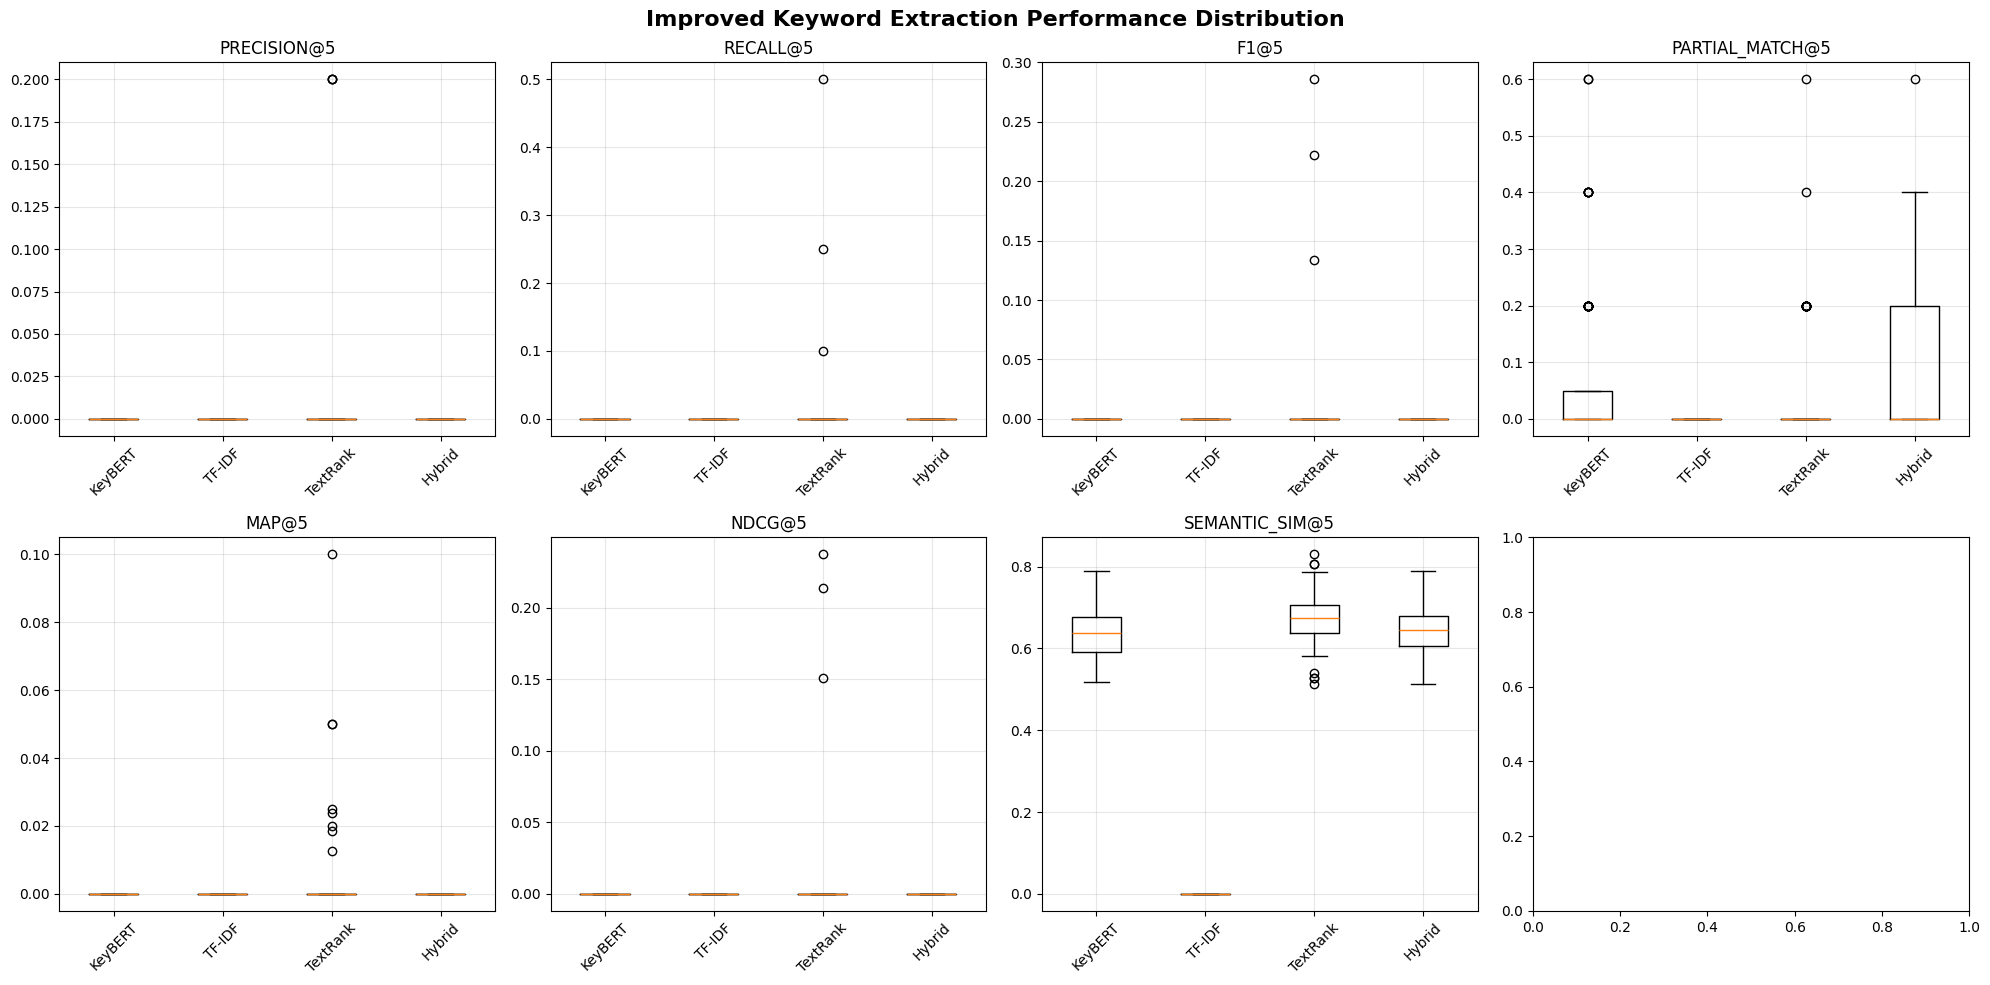

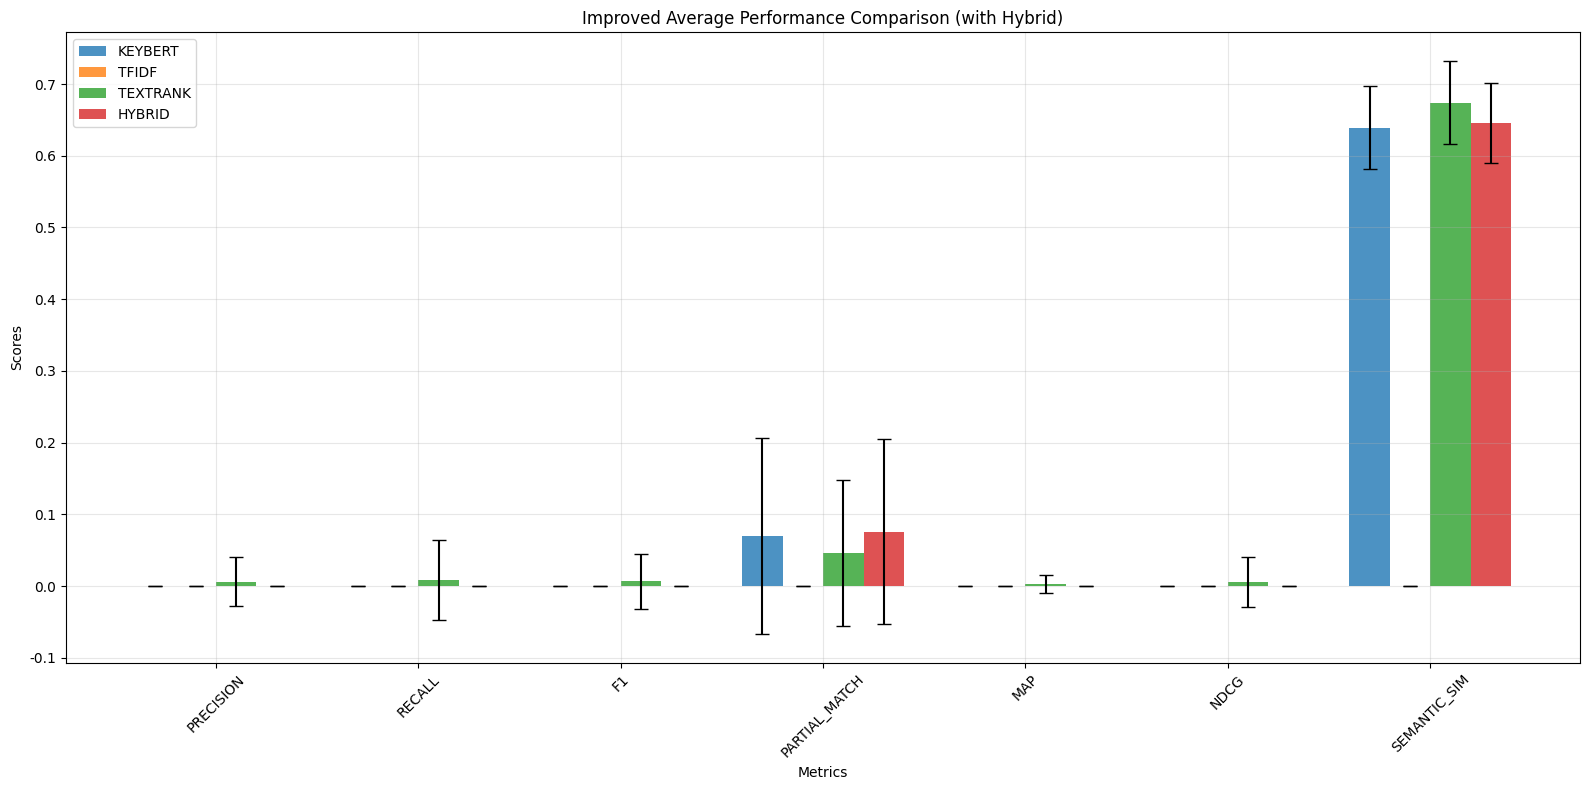

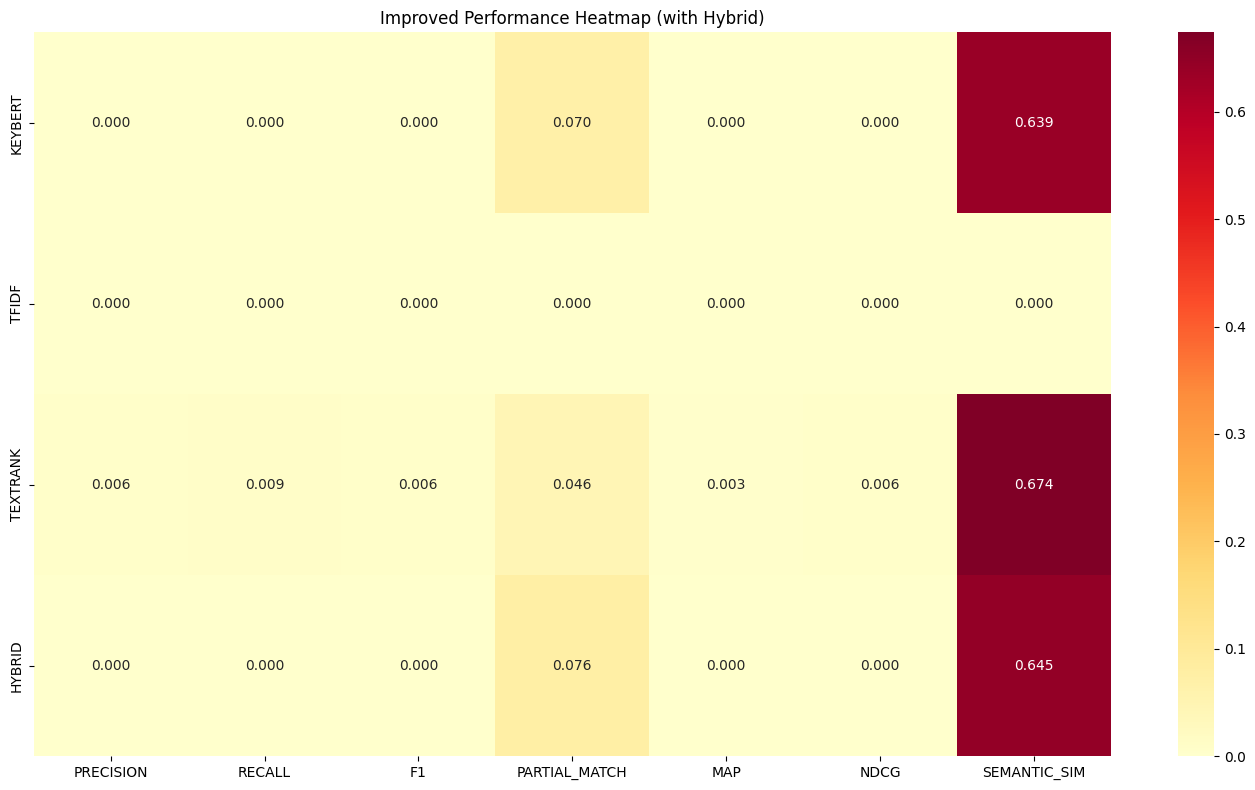

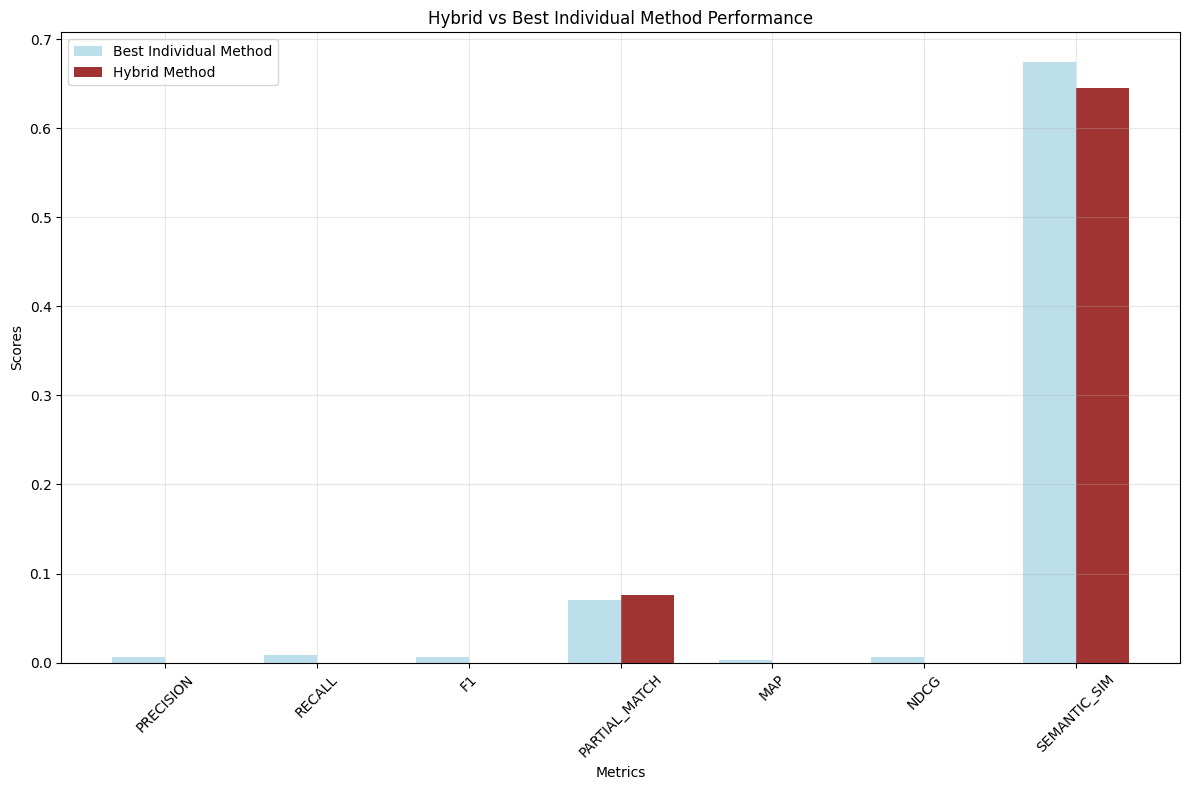

‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!

üíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...
‚ùå ÌèâÍ∞Ä Ï§ë Ïò§Î•ò Î∞úÏÉù: Object of type float32 is not JSON serializable


Traceback (most recent call last):
  File "<ipython-input-10-084fb89beb20>", line 1049, in run_improved_evaluation
    self.save_results()
  File "<ipython-input-10-084fb89beb20>", line 879, in save_results
    json.dump(summary_data, f, ensure_ascii=False, indent=2)
  File "/usr/lib/python3.11/json/__init__.py", line 179, in dump
    for chunk in iterable:
  File "/usr/lib/python3.11/json/encoder.py", line 432, in _iterencode
    yield from _iterencode_dict(o, _current_indent_level)
  File "/usr/lib/python3.11/json/encoder.py", line 406, in _iterencode_dict
    yield from chunks
  File "/usr/lib/python3.11/json/encoder.py", line 406, in _iterencode_dict
    yield from chunks
  File "/usr/lib/python3.11/json/encoder.py", line 406, in _iterencode_dict
    yield from chunks
  [Previous line repeated 1 more time]
  File "/usr/lib/python3.11/json/encoder.py", line 439, in _iterencode
    o = _default(o)
        ^^^^^^^^^^^
  File "/usr/lib/python3.11/json/encoder.py", line 180, in default


In [11]:
evaluator = ImprovedKeywordExtractorComparison(num_samples=100, random_seed=42)
evaluator.run_improved_evaluation()

# Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÍ≤Ω

In [25]:
# ÏòÅÏñ¥ Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏä§ÌÖú
# ecosystems/keywords Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
import random
import re
from collections import Counter
from tqdm import tqdm
import subprocess
import sys

warnings.filterwarnings('ignore')

def install_requirements():
    """ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò"""
    packages = [
        #'datasets',
        'keybert',
        'sentence-transformers',
        'networkx',
        'scikit-learn',
        'nltk',
        'scipy'
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"‚úì {package} ÏÑ§Ïπò ÏôÑÎ£å")
        except:
            print(f"‚úó {package} ÏÑ§Ïπò Ïã§Ìå®")

# Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
print("ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ï§ë...")
install_requirements()

ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Ï§ë...
‚úì keybert ÏÑ§Ïπò ÏôÑÎ£å
‚úì sentence-transformers ÏÑ§Ïπò ÏôÑÎ£å
‚úì networkx ÏÑ§Ïπò ÏôÑÎ£å
‚úì scikit-learn ÏÑ§Ïπò ÏôÑÎ£å
‚úì nltk ÏÑ§Ïπò ÏôÑÎ£å
‚úì scipy ÏÑ§Ïπò ÏôÑÎ£å


In [30]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
import networkx as nx
from scipy import stats

# NLTK Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

class TechKeywordExtractorComparison:
    """Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÌèâÍ∞Ä ÌÅ¥ÎûòÏä§"""

    def __init__(self, num_samples=100, random_seed=42):
        self.num_samples = num_samples
        self.random_seed = random_seed

        # ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
        random.seed(random_seed)
        np.random.seed(random_seed)

        # Í≤∞Í≥º Ï†ÄÏû•Ïö©
        self.results = {}
        self.predictions = {}
        self.references = []
        self.test_texts = []
        self.ecosystems = []

        # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥
        try:
            self.english_stopwords = set(stopwords.words('english'))
        except:
            self.english_stopwords = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])

        # Í∏∞Ïà† Ïö©Ïñ¥ ÌäπÌôî Î∂àÏö©Ïñ¥ Ï∂îÍ∞Ä
        tech_stopwords = {
            'library', 'package', 'module', 'framework', 'tool', 'utility', 'client',
            'server', 'api', 'sdk', 'cli', 'gui', 'app', 'application', 'software',
            'code', 'implementation', 'version', 'release', 'update', 'support',
            'simple', 'easy', 'fast', 'lightweight', 'powerful', 'flexible'
        }
        self.english_stopwords.update(tech_stopwords)

        print(f"üöÄ Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî (ÏãúÎìú: {random_seed})")

    def load_models(self):
        """Î™®Îì† Î™®Îç∏ Î°úÎìú"""
        print("\nüì• Î™®Îç∏ Î°úÎî© Ï§ë...")

        # KeyBERT (ÏòÅÏñ¥ ÌäπÌôî)
        print("  - KeyBERT Î°úÎî©...")
        try:
            # Í∏∞Ïà† Î¨∏ÏÑúÏóê ÌäπÌôîÎêú Î™®Îç∏ ÏÇ¨Ïö©
            self.keybert = KeyBERT('all-MiniLM-L6-v2')
            print("    ‚úì all-MiniLM-L6-v2 Î™®Îç∏ ÏÇ¨Ïö©")
        except:
            self.keybert = KeyBERT('sentence-transformers/all-MiniLM-L6-v2')
            print("    ‚úì Í∏∞Î≥∏ ÏòÅÏñ¥ Î™®Îç∏ ÏÇ¨Ïö©")

        # ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞Ïö©
        print("  - Sentence-BERT Î°úÎî©...")
        try:
            self.semantic_model = SentenceTransformer('all-MiniLM-L6-v2')
        except:
            self.semantic_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

        # TF-IDFÎäî ÎÇòÏ§ëÏóê ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
        self.tfidf_vectorizer = None

        print("‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!")

    def _english_tokenizer(self, text):
        """ÏòÅÏñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä (Í∏∞Ïà† Ïö©Ïñ¥ ÌäπÌôî)"""
        if not text:
            return []

        try:
            # ÏÜåÎ¨∏Ïûê Î≥ÄÌôò Î∞è ÌÜ†ÌÅ∞Ìôî
            tokens = word_tokenize(text.lower())

            # POS ÌÉúÍπÖÏúºÎ°ú Î™ÖÏÇ¨, ÌòïÏö©ÏÇ¨Îßå Ï∂îÏ∂ú
            pos_tags = pos_tag(tokens)

            keywords = []
            for word, pos in pos_tags:
                # Î™ÖÏÇ¨(NN*), ÌòïÏö©ÏÇ¨(JJ*), Í≥†Ïú†Î™ÖÏÇ¨(NNP*) Ï∂îÏ∂ú
                if (pos.startswith('NN') or pos.startswith('JJ')) and len(word) >= 2:
                    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞, ÏïåÌååÎ≤≥Îßå, Ïà´ÏûêÎ°úÎßå Íµ¨ÏÑ±Îêú Îã®Ïñ¥ Ï†úÏô∏
                    if (word not in self.english_stopwords and
                        word.isalpha() and
                        not word.isdigit()):
                        keywords.append(word)

            return keywords

        except Exception as e:
            # ÎåÄÏ≤¥ Î∞©Î≤ï: Ï†ïÍ∑úÏãù Í∏∞Î∞ò
            words = re.findall(r'\b[a-zA-Z]{2,}\b', text.lower())
            return [w for w in words if w not in self.english_stopwords and len(w) >= 2]

    def _preprocess_text(self, text):
        """ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨"""
        if not text:
            return ""

        # ÌäπÏàòÎ¨∏Ïûê Ï†ïÎ¶¨ (ÌïòÏù¥ÌîàÏùÄ Ïú†ÏßÄ - Í∏∞Ïà† Ïö©Ïñ¥Ïóê Ï§ëÏöî)
        text = re.sub(r'[^\w\s\-]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()

    def _parse_keywords(self, keyword_string):
        """ÌÇ§ÏõåÎìú Î¨∏ÏûêÏó¥ ÌååÏã±"""
        if not keyword_string:
            return []

        # | Íµ¨Î∂ÑÏûêÎ°ú Î∂ÑÎ¶¨
        keywords = [kw.strip().lower() for kw in keyword_string.split('|') if kw.strip()]

        # Ï§ëÎ≥µ Ï†úÍ±∞ Î∞è ÌïÑÌÑ∞ÎßÅ
        filtered_keywords = []
        seen = set()
        for kw in keywords:
            if kw and len(kw) >= 2 and kw not in seen:
                # ÎÑàÎ¨¥ Í∏¥ ÌÇ§ÏõåÎìú Ï†úÏô∏ (20Ïûê Ïù¥ÏÉÅ)
                if len(kw) <= 20:
                    filtered_keywords.append(kw)
                    seen.add(kw)

        return filtered_keywords

    def _post_process_keywords(self, keywords, top_k=10):
        """ÌÇ§ÏõåÎìú ÌõÑÏ≤òÎ¶¨"""
        if not keywords:
            return []

        # ÌäúÌîåÏóêÏÑú ÌÇ§ÏõåÎìúÎßå Ï∂îÏ∂ú
        processed = []
        for kw in keywords:
            if isinstance(kw, tuple):
                processed.append(str(kw[0]).lower())
            else:
                processed.append(str(kw).lower())

        # ÌïÑÌÑ∞ÎßÅ
        filtered = []
        for kw in processed:
            kw = kw.strip()
            if (2 <= len(kw) <= 20 and
                not kw.isdigit() and
                kw.isalpha() and
                kw not in self.english_stopwords):
                filtered.append(kw)

        # Ï§ëÎ≥µ Ï†úÍ±∞
        seen = set()
        unique_keywords = []
        for kw in filtered:
            if kw not in seen:
                seen.add(kw)
                unique_keywords.append(kw)

        return unique_keywords[:top_k]

    def load_tech_dataset(self):
        """Í∏∞Ïà† Î¨∏ÏÑú Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú"""
        print(f"\nüìä Í∏∞Ïà† Î¨∏ÏÑú Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...")

        try:
            # ecosystems/keywords Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
            dataset = load_dataset("ecosystems/keywords")
            train_data = dataset['train']
            print(f"ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: {len(train_data)}")

            # Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÌôïÏù∏ Î∞è ÌïÑÌÑ∞ÎßÅ
            processed_data = []
            ecosystems_count = Counter()

            print("Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÌôïÏù∏ Î∞è ÌïÑÌÑ∞ÎßÅ Ï§ë...")

            # Îçî ÎßéÏùÄ ÏÉòÌîåÏùÑ ÌôïÏù∏ÌïòÏó¨ ÌíàÏßà Ï¢ãÏùÄ Îç∞Ïù¥ÌÑ∞ ÏÑ†Î≥Ñ
            sample_size = min(self.num_samples * 10, len(train_data))
            indices = random.sample(range(len(train_data)), sample_size)

            for idx in tqdm(indices, desc="Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨"):
                try:
                    item = train_data[idx]

                    description = item.get('description', '')
                    keywords_str = item.get('keywords', '')
                    ecosystem = item.get('ecosystem', 'unknown')
                    name = item.get('name', '')

                    # ÌíàÏßà ÌôïÏù∏
                    if (len(description) >= 20 and  # ÏµúÏÜå Í∏∏Ïù¥
                        len(description) <= 1000 and  # ÏµúÎåÄ Í∏∏Ïù¥
                        keywords_str and  # ÌÇ§ÏõåÎìú Ï°¥Ïû¨
                        '|' in keywords_str):  # Ïò¨Î∞îÎ•∏ ÌòïÌÉú

                        # ÌÇ§ÏõåÎìú ÌååÏã±
                        parsed_keywords = self._parse_keywords(keywords_str)

                        # ÌÇ§ÏõåÎìúÍ∞Ä Ï∂©Î∂ÑÌïúÏßÄ ÌôïÏù∏
                        if len(parsed_keywords) >= 3:
                            processed_data.append({
                                'text': description,
                                'keywords': parsed_keywords,
                                'ecosystem': ecosystem,
                                'name': name,
                                'original_index': idx
                            })

                            ecosystems_count[ecosystem] += 1

                            # Î™©Ìëú ÏÉòÌîå ÏàòÏóê ÎèÑÎã¨ÌïòÎ©¥ Ï§ëÎã®
                            if len(processed_data) >= self.num_samples:
                                break

                except Exception as e:
                    continue

            # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÏÑ§Ï†ï
            self.test_data = processed_data[:self.num_samples]
            self.test_texts = [item['text'] for item in self.test_data]
            self.references = [item['keywords'] for item in self.test_data]
            self.ecosystems = [item['ecosystem'] for item in self.test_data]

            print(f"‚úÖ ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(self.test_data)}Í∞ú")
            print(f"ÏÉùÌÉúÍ≥Ñ Î∂ÑÌè¨: {dict(ecosystems_count.most_common(5))}")

            # ÏÉòÌîå Ï∂úÎ†•
            if self.test_data:
                print(f"\nüìù ÏÉòÌîå ÏòàÏãú:")
                sample = self.test_data[0]
                print(f"ÌÖçÏä§Ìä∏: {sample['text'][:100]}...")
                print(f"ÌÇ§ÏõåÎìú: {sample['keywords'][:5]}")
                print(f"ÏÉùÌÉúÍ≥Ñ: {sample['ecosystem']}")

        except Exception as e:
            print(f"‚ùå Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïò§Î•ò: {e}")
            self.test_data = []

    def prepare_english_tfidf(self):
        """ÏòÅÏñ¥ TF-IDF Ï§ÄÎπÑ"""
        print("\n‚öñÔ∏è ÏòÅÏñ¥ TF-IDF Ï§ÄÎπÑ Ï§ë...")

        try:
            # Í≥µÏ†ïÌïú ÎπÑÍµêÎ•º ÏúÑÌï¥ Î≥ÑÎèÑÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
            if len(self.test_data) > 50:
                # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÎ∂ÄÎ•º ÌïôÏäµÏö©ÏúºÎ°ú Î∂ÑÎ¶¨
                split_idx = len(self.test_data) // 4
                train_texts = [item['text'] for item in self.test_data[:split_idx]]
                print(f"  TF-IDF ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: {len(train_texts)}Í∞ú")
            else:
                # Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏúºÎ©¥ Ï†ÑÏ≤¥ ÏÇ¨Ïö©
                train_texts = self.test_texts
                print(f"  TF-IDF ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: {len(train_texts)}Í∞ú (Ï†ÑÏ≤¥)")

            # ÏòÅÏñ¥ Í∏∞Ïà† Î¨∏ÏÑú ÌäπÌôî TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä
            self.tfidf_vectorizer = TfidfVectorizer(
                tokenizer=self._english_tokenizer,
                ngram_range=(1, 2),  # 1-2 gram
                max_features=5000,
                min_df=1,  # ÏµúÏÜå Î¨∏ÏÑú ÎπàÎèÑ
                max_df=0.8,  # ÏµúÎåÄ Î¨∏ÏÑú ÎπàÎèÑ
                lowercase=True,
                sublinear_tf=True,  # Î°úÍ∑∏ Ïä§ÏºÄÏùºÎßÅ
                stop_words=None  # Ïª§Ïä§ÌÖÄ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏóêÏÑú Ï≤òÎ¶¨
            )

            # ÏòÅÏñ¥ Í∏∞Ïà† Î¨∏ÏÑúÎ°ú ÌïôÏäµ
            self.tfidf_vectorizer.fit(train_texts)
            print("‚úÖ ÏòÅÏñ¥ TF-IDF ÌïôÏäµ ÏôÑÎ£å!")

        except Exception as e:
            print(f"‚ö†Ô∏è TF-IDF Ï§ÄÎπÑ Ïò§Î•ò: {e}")
            # ÏµúÏÜåÌïúÏùò Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä
            self.tfidf_vectorizer = TfidfVectorizer(
                ngram_range=(1, 1),
                max_features=1000,
                min_df=1,
                stop_words='english'
            )
            basic_texts = ["technical documentation keyword extraction"] * 5
            self.tfidf_vectorizer.fit(basic_texts)
            print("‚úÖ Í∏∞Î≥∏ TF-IDF ÌïôÏäµ ÏôÑÎ£å!")

    def extract_keybert_keywords(self, text, top_k=10):
        """KeyBERT ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (Í∏∞Ïà† Î¨∏ÏÑú ÏµúÏ†ÅÌôî)"""
        try:
            if not text.strip():
                return []

            # Í∏∞Ïà† Î¨∏ÏÑúÏóê ÏµúÏ†ÅÌôîÎêú ÌååÎùºÎØ∏ÌÑ∞
            keywords = self.keybert.extract_keywords(
                text,
                keyphrase_ngram_range=(1, 2),  # 1-2 gram
                stop_words='english',
                top_n=top_k * 3,  # Îçî ÎßéÏù¥ Ï∂îÏ∂ú ÌõÑ ÌïÑÌÑ∞ÎßÅ
                use_mmr=True,  # Îã§ÏñëÏÑ± ÌôïÎ≥¥
                diversity=0.6,  # Ï†ÅÎãπÌïú Îã§ÏñëÏÑ±
                use_maxsum=True,  # ÏµúÎåÄÌï© ÏïåÍ≥†Î¶¨Ï¶ò ÏÇ¨Ïö©
                nr_candidates=30  # ÌõÑÎ≥¥ ÌÇ§ÏõåÎìú Ïàò
            )

            keyword_list = [kw[0] for kw in keywords]
            return self._post_process_keywords(keyword_list, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è KeyBERT Ïò§Î•ò: {e}")
            # ÎåÄÏ≤¥ Î∞©Î≤ï
            tokens = self._english_tokenizer(text)
            token_counts = Counter(tokens)
            fallback_keywords = [word for word, count in token_counts.most_common(top_k * 2)]
            return self._post_process_keywords(fallback_keywords, top_k)

    def extract_tfidf_keywords(self, text, top_k=10):
        """TF-IDF ÌÇ§ÏõåÎìú Ï∂îÏ∂ú"""
        try:
            if not text.strip() or self.tfidf_vectorizer is None:
                return []

            tfidf_vector = self.tfidf_vectorizer.transform([text])
            feature_names = self.tfidf_vectorizer.get_feature_names_out()
            scores = tfidf_vector.toarray()[0]

            # ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            top_indices = scores.argsort()[-(top_k * 3):][::-1]
            keywords = [feature_names[i] for i in top_indices if scores[i] > 0]

            return self._post_process_keywords(keywords, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è TF-IDF Ïò§Î•ò: {e}")
            tokens = self._english_tokenizer(text)
            token_counts = Counter(tokens)
            fallback_keywords = [word for word, count in token_counts.most_common(top_k * 2)]
            return self._post_process_keywords(fallback_keywords, top_k)

    def extract_textrank_keywords(self, text, top_k=10):
        """TextRank ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (Í∏∞Ïà† Î¨∏ÏÑú ÏµúÏ†ÅÌôî)"""
        try:
            if not text.strip():
                return []

            tokens = self._english_tokenizer(text)

            if len(tokens) < 3:
                token_counts = Counter(tokens)
                fallback_keywords = [word for word, count in token_counts.most_common(top_k * 2)]
                return self._post_process_keywords(fallback_keywords, top_k)

            # Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
            graph = nx.Graph()

            # Í∏∞Ïà† Î¨∏ÏÑúÏóê Ï†ÅÌï©Ìïú ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞
            window_size = min(6, max(3, len(tokens) // 6))

            for i in range(len(tokens) - window_size + 1):
                window = tokens[i:i + window_size]
                for j in range(len(window)):
                    for k in range(j + 1, len(window)):
                        if window[j] != window[k]:
                            # Í±∞Î¶¨ Í∏∞Î∞ò Í∞ÄÏ§ëÏπò
                            distance_weight = 1.0 / (abs(j - k) + 1)

                            if graph.has_edge(window[j], window[k]):
                                graph[window[j]][window[k]]['weight'] += distance_weight
                            else:
                                graph.add_edge(window[j], window[k], weight=distance_weight)

            if len(graph.nodes()) == 0:
                token_counts = Counter(tokens)
                fallback_keywords = [word for word, count in token_counts.most_common(top_k * 2)]
                return self._post_process_keywords(fallback_keywords, top_k)

            # PageRank Ïã§Ìñâ
            pagerank_scores = nx.pagerank(graph, weight='weight', alpha=0.85, max_iter=100)
            sorted_keywords = sorted(pagerank_scores.items(),
                                   key=lambda x: x[1], reverse=True)

            keywords = [kw[0] for kw in sorted_keywords]
            return self._post_process_keywords(keywords, top_k)

        except Exception as e:
            print(f"‚ö†Ô∏è TextRank Ïò§Î•ò: {e}")
            try:
                tokens = self._english_tokenizer(text)
                token_counts = Counter(tokens)
                fallback_keywords = [word for word, count in token_counts.most_common(top_k * 2)]
                return self._post_process_keywords(fallback_keywords, top_k)
            except:
                return []

    def extract_hybrid_keywords(self, text, top_k=10):
        """ÌïòÏù¥Î∏åÎ¶¨Îìú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (Í∏∞Ïà† Î¨∏ÏÑú ÌäπÌôî)"""
        try:
            if not text.strip():
                return []

            # Í∞Å Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            keybert_keywords = self.extract_keybert_keywords(text, top_k * 2)
            tfidf_keywords = self.extract_tfidf_keywords(text, top_k * 2)
            textrank_keywords = self.extract_textrank_keywords(text, top_k * 2)

            # ÌÇ§ÏõåÎìú Ï†êÏàò Í≥ÑÏÇ∞
            keyword_scores = {}

            # KeyBERT Ï†êÏàò (ÏùòÎØ∏Ï†Å Ï§ëÏöîÎèÑ) - Í∞ÄÏ§ëÏπò ÎÜíÏùå
            for i, kw in enumerate(keybert_keywords):
                score = (len(keybert_keywords) - i) / len(keybert_keywords) if keybert_keywords else 0
                keyword_scores[kw] = keyword_scores.get(kw, 0) + score * 0.5

            # TF-IDF Ï†êÏàò (ÌÜµÍ≥ÑÏ†Å Ï§ëÏöîÎèÑ)
            for i, kw in enumerate(tfidf_keywords):
                score = (len(tfidf_keywords) - i) / len(tfidf_keywords) if tfidf_keywords else 0
                keyword_scores[kw] = keyword_scores.get(kw, 0) + score * 0.3

            # TextRank Ï†êÏàò (Íµ¨Ï°∞Ï†Å Ï§ëÏöîÎèÑ)
            for i, kw in enumerate(textrank_keywords):
                score = (len(textrank_keywords) - i) / len(textrank_keywords) if textrank_keywords else 0
                keyword_scores[kw] = keyword_scores.get(kw, 0) + score * 0.2

            # Í≥µÌÜµ ÌÇ§ÏõåÎìú Î≥¥ÎÑàÏä§
            all_keywords = set(keybert_keywords + tfidf_keywords + textrank_keywords)
            for kw in all_keywords:
                methods_count = sum([
                    kw in keybert_keywords,
                    kw in tfidf_keywords,
                    kw in textrank_keywords
                ])
                if methods_count >= 2:
                    keyword_scores[kw] = keyword_scores.get(kw, 0) + 0.3 * (methods_count - 1)

            # Ï†êÏàò Í∏∞Î∞ò Ï†ïÎ†¨
            if keyword_scores:
                sorted_keywords = sorted(keyword_scores.items(),
                                       key=lambda x: x[1], reverse=True)
                hybrid_keywords = [kw[0] for kw in sorted_keywords]
                return self._post_process_keywords(hybrid_keywords, top_k)
            else:
                return []

        except Exception as e:
            print(f"‚ö†Ô∏è Hybrid Ïò§Î•ò: {e}")
            return self.extract_keybert_keywords(text, top_k)

    def extract_all_keywords(self):
        """Î™®Îì† Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú"""
        print(f"\nüîÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏãúÏûë ({len(self.test_data)}Í∞ú ÏÉòÌîå)...")

        keybert_predictions = []
        tfidf_predictions = []
        textrank_predictions = []
        hybrid_predictions = []

        for i, item in enumerate(tqdm(self.test_data, desc="ÌÇ§ÏõåÎìú Ï∂îÏ∂ú")):
            text = item['text']

            # ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
            clean_text = self._preprocess_text(text)

            # Í∞Å Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            keybert_kw = self.extract_keybert_keywords(clean_text, top_k=10)
            tfidf_kw = self.extract_tfidf_keywords(clean_text, top_k=10)
            textrank_kw = self.extract_textrank_keywords(clean_text, top_k=10)
            hybrid_kw = self.extract_hybrid_keywords(clean_text, top_k=10)

            keybert_predictions.append(keybert_kw)
            tfidf_predictions.append(tfidf_kw)
            textrank_predictions.append(textrank_kw)
            hybrid_predictions.append(hybrid_kw)

            # ÏßÑÌñâÏÉÅÌô© Ï∂úÎ†• (10Í∞úÎßàÎã§)
            if (i + 1) % 20 == 0:
                print(f"\n--- ÏÉòÌîå {i+1} ---")
                print(f"ÌÖçÏä§Ìä∏: {text[:80]}...")
                print(f"Ï∞∏Ï°∞: {item['keywords'][:3]}")
                print(f"KeyBERT: {keybert_kw[:3]}")
                print(f"TF-IDF: {tfidf_kw[:3]}")
                print(f"TextRank: {textrank_kw[:3]}")
                print(f"Hybrid: {hybrid_kw[:3]}")

        # Í≤∞Í≥º Ï†ÄÏû•
        self.predictions = {
            'keybert': keybert_predictions,
            'tfidf': tfidf_predictions,
            'textrank': textrank_predictions,
            'hybrid': hybrid_predictions
        }

        print("‚úÖ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏôÑÎ£å!")

    def calculate_precision_recall_f1(self, predicted, true, k=5):
        """Precision@K, Recall@K, F1@K Í≥ÑÏÇ∞"""
        pred_k = set([kw.lower().strip() for kw in predicted[:k] if kw])
        true_set = set([kw.lower().strip() for kw in true if kw])

        if len(true_set) == 0 or len(pred_k) == 0:
            return {"precision": 0, "recall": 0, "f1": 0}

        intersection = pred_k.intersection(true_set)

        precision = len(intersection) / len(pred_k) if len(pred_k) > 0 else 0
        recall = len(intersection) / len(true_set)
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        return {"precision": precision, "recall": recall, "f1": f1}

    def calculate_partial_match_score(self, predicted, true, k=5):
        """Î∂ÄÎ∂Ñ Îß§Ïπ≠ Ï†êÏàò Í≥ÑÏÇ∞ (Í∏∞Ïà† Ïö©Ïñ¥ ÌäπÌôî)"""
        pred_k = [kw.lower().strip() for kw in predicted[:k] if kw]
        true_list = [kw.lower().strip() for kw in true if kw]

        if len(true_list) == 0 or len(pred_k) == 0:
            return 0

        matches = 0
        for pred in pred_k:
            for true_kw in true_list:
                if (pred == true_kw or
                    pred in true_kw or
                    true_kw in pred or
                    self._tech_fuzzy_match(pred, true_kw)):
                    matches += 1
                    break

        return matches / len(pred_k) if len(pred_k) > 0 else 0

    def _tech_fuzzy_match(self, str1, str2, threshold=0.8):
        """Í∏∞Ïà† Ïö©Ïñ¥ ÌäπÌôî Ïú†ÏÇ¨ Îß§Ïπ≠"""
        if len(str1) < 2 or len(str2) < 2:
            return False

        # ÌïòÏù¥Ìîà Ï†úÍ±∞ ÌõÑ ÎπÑÍµê (Ïòà: "machine-learning" vs "machinelearning")
        clean1 = str1.replace('-', '').replace('_', '')
        clean2 = str2.replace('-', '').replace('_', '')

        if clean1 == clean2:
            return True

        # Î¨∏Ïûê ÏßëÌï© Ïú†ÏÇ¨ÎèÑ
        set1 = set(clean1)
        set2 = set(clean2)
        intersection = len(set1 & set2)
        union = len(set1 | set2)

        return (intersection / union) > threshold if union > 0 else False

    def calculate_semantic_similarity(self, predicted, true, k=5):
        """ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞"""
        pred_k = [kw for kw in predicted[:k] if kw.strip()]
        true_list = [kw for kw in true if kw.strip()]

        if len(true_list) == 0 or len(pred_k) == 0:
            return 0

        try:
            pred_embeddings = self.semantic_model.encode(pred_k)
            true_embeddings = self.semantic_model.encode(true_list)

            similarities = cosine_similarity(pred_embeddings, true_embeddings)
            max_similarities = np.max(similarities, axis=1)

            # ÏûÑÍ≥ÑÍ∞í Ïù¥ÏÉÅÏùò Ïú†ÏÇ¨ÎèÑÎßå Ïù∏Ï†ï
            threshold = 0.6
            valid_similarities = max_similarities[max_similarities > threshold]

            return np.mean(valid_similarities) if len(valid_similarities) > 0 else 0

        except Exception as e:
            print(f"‚ö†Ô∏è ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ Ïò§Î•ò: {e}")
            return 0

    def calculate_ndcg_score(self, predicted, true, k=5):
        """NDCG@K Ï†êÏàò Í≥ÑÏÇ∞"""
        pred_k = [kw.lower().strip() for kw in predicted[:k] if kw]
        true_set = set([kw.lower().strip() for kw in true if kw])

        if len(true_set) == 0 or len(pred_k) == 0:
            return 0

        # Í¥ÄÎ†®ÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ (Ï†ïÌôïÌûà ÏùºÏπòÌïòÎ©¥ 1, Î∂ÄÎ∂Ñ ÏùºÏπòÌïòÎ©¥ 0.5)
        relevance_scores = []
        for pred in pred_k:
            if pred in true_set:
                relevance_scores.append(1.0)
            elif any(pred in true_kw or true_kw in pred for true_kw in true_set):
                relevance_scores.append(0.5)
            else:
                relevance_scores.append(0.0)

        # DCG Í≥ÑÏÇ∞
        dcg = relevance_scores[0] if relevance_scores else 0
        for i in range(1, len(relevance_scores)):
            dcg += relevance_scores[i] / np.log2(i + 1)

        # IDCG Í≥ÑÏÇ∞ (Ïù¥ÏÉÅÏ†ÅÏù∏ ÏàúÏÑú)
        ideal_scores = sorted([1.0] * min(len(true_set), k), reverse=True)
        idcg = ideal_scores[0] if ideal_scores else 0
        for i in range(1, len(ideal_scores)):
            idcg += ideal_scores[i] / np.log2(i + 1)

        return dcg / idcg if idcg > 0 else 0

    def calculate_all_metrics(self):
        """Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞"""
        print("\nüìä ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'semantic_sim', 'ndcg']

        self.results = {}

        for method in methods:
            print(f"  - {method.upper()} ÌèâÍ∞Ä Ï§ë...")

            self.results[method] = {metric: [] for metric in metrics}
            predictions = self.predictions[method]

            for pred, true in zip(predictions, self.references):
                # Í∏∞Î≥∏ ÏßÄÌëú (K=5)
                basic_metrics = self.calculate_precision_recall_f1(pred, true, k=5)
                self.results[method]['precision'].append(basic_metrics['precision'])
                self.results[method]['recall'].append(basic_metrics['recall'])
                self.results[method]['f1'].append(basic_metrics['f1'])

                # Î∂ÄÎ∂Ñ Îß§Ïπ≠
                partial_score = self.calculate_partial_match_score(pred, true, k=5)
                self.results[method]['partial_match'].append(partial_score)

                # ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑ
                sem_sim = self.calculate_semantic_similarity(pred, true, k=5)
                self.results[method]['semantic_sim'].append(sem_sim)

                # NDCG
                ndcg_score = self.calculate_ndcg_score(pred, true, k=5)
                self.results[method]['ndcg'].append(ndcg_score)

        print("‚úÖ Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å!")

    def statistical_analysis(self):
        """ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï"""
        print("\nüìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'semantic_sim', 'ndcg']

        self.stat_results = {}

        # Î™®Îì† Î∞©Î≤ï ÏåçÏóê ÎåÄÌï¥ Í≤ÄÏ†ï
        for metric in metrics:
            self.stat_results[metric] = {}

            for i, method1 in enumerate(methods):
                for j, method2 in enumerate(methods):
                    if i < j:  # Ï§ëÎ≥µ Î∞©ÏßÄ
                        scores1 = self.results[method1][metric]
                        scores2 = self.results[method2][metric]

                        # Paired t-test
                        t_stat, t_pvalue = stats.ttest_rel(scores1, scores2)

                        # Wilcoxon signed-rank test
                        try:
                            w_stat, w_pvalue = stats.wilcoxon(scores1, scores2)
                        except:
                            w_stat, w_pvalue = 0, 1.0

                        # Ìö®Í≥º ÌÅ¨Í∏∞ (Cohen's d)
                        pooled_std = np.sqrt((np.var(scores1) + np.var(scores2)) / 2)
                        cohens_d = (np.mean(scores1) - np.mean(scores2)) / pooled_std if pooled_std > 0 else 0

                        comparison_key = f"{method1}_vs_{method2}"
                        self.stat_results[metric][comparison_key] = {
                            't_statistic': t_stat,
                            't_pvalue': t_pvalue,
                            'wilcoxon_statistic': w_stat,
                            'wilcoxon_pvalue': w_pvalue,
                            'cohens_d': cohens_d,
                            'mean_diff': np.mean(scores1) - np.mean(scores2)
                        }

        print("‚úÖ ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù ÏôÑÎ£å!")

    def create_visualizations(self):
        """Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)"""
        print("\nüé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")

        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'semantic_sim', 'ndcg']

        # 1. Î∞ïÏä§ÌîåÎ°Ø - Î∂ÑÌè¨ ÎπÑÍµê (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Technical Document Keyword Extraction Performance Distribution',
                    fontsize=16, fontweight='bold')

        colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

        for i, metric in enumerate(metrics):
            row = i // 3
            col = i % 3

            data_to_plot = [self.results[method][metric] for method in methods]

            # Î∞ïÏä§ÌîåÎ°Ø ÏÉùÏÑ± (ÏÉâÏÉÅ ÏÑ§Ï†ï Ï†úÍ±∞)
            bp = axes[row, col].boxplot(data_to_plot, labels=['KeyBERT', 'TF-IDF', 'TextRank', 'Hybrid'],
                                      patch_artist=True)  # patch_artist=True Ï∂îÍ∞Ä
            axes[row, col].set_title(f'{metric.upper()}@5')
            axes[row, col].grid(True, alpha=0.3)
            axes[row, col].tick_params(axis='x', rotation=45)

            # ÏïàÏ†ÑÌïú ÏÉâÏÉÅ ÏÑ§Ï†ï
            try:
                for patch, color in zip(bp['boxes'], colors):
                    if hasattr(patch, 'set_facecolor'):
                        patch.set_facecolor(color)
            except Exception as e:
                print(f"‚ö†Ô∏è Î∞ïÏä§ÌîåÎ°Ø ÏÉâÏÉÅ ÏÑ§Ï†ï Í±¥ÎÑàÎúÄ: {e}")

        plt.tight_layout()
        plt.savefig('tech_keyword_extraction_boxplot.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 2. ÌèâÍ∑† ÏÑ±Îä• ÎπÑÍµê Î∞î Ï∞®Ìä∏ (Í∏∞Ï°¥Í≥º ÎèôÏùº)
        fig, ax = plt.subplots(figsize=(15, 8))

        x = np.arange(len(metrics))
        width = 0.2
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

        for i, method in enumerate(methods):
            means = [np.mean(self.results[method][metric]) for metric in metrics]
            stds = [np.std(self.results[method][metric]) for metric in metrics]

            bars = ax.bar(x + i*width, means, width, yerr=stds,
                        label=method.upper(), alpha=0.8, capsize=5, color=colors[i])

            # Í∞í ÌëúÏãú
            for j, (mean, std) in enumerate(zip(means, stds)):
                ax.text(x[j] + i*width, mean + std + 0.01, f'{mean:.3f}',
                      ha='center', va='bottom', fontsize=8)

        ax.set_xlabel('Metrics')
        ax.set_ylabel('Scores')
        ax.set_title('Technical Document Keyword Extraction Performance Comparison')
        ax.set_xticks(x + width * 1.5)
        ax.set_xticklabels([m.upper().replace('_', ' ') for m in metrics])
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, max([max([np.mean(self.results[m][metric]) + np.std(self.results[m][metric])
                                for m in methods]) for metric in metrics]) * 1.1)

        plt.tight_layout()
        plt.savefig('tech_keyword_extraction_barplot.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 3. ÌûàÌä∏Îßµ - ÏÑ±Îä• Îß§Ìä∏Î¶≠Ïä§ (Í∏∞Ï°¥Í≥º ÎèôÏùº)
        heatmap_data = []
        for method in methods:
            row = [np.mean(self.results[method][metric]) for metric in metrics]
            heatmap_data.append(row)

        fig, ax = plt.subplots(figsize=(12, 8))
        im = sns.heatmap(heatmap_data,
                        xticklabels=[m.upper().replace('_', ' ') for m in metrics],
                        yticklabels=[m.upper() for m in methods],
                        annot=True, fmt='.3f', cmap='YlOrRd',
                        ax=ax, cbar_kws={'label': 'Score'})
        ax.set_title('Technical Document Keyword Extraction Performance Heatmap')
        plt.tight_layout()
        plt.savefig('tech_keyword_extraction_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 4. ÏÉùÌÉúÍ≥ÑÎ≥Ñ ÏÑ±Îä• Î∂ÑÏÑù (Í∏∞Ï°¥Í≥º ÎèôÏùº)
        if len(set(self.ecosystems)) > 1:
            ecosystem_performance = {}
            unique_ecosystems = list(set(self.ecosystems))[:5]  # ÏÉÅÏúÑ 5Í∞úÎßå

            for ecosystem in unique_ecosystems:
                ecosystem_indices = [i for i, eco in enumerate(self.ecosystems) if eco == ecosystem]
                if len(ecosystem_indices) >= 5:  # Ï∂©Î∂ÑÌïú ÏÉòÌîåÏù¥ ÏûàÎäî Í≤ΩÏö∞Îßå
                    ecosystem_performance[ecosystem] = {}
                    for method in methods:
                        f1_scores = [self.results[method]['f1'][i] for i in ecosystem_indices]
                        ecosystem_performance[ecosystem][method] = np.mean(f1_scores)

            if ecosystem_performance:
                fig, ax = plt.subplots(figsize=(12, 6))

                ecosystems = list(ecosystem_performance.keys())
                x = np.arange(len(ecosystems))
                width = 0.2

                for i, method in enumerate(methods):
                    means = [ecosystem_performance[eco][method] for eco in ecosystems]
                    ax.bar(x + i*width, means, width, label=method.upper(),
                          alpha=0.8, color=colors[i])

                ax.set_xlabel('Ecosystem')
                ax.set_ylabel('F1@5 Score')
                ax.set_title('Keyword Extraction Performance by Ecosystem')
                ax.set_xticks(x + width * 1.5)
                ax.set_xticklabels(ecosystems, rotation=45)
                ax.legend()
                ax.grid(True, alpha=0.3)

                plt.tight_layout()
                plt.savefig('tech_keyword_extraction_ecosystem.png', dpi=300, bbox_inches='tight')
                plt.show()

        print("‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!")

    def save_results(self):
        """Í≤∞Í≥º Ï†ÄÏû•"""
        print("\nüíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...")

        # ÏÉÅÏÑ∏ Í≤∞Í≥º CSV
        detailed_results = []
        for i in range(len(self.references)):
            row = {
                'sample_id': i,
                'text': self.test_texts[i][:200] + "..." if len(self.test_texts[i]) > 200 else self.test_texts[i],
                'ecosystem': self.ecosystems[i],
                'true_keywords': '; '.join(self.references[i][:10])
            }

            for method in ['keybert', 'tfidf', 'textrank', 'hybrid']:
                row[f'{method}_keywords'] = '; '.join(self.predictions[method][i][:5])

                for metric in ['precision', 'recall', 'f1', 'partial_match', 'semantic_sim', 'ndcg']:
                    row[f'{method}_{metric}'] = self.results[method][metric][i]

            detailed_results.append(row)

        df = pd.DataFrame(detailed_results)
        df.to_csv('tech_keyword_extraction_results.csv', index=False, encoding='utf-8-sig')

        # ÏöîÏïΩ Í≤∞Í≥º JSON
        summary_data = {
            'experiment_info': {
                'num_samples': self.num_samples,
                'random_seed': self.random_seed,
                'evaluation_date': datetime.now().isoformat(),
                'dataset': 'ecosystems/keywords',
                'language': 'English',
                'domain': 'Technical Documentation',
                'methods': ['KeyBERT', 'TF-IDF', 'TextRank', 'Hybrid']
            },
            'performance_summary': {},
            'statistical_results': self.stat_results,
            'ecosystem_distribution': dict(Counter(self.ecosystems).most_common(10)),
            'sample_predictions': {
                'keybert': self.predictions['keybert'][:3],
                'tfidf': self.predictions['tfidf'][:3],
                'textrank': self.predictions['textrank'][:3],
                'hybrid': self.predictions['hybrid'][:3],
                'references': self.references[:3],
                'texts': self.test_texts[:3]
            }
        }

        # ÏÑ±Îä• ÏöîÏïΩ Í≥ÑÏÇ∞
        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'semantic_sim', 'ndcg']

        for method in methods:
            summary_data['performance_summary'][method] = {}
            for metric in metrics:
                scores = self.results[method][metric]
                summary_data['performance_summary'][method][metric] = {
                    'mean': float(np.mean(scores)),
                    'std': float(np.std(scores)),
                    'median': float(np.median(scores)),
                    'min': float(np.min(scores)),
                    'max': float(np.max(scores))
                }

        with open('tech_keyword_extraction_summary.json', 'w', encoding='utf-8') as f:
            json.dump(summary_data, f, ensure_ascii=False, indent=2)

        print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!")
        print("  - tech_keyword_extraction_results.csv: ÏÉÅÏÑ∏ Í≤∞Í≥º")
        print("  - tech_keyword_extraction_summary.json: ÌÜµÍ≥Ñ ÏöîÏïΩ")

    def generate_report(self):
        """Ï¢ÖÌï© Î≥¥Í≥†ÏÑú ÏÉùÏÑ±"""
        print("\nüìã Ï¢ÖÌï© Î≥¥Í≥†ÏÑú ÏÉùÏÑ± Ï§ë...")

        methods = ['keybert', 'tfidf', 'textrank', 'hybrid']
        metrics = ['precision', 'recall', 'f1', 'partial_match', 'semantic_sim', 'ndcg']

        report = []
        report.append("=" * 80)
        report.append("Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä Î≥¥Í≥†ÏÑú")
        report.append("Îç∞Ïù¥ÌÑ∞ÏÖã: ecosystems/keywords")
        report.append("=" * 80)
        report.append(f"ÌèâÍ∞Ä ÏùºÏãú: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"ÌèâÍ∞Ä ÏÉòÌîå Ïàò: {self.num_samples}")
        report.append(f"Ïñ∏Ïñ¥: ÏòÅÏñ¥")
        report.append(f"ÎèÑÎ©îÏù∏: Í∏∞Ïà† Î¨∏ÏÑú")
        report.append(f"ÏÉùÌÉúÍ≥Ñ Î∂ÑÌè¨: {dict(Counter(self.ecosystems).most_common(5))}")
        report.append("")

        # ÏÑ±Îä• ÏöîÏïΩ
        report.append("üìä ÏÑ±Îä• ÏöîÏïΩ (ÌèâÍ∑† ¬± ÌëúÏ§ÄÌé∏Ï∞®)")
        report.append("-" * 60)

        for metric in metrics:
            report.append(f"\n{metric.upper().replace('_', ' ')}@5:")
            for method in methods:
                mean_score = np.mean(self.results[method][metric])
                std_score = np.std(self.results[method][metric])
                report.append(f"  {method.upper():>10}: {mean_score:.4f} ¬± {std_score:.4f}")

        report.append("")

        # ÏµúÍ≥† ÏÑ±Îä• Î∞©Î≤ï
        report.append("üèÜ ÏµúÍ≥† ÏÑ±Îä• Î∞©Î≤ï")
        report.append("-" * 40)

        wins = {method: 0 for method in methods}
        for metric in metrics:
            best_method = max(methods, key=lambda m: np.mean(self.results[m][metric]))
            best_score = np.mean(self.results[best_method][metric])
            report.append(f"{metric.upper().replace('_', ' '):>15}: {best_method.upper()} ({best_score:.4f})")
            wins[best_method] += 1

        report.append("")

        # Ï†ÑÏ≤¥ ÏäπÏàò Î∞è Í≤∞Î°†
        best_overall = max(wins, key=wins.get)
        report.append("üéØ Ï¢ÖÌï© Í≤∞Î°†")
        report.append("-" * 40)
        report.append(f"‚Ä¢ Ï†ÑÎ∞òÏ†Å ÏµúÍ≥† ÏÑ±Îä•: {best_overall.upper()} ({wins[best_overall]}/{len(metrics)} ÏßÄÌëúÏóêÏÑú 1ÏúÑ)")

        # ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± ÏöîÏïΩ
        significant_comparisons = []
        for metric in metrics:
            for comparison, stats_data in self.stat_results[metric].items():
                if stats_data['t_pvalue'] < 0.05:
                    method1, method2 = comparison.split('_vs_')
                    significant_comparisons.append(f"{method1.upper()} vs {method2.upper()} in {metric.upper()}")

        if significant_comparisons:
            report.append(f"‚Ä¢ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥: {len(significant_comparisons)}Í∞ú ÎπÑÍµê")
        else:
            report.append("‚Ä¢ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ ÏóÜÏùå")

        # Ïã§Ïö©Ï†Å Í∂åÏû•ÏÇ¨Ìï≠
        report.append("")
        report.append("üí° Ïã§Ïö©Ï†Å Í∂åÏû•ÏÇ¨Ìï≠")
        report.append("-" * 40)

        # F1 Ï†êÏàò Í∏∞Ï§ÄÏúºÎ°ú Í∂åÏû•ÏÇ¨Ìï≠ ÏÉùÏÑ±
        f1_means = {method: np.mean(self.results[method]['f1']) for method in methods}
        semantic_means = {method: np.mean(self.results[method]['semantic_sim']) for method in methods}

        best_f1 = max(f1_means, key=f1_means.get)
        best_semantic = max(semantic_means, key=semantic_means.get)

        report.append(f"‚Ä¢ Ï†ÑÎ∞òÏ†Å ÏÑ±Îä•: {best_f1.upper()} Ï∂îÏ≤ú (F1@5: {f1_means[best_f1]:.3f})")
        report.append(f"‚Ä¢ ÏùòÎØ∏Ï†Å Ï†ïÌôïÏÑ±: {best_semantic.upper()} Ï∂îÏ≤ú (Semantic Sim: {semantic_means[best_semantic]:.3f})")
        report.append("‚Ä¢ Í∏∞Ïà† Î¨∏ÏÑúÏóêÏÑúÎäî ÏùòÎØ∏Ï†Å Ïú†ÏÇ¨ÎèÑÍ∞Ä Ï§ëÏöîÌïú ÌèâÍ∞Ä Í∏∞Ï§Ä")
        report.append("‚Ä¢ ÎèÑÎ©îÏù∏Î≥Ñ ÌäπÏÑ±ÏùÑ Í≥†Î†§Ìïú ÌõÑÏ≤òÎ¶¨ ÌïÑÏöî")
        report.append("‚Ä¢ ÌïòÏù¥Î∏åÎ¶¨Îìú Î∞©Î≤ïÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ±Îä• ÌôïÎ≥¥ Í∞ÄÎä•")

        # ÌïúÍ≥ÑÏ†ê Î∞è Í∞úÏÑ† Î∞©Ìñ•
        report.append("")
        report.append("‚ö†Ô∏è ÌïúÍ≥ÑÏ†ê Î∞è Í∞úÏÑ† Î∞©Ìñ•")
        report.append("-" * 40)
        report.append("‚Ä¢ ÏßßÏùÄ Í∏∞Ïà† Î¨∏ÏÑúÏóêÏÑúÎäî Î¨∏Îß• Ï†ïÎ≥¥ Î∂ÄÏ°±")
        report.append("‚Ä¢ ÎèÑÎ©îÏù∏ ÌäπÌôî Ïö©Ïñ¥Ïóê ÎåÄÌïú Ï∂îÍ∞Ä ÌïôÏäµ ÌïÑÏöî")
        report.append("‚Ä¢ Ïù∏Í∞Ñ ÌèâÍ∞ÄÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÌïÑÏöî")
        report.append("‚Ä¢ Ïã§ÏãúÍ∞Ñ ÏÑ±Îä• ÏµúÏ†ÅÌôî Í≥†Î†§")

        report.append("")
        report.append("=" * 80)

        # Î≥¥Í≥†ÏÑú Ï†ÄÏû• Î∞è Ï∂úÎ†•
        with open('tech_keyword_extraction_report.txt', 'w', encoding='utf-8') as f:
            f.write('\n'.join(report))

        for line in report:
            print(line)

        print("\n‚úÖ Î≥¥Í≥†ÏÑú ÏÉùÏÑ± ÏôÑÎ£å! (tech_keyword_extraction_report.txt)")

    def run_tech_evaluation(self):
        """Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÌèâÍ∞Ä Ï†ÑÏ≤¥ ÌîÑÎ°úÏÑ∏Ïä§ Ïã§Ìñâ"""
        print("üöÄ Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏûë!")
        print("=" * 60)

        try:
            # 1. Î™®Îç∏ Î°úÎìú
            self.load_models()

            # 2. Í∏∞Ïà† Î¨∏ÏÑú Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
            self.load_tech_dataset()

            if not self.test_data:
                print("‚ùå ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
                return

            # 3. ÏòÅÏñ¥ TF-IDF Ï§ÄÎπÑ
            self.prepare_english_tfidf()

            # 4. ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
            self.extract_all_keywords()

            # 5. ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
            self.calculate_all_metrics()

            # 6. ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù
            self.statistical_analysis()

            # 7. ÏãúÍ∞ÅÌôî
            self.create_visualizations()

            # 8. Í≤∞Í≥º Ï†ÄÏû•
            self.save_results()

            # 9. Î≥¥Í≥†ÏÑú ÏÉùÏÑ±
            self.generate_report()

            print("\nüéâ Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÌèâÍ∞Ä ÏôÑÎ£å!")
            print("ÏÉùÏÑ±Îêú ÌååÏùºÎì§:")
            print("  - tech_keyword_extraction_results.csv")
            print("  - tech_keyword_extraction_summary.json")
            print("  - tech_keyword_extraction_report.txt")
            print("  - tech_keyword_extraction_*.png")

        except Exception as e:
            print(f"‚ùå ÌèâÍ∞Ä Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
            import traceback
            traceback.print_exc()



üöÄ Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÎπÑÍµê ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî (ÏãúÎìú: 42)
üöÄ Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä ÏãúÏûë!

üì• Î™®Îç∏ Î°úÎî© Ï§ë...
  - KeyBERT Î°úÎî©...
    ‚úì all-MiniLM-L6-v2 Î™®Îç∏ ÏÇ¨Ïö©
  - Sentence-BERT Î°úÎî©...
‚úÖ Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!

üìä Í∏∞Ïà† Î¨∏ÏÑú Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî© Ï§ë...
ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: 2891575
Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÌôïÏù∏ Î∞è ÌïÑÌÑ∞ÎßÅ Ï§ë...


Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨:  16%|‚ñà‚ñå        | 162/1000 [00:00<00:00, 10334.25it/s]


‚úÖ ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 100Í∞ú
ÏÉùÌÉúÍ≥Ñ Î∂ÑÌè¨: {'npm': 56, 'nuget': 10, 'maven': 9, 'packagist': 8, 'pypi': 8}

üìù ÏÉòÌîå ÏòàÏãú:
ÌÖçÏä§Ìä∏: This package is a single spa parcel microfrontend to see account team members...
ÌÇ§ÏõåÎìú: ['thoughtworks', 'mytw', 'techops', 'internal']
ÏÉùÌÉúÍ≥Ñ: npm

‚öñÔ∏è ÏòÅÏñ¥ TF-IDF Ï§ÄÎπÑ Ï§ë...
  TF-IDF ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: 25Í∞ú
‚úÖ ÏòÅÏñ¥ TF-IDF ÌïôÏäµ ÏôÑÎ£å!

üîÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏãúÏûë (100Í∞ú ÏÉòÌîå)...


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú:  24%|‚ñà‚ñà‚ñç       | 24/100 [00:01<00:03, 20.44it/s]


--- ÏÉòÌîå 20 ---
ÌÖçÏä§Ìä∏:  Apache Tika is a toolkit for detecting and extracting metadata and structured t...
Ï∞∏Ï°∞: ['content', 'extraction', 'java']
KeyBERT: ['parser', 'metadata', 'tika']
TF-IDF: ['using', 'text', 'toolkit']
TextRank: ['toolkit', 'existing', 'using']
Hybrid: ['toolkit', 'metadata', 'extracting']


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 42/100 [00:02<00:02, 19.45it/s]


--- ÏÉòÌîå 40 ---
ÌÖçÏä§Ìä∏: Utility to encode and decode italian TIN (Codice Fiscale)....
Ï∞∏Ï°∞: ['tin', 'italian', 'codice']
KeyBERT: ['fiscale', 'encode', 'decode']
TF-IDF: []
TextRank: ['italian', 'tin', 'decode']
Hybrid: ['fiscale', 'encode', 'decode']


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 62/100 [00:03<00:01, 19.05it/s]


--- ÏÉòÌîå 60 ---
ÌÖçÏä§Ìä∏: wechat mini program canvas draw tool....
Ï∞∏Ï°∞: ['wechat', 'mini-program', 'canvas']
KeyBERT: ['canvas', 'wechat', 'draw']
TF-IDF: []
TextRank: ['program', 'mini', 'canvas']
Hybrid: ['canvas', 'wechat', 'program']


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 82/100 [00:04<00:00, 18.26it/s]


--- ÏÉòÌîå 80 ---
ÌÖçÏä§Ìä∏: OpenAPI client for Veeroute Stock...
Ï∞∏Ï°∞: ['openapi-client', 'lss', 'logistics']
KeyBERT: ['openapi', 'veeroute', 'stock']
TF-IDF: []
TextRank: ['veeroute', 'openapi', 'stock']
Hybrid: ['openapi', 'veeroute', 'stock']


ÌÇ§ÏõåÎìú Ï∂îÏ∂ú: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:05<00:00, 18.16it/s]



--- ÏÉòÌîå 100 ---
ÌÖçÏä§Ìä∏: [![CircleCI](https://circleci.com/gh/tameemsafi/typewriterjs.svg?style=svg)](htt...
Ï∞∏Ï°∞: ['typewriter', 'typewriter effect', 'es6']
KeyBERT: ['svg', 'circleci', 'typewriterjs']
TF-IDF: []
TextRank: ['circleci', 'gh', 'com']
Hybrid: ['circleci', 'svg', 'typewriterjs']
‚úÖ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú ÏôÑÎ£å!

üìä ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ Ï§ë...
  - KEYBERT ÌèâÍ∞Ä Ï§ë...
  - TFIDF ÌèâÍ∞Ä Ï§ë...
  - TEXTRANK ÌèâÍ∞Ä Ï§ë...
  - HYBRID ÌèâÍ∞Ä Ï§ë...
‚úÖ Î™®Îì† ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å!

üìà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï Ï§ë...
‚úÖ ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù ÏôÑÎ£å!

üé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...


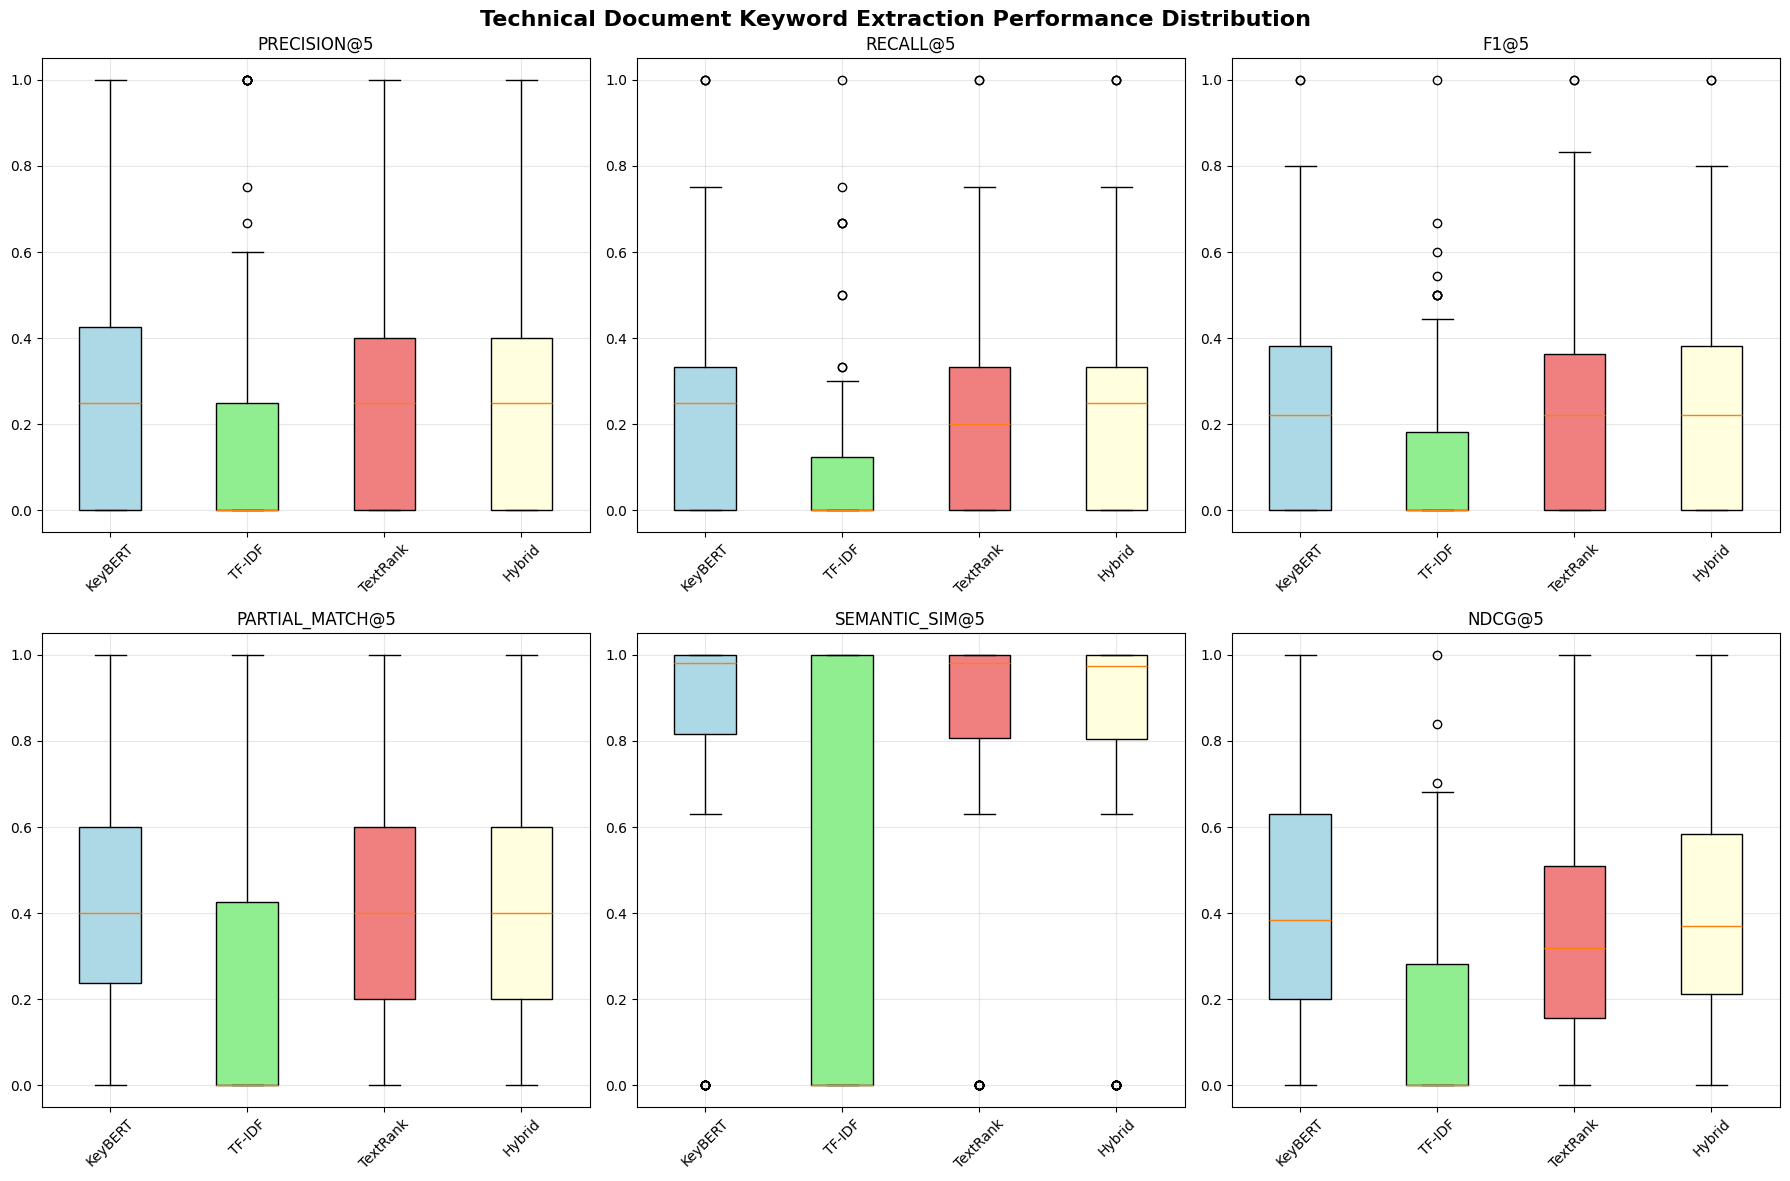

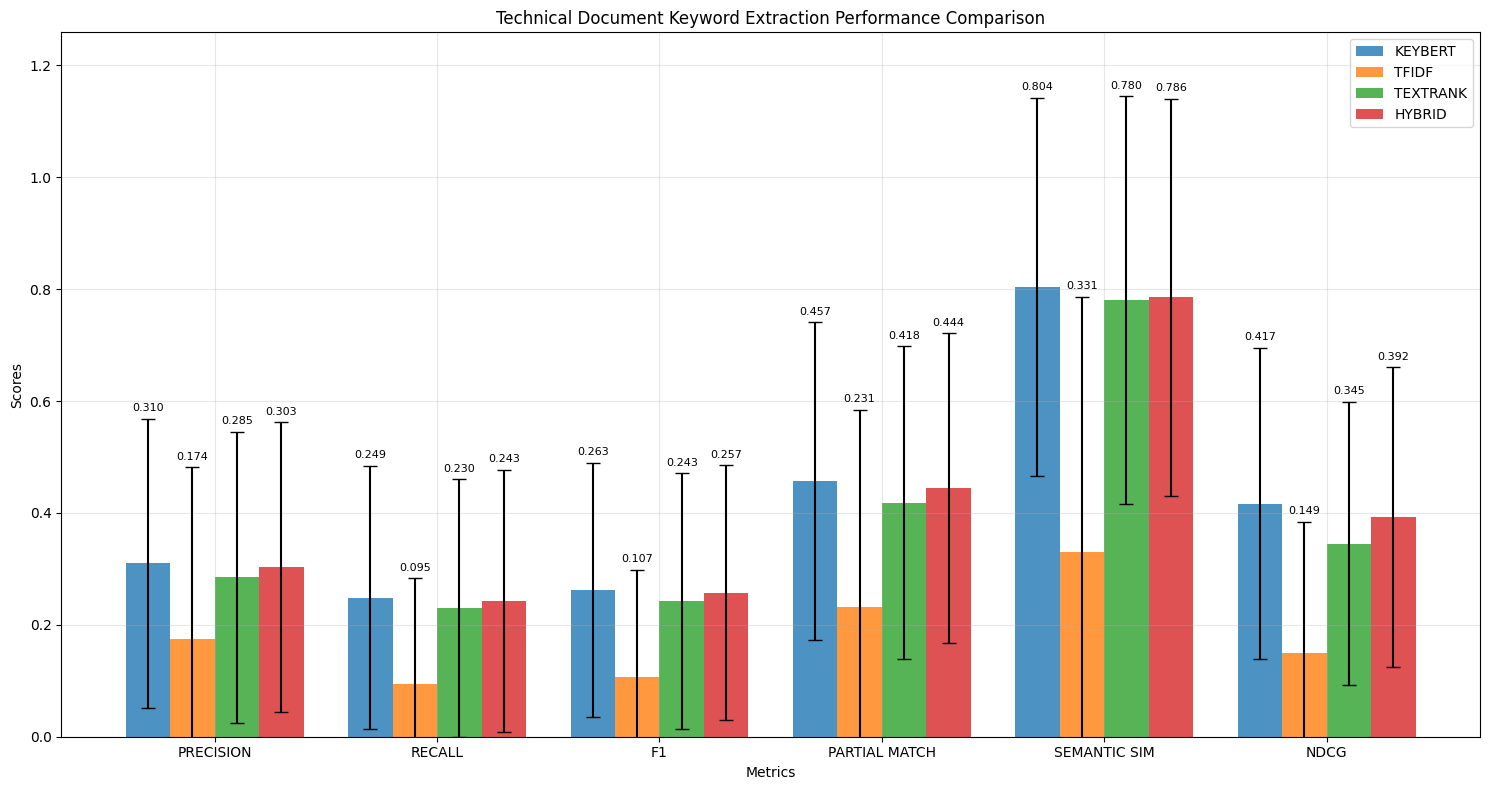

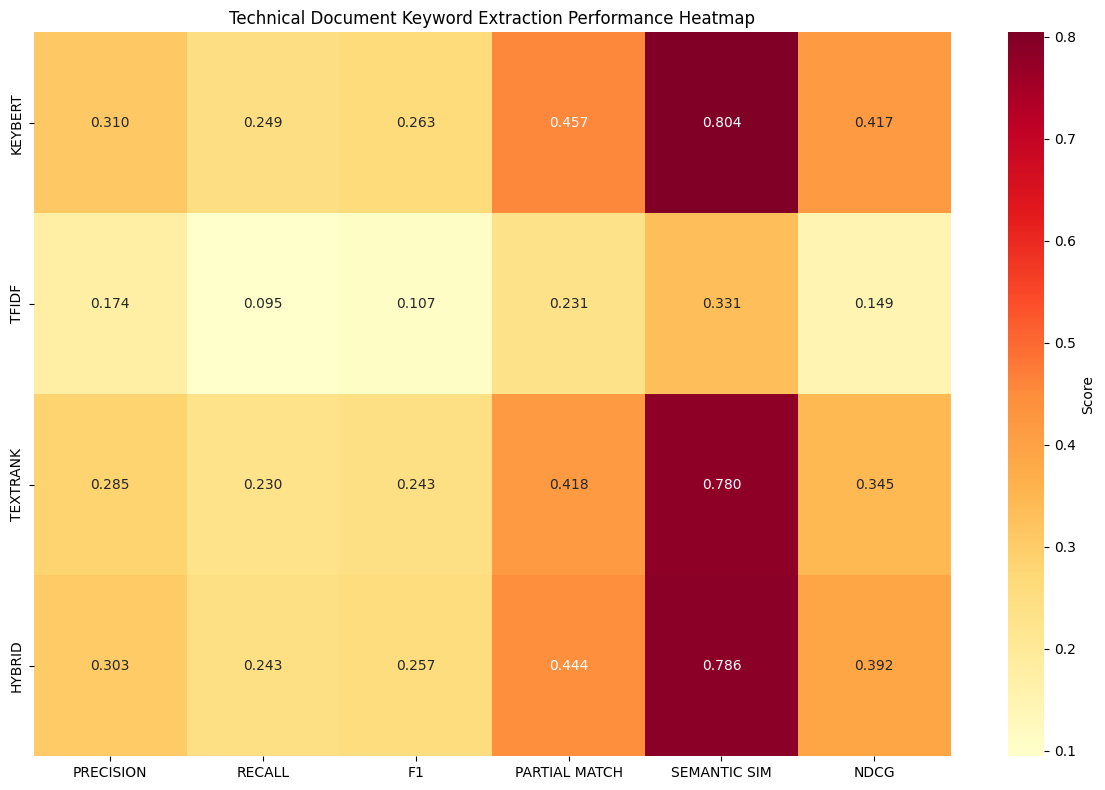

‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!

üíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...
‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!
  - tech_keyword_extraction_results.csv: ÏÉÅÏÑ∏ Í≤∞Í≥º
  - tech_keyword_extraction_summary.json: ÌÜµÍ≥Ñ ÏöîÏïΩ

üìã Ï¢ÖÌï© Î≥¥Í≥†ÏÑú ÏÉùÏÑ± Ï§ë...
Í∏∞Ïà† Î¨∏ÏÑú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î™®Îç∏ ÎπÑÍµê ÌèâÍ∞Ä Î≥¥Í≥†ÏÑú
Îç∞Ïù¥ÌÑ∞ÏÖã: ecosystems/keywords
ÌèâÍ∞Ä ÏùºÏãú: 2025-05-25 18:22:58
ÌèâÍ∞Ä ÏÉòÌîå Ïàò: 100
Ïñ∏Ïñ¥: ÏòÅÏñ¥
ÎèÑÎ©îÏù∏: Í∏∞Ïà† Î¨∏ÏÑú
ÏÉùÌÉúÍ≥Ñ Î∂ÑÌè¨: {'npm': 56, 'nuget': 10, 'maven': 9, 'packagist': 8, 'pypi': 8}

üìä ÏÑ±Îä• ÏöîÏïΩ (ÌèâÍ∑† ¬± ÌëúÏ§ÄÌé∏Ï∞®)
------------------------------------------------------------

PRECISION@5:
     KEYBERT: 0.3098 ¬± 0.2586
       TFIDF: 0.1740 ¬± 0.3073
    TEXTRANK: 0.2850 ¬± 0.2603
      HYBRID: 0.3030 ¬± 0.2592

RECALL@5:
     KEYBERT: 0.2488 ¬± 0.2353
       TFIDF: 0.0946 ¬± 0.1888
    TEXTRANK: 0.2295 ¬± 0.2306
      HYBRID: 0.2429 ¬± 0.2344

F1@5:
     KEYBERT: 0.2628 ¬± 0.2267
       TFIDF: 0.1070 ¬± 0.1914
    TEXTRANK: 0.2428 ¬± 0.2283
      HYBRID: 0.2573 ¬

In [31]:
evaluator = TechKeywordExtractorComparison(num_samples=100, random_seed=42)
evaluator.run_tech_evaluation()

In [20]:
dataset = load_dataset("ecosystems/keywords")
dataset

README.md:   0%|          | 0.00/169 [00:00<?, ?B/s]

keywords.csv:   0%|          | 0.00/781M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2891575 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'ecosystem', 'name', 'description', 'keywords'],
        num_rows: 2891575
    })
})